In [1]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import scipy as sp
import hdbscan
import warnings
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from numpy.random import uniform
from random import sample
from sklearn.decomposition import PCA
from math import isnan
from hdbscan import HDBSCAN
from joblib import Memory
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ---Libraries Setting ---
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 400
sns.set(rc = {'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'



# Read Data

In [ ]:
file_path = r"C:/Users/LENOVO/Documents/Kuliah IPB/02 Kuliah/03 Semester 3/Visualisasi Data/Publikasi/PDRB_Jatim.csv"
jatimraw = pd.read_csv(file_path, index_col='kab_kota')
jatimraw.head()

A         B        C      D      E        F         G  \
kab_kota                                                                   
Bangkalan    3617.17   2831.38   479.19  10.05  17.53  2443.72   3274.57   
Banyuwangi  15437.27   4671.55  7785.77  32.95  41.92  8115.86  10399.88   
Blitar       7564.10   1112.50  4211.00  21.50  10.80  2645.70   5401.50   
Bojonegoro   6321.94  31080.00  3846.50  17.68  22.66  4613.27   5656.87   
Bondowoso    3834.43    278.22  3746.55   7.93  11.93  1252.99   2479.69   

                  H        I        J        K        L      MN        O  \
kab_kota                                                                   
Bangkalan    333.69   248.65  1385.61   341.94   248.04   43.15   896.83   
Banyuwangi  1908.60  1765.12  4111.31  1073.29  1007.39  143.33  1140.32   
Blitar       462.50   307.40  2379.50   631.40   585.70   97.10   851.80   
Bojonegoro   773.40   634.09  5201.65   858.62   845.45   88.56  1921.84   
Bondowoso    142.24   103.86  1152.35   422.72   188.44   53.24   427.86   

                  P       Q    RSTU  
kab_kota                             
Bangkalan    761.54   91.07  140.06  
Banyuwangi  2071.51  290.30  851.98  
Blitar      1222.60  287.30  447.70  
Bojonegoro   671.41  277.11  479.64  
Bondowoso    572.03  128.80  272.34

In [4]:
# Standarisasi Data
scaler = StandardScaler()
jatimraw_std = scaler.fit_transform(jatimraw)
jatimraw_std = pd.DataFrame(jatimraw_std, columns=jatimraw.columns)
jatimraw_std

A         B         C         D         E         F         G  \
0  -0.307398  0.174830 -0.569687 -0.344099 -0.287420 -0.280173 -0.297315   
1   2.930123  0.532543 -0.272346 -0.293304 -0.065023  0.487140  0.053452   
2   0.773665 -0.159305 -0.417821 -0.318701 -0.348787 -0.252849 -0.192610   
3   0.433437  5.666119 -0.432654 -0.327175 -0.240643  0.013319 -0.180039   
4  -0.247891 -0.321482 -0.436722 -0.348801 -0.338483 -0.441251 -0.336446   
5   0.400096  1.431028  1.719456  0.990864  0.251292  0.806552  0.231067   
6   2.720719  0.138792 -0.067047 -0.292061 -0.070768 -0.030096 -0.037925   
7  -0.026925 -0.342541 -0.304061 -0.310184 -0.204170 -0.200067 -0.079142   
8   0.432303 -0.293494 -0.308578 -0.306812 -0.264898 -0.194600 -0.126498   
9   1.057359 -0.284052 -0.445848 -0.310117 -0.113442 -0.138843 -0.150124   
10  0.732582 -0.177852 -0.356457 -0.335870 -0.301189 -0.365522 -0.273546   
11 -0.323293 -0.350769 -0.501882 -0.330835 -0.183380 -0.372528 -0.333287   
12 -0.322594 -0.338923 -0.516319 -0.340040 -0.112621 -0.443731 -0.337973   
13  1.529450 -0.138017  0.365816 -0.200807  0.269438  0.675841  0.274372   
14 -0.160818 -0.270009  0.964986 -0.263425 -0.023900  0.091464 -0.118037   
15  0.160716 -0.303538 -0.458587 -0.341726 -0.214291 -0.330835 -0.250262   
16 -0.162891 -0.339073 -0.531416 -0.332165 -0.259244 -0.418248 -0.321403   
17 -0.523721 -0.246235 -0.552970 -0.354591 -0.335930 -0.357392 -0.345425   
18 -0.351017 -0.286136 -0.552150 -0.349267 -0.336659 -0.426029 -0.320139   
19  0.315359 -0.274156  2.345170  2.020590 -0.060282  1.159625  0.132894   
20 -0.328308 -0.310820 -0.532893 -0.331189 -0.288879 -0.410824 -0.311254   
21  0.827494 -0.268349 -0.308798  0.220727 -0.179185 -0.340536 -0.290427   
22 -0.172837  0.061638 -0.564696 -0.353548 -0.330185 -0.385059 -0.320827   
23 -0.557562 -0.367222  2.823855  3.078885  0.666542  1.086091  0.815809   
24 -0.208824 -0.325502 -0.467269 -0.343478 -0.267269 -0.468368 -0.334442   
25  1.032985  0.631807 -0.519323 -0.345430 -0.323529 -0.340059 -0.287440   
26  0.319901 -0.118357 -0.417911 -0.347959 -0.332009 -0.393918 -0.277808   
27  0.780909  0.438194 -0.322702 -0.248364 -0.153107  0.092279 -0.110694   
28 -0.011554 -0.193069 -0.306851 -0.336779 -0.182377 -0.245069 -0.130320   
29 -0.832634 -0.372069 -0.561884 -0.351153 -0.216388 -0.402155 -0.333727   
30 -1.266283 -0.375525 -0.569171 -0.357652 -0.361461 -0.560454 -0.393142   
31 -1.243938 -0.375560  2.289833 -0.344276 -0.241008 -0.369584  0.051614   
32 -1.276951 -0.375231 -0.520388 -0.343589 -0.203349 -0.516943 -0.320425   
33 -1.265094 -0.368871 -0.021670 -0.311825  0.671375  0.456427  0.455811   
34 -1.291588 -0.375566 -0.569908 -0.355145 -0.379516 -0.536434 -0.378673   
35 -1.261843 -0.375566 -0.537749 -0.354458 -0.294350 -0.558360 -0.364494   
36 -1.162812 -0.375566 -0.530589 -0.342258 -0.247573 -0.534831 -0.343983   
37 -1.140324 -0.372098  2.967232  4.456016  5.902667  5.446018  5.882811   

           H         I         J         K         L        MN         O  \
0  -0.291199 -0.228819 -0.360802 -0.265352 -0.330330 -0.202694 -0.050869   
1   0.073928 -0.086158  0.143601 -0.035761  0.079282 -0.141252  0.265240   
2  -0.261335 -0.223293 -0.176878 -0.174483 -0.148188 -0.169606 -0.109329   
3  -0.189256 -0.192559  0.345373 -0.103152 -0.008072 -0.174843  1.279840   
4  -0.335584 -0.242440 -0.403968 -0.239993 -0.362479 -0.196506 -0.659704   
5   0.307372 -0.119766  0.506976 -0.011902  0.390886 -0.022911  0.286790   
6  -0.096254 -0.117230  0.422870  0.033030  0.016725 -0.099969  1.221107   
7  -0.264475 -0.185065 -0.109600 -0.148169 -0.069141 -0.172139 -0.041651   
8  -0.187821 -0.206789 -0.143715 -0.196724 -0.091893 -0.171127  0.106322   
9  -0.295567 -0.202416 -0.036309 -0.186955 -0.056081 -0.176579  0.179660   
10 -0.227313 -0.219857 -0.388507 -0.247697 -0.212611 -0.178806 -0.323694   
11 -0.296888 -0.215366 -0.357473 -0.238891 -0.304184 -0.200333 -0.300559   
12 -0.300852 -0.186471 -0.356505 -0.260753 -0.344738 -0.19

# Eksplorasi Data

In [ ]:
# Analisis Deskriptif
nilai_mean = np.mean(jatimraw, axis=0)
nilai_max = np.max(jatimraw, axis=0)
nilai_min = np.min(jatimraw, axis=0)
nilai_std_dev = np.std(jatimraw, axis=0)
max_wilayah = jatimraw.idxmax()
min_wilayah = jatimraw.idxmin()

df_analisis_deskriptif = pd.DataFrame({
    'Mean': nilai_mean,
    'Max': nilai_max,
    'Min': nilai_min,
    'Std Dev': nilai_std_dev,
    'Max_Wil' : max_wilayah,
    'Min_Wil' : min_wilayah
})
df_analisis_deskriptif

Mean        Max      Min       Std Dev        Max_Wil  \
A      4739.472105   15437.27    23.92   3650.971863     Banyuwangi   
B      1932.007895   31080.00     0.00   5144.260555     Bojonegoro   
C     14478.155526   87392.24   473.74  24573.095586  Kota Surabaya   
D       165.179737    2174.08     3.94    450.828816  Kota Surabaya   
E        49.051053     696.39     7.43    109.668883  Kota Surabaya   
F      4514.815526   44772.95   371.82   7392.214263  Kota Surabaya   
G      9314.087632  128814.59  1327.99  20313.503711  Kota Surabaya   
H      1589.723684   25217.17   142.24   4313.321967  Kota Surabaya   
I      2680.975526   66946.11    71.42  10629.893464  Kota Surabaya   
J      3335.317632   34446.03   646.91   5403.812377  Kota Surabaya   
K      1187.203684   20445.33   205.60   3185.440115  Kota Surabaya   
L       860.414737   11916.34   148.13   1853.829077  Kota Surabaya   
MN      373.635789   10276.17    34.44   1630.462660  Kota Surabaya   
O       936.012895    4759.41   213.54    770.273933  Kota Surabaya   
P      1293.280526   10447.85   231.39   1709.373782  Kota Surabaya   
Q       354.101053    3932.73    31.79    652.216902  Kota Surabaya   
RSTU    696.668684    6197.31   137.70    999.858873  Kota Surabaya   

               Min_Wil  
A       Kota Mojokerto  
B       Kota Mojokerto  
C       Kota Mojokerto  
D          Kota Blitar  
E       Kota Mojokerto  
F          Kota Blitar  
G          Kota Blitar  
H            Bondowoso  
I              Sampang  
J     Kota Probolinggo  
K              Sampang  
L       Kota Mojokerto  
MN             Pacitan  
O       Kota Mojokerto  
P       Kota Mojokerto  
Q                Tuban  
RSTU         Pamekasan

In [ ]:
# Boxplot Data Asli
titles = [
    "Pertanian, Kehutanan, dan Perikanan", "Pertambangan dan Penggalian", "Industri Pengolahan",
    "Pengadaan Listrik dan Gas", "Pengadaan Air; Pengelolaan Sampah, Limbah, dan Daur Ulang",
    "Konstruksi", "Perdagangan Besar dan Eceran; Reparasi Mobil dan Sepeda Motor", 
    "Transportasi dan Pergudangan", "Penyediaan Akomodasi dan Makan Minum", "Informasi dan Komunikasi",
    "Jasa Keuangan dan Asuransi", "Real Estate", "Jasa Perusahaan",
    "Administrasi Pemerintahan, Pertahanan, dan Jaminan Sosial Wajib", "Jasa Pendidikan",
    "Jasa Kesehatan dan Kegiatan Sosial", "Jasa Lainnya"
]

n_cols = 4
n_rows = (len(jatimraw.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 21))
colors = sns.color_palette("Paired", len(jatimraw.columns))
for idx, (column, title) in enumerate(zip(jatimraw.columns, titles)):
    row = idx // n_cols
    col = idx % n_cols
    sns.boxplot(data=jatimraw[[column]], ax=axes[row, col], color=colors[idx], flierprops=dict(marker='o', markersize=5))
    axes[row, col].set_title(title, fontsize=10)
    axes[row, col].set_xlabel('')
    axes[row, col].tick_params(axis='x', labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
for i in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

#plt.suptitle("Boxplot dari 17 Variabel Ekonomi", fontsize=18)
#plt.subplots_adjust(top=5)

plt.tight_layout()
plt.savefig('boxplot_ekonomi.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Boxplot Data Standarisasi
titles = [
    "Pertanian, Kehutanan, dan Perikanan", "Pertambangan dan Penggalian", "Industri Pengolahan",
    "Pengadaan Listrik dan Gas", "Pengadaan Air; Pengelolaan Sampah, Limbah, dan Daur Ulang",
    "Konstruksi", "Perdagangan Besar dan Eceran; Reparasi Mobil dan Sepeda Motor", 
    "Transportasi dan Pergudangan", "Penyediaan Akomodasi dan Makan Minum", "Informasi dan Komunikasi",
    "Jasa Keuangan dan Asuransi", "Real Estate", "Jasa Perusahaan",
    "Administrasi Pemerintahan, Pertahanan, dan Jaminan Sosial Wajib", "Jasa Pendidikan",
    "Jasa Kesehatan dan Kegiatan Sosial", "Jasa Lainnya"
]

n_cols = 4
n_rows = (len(jatimraw_std.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 21))
colors = sns.color_palette("Paired", len(jatimraw_std.columns))
for idx, (column, title) in enumerate(zip(jatimraw_std.columns, titles)):
    row = idx // n_cols
    col = idx % n_cols
    sns.boxplot(data=jatimraw_std[[column]], ax=axes[row, col], color=colors[idx], flierprops=dict(marker='o', markersize=5))
    axes[row, col].set_title(title, fontsize=10)
    axes[row, col].set_xlabel('')
    axes[row, col].tick_params(axis='x', labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
for i in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.suptitle("Boxplot dari 17 Variabel Ekonomi", fontsize=18)
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.savefig('boxplot_ekonomi2.png', dpi=300, bbox_inches='tight')
plt.show()

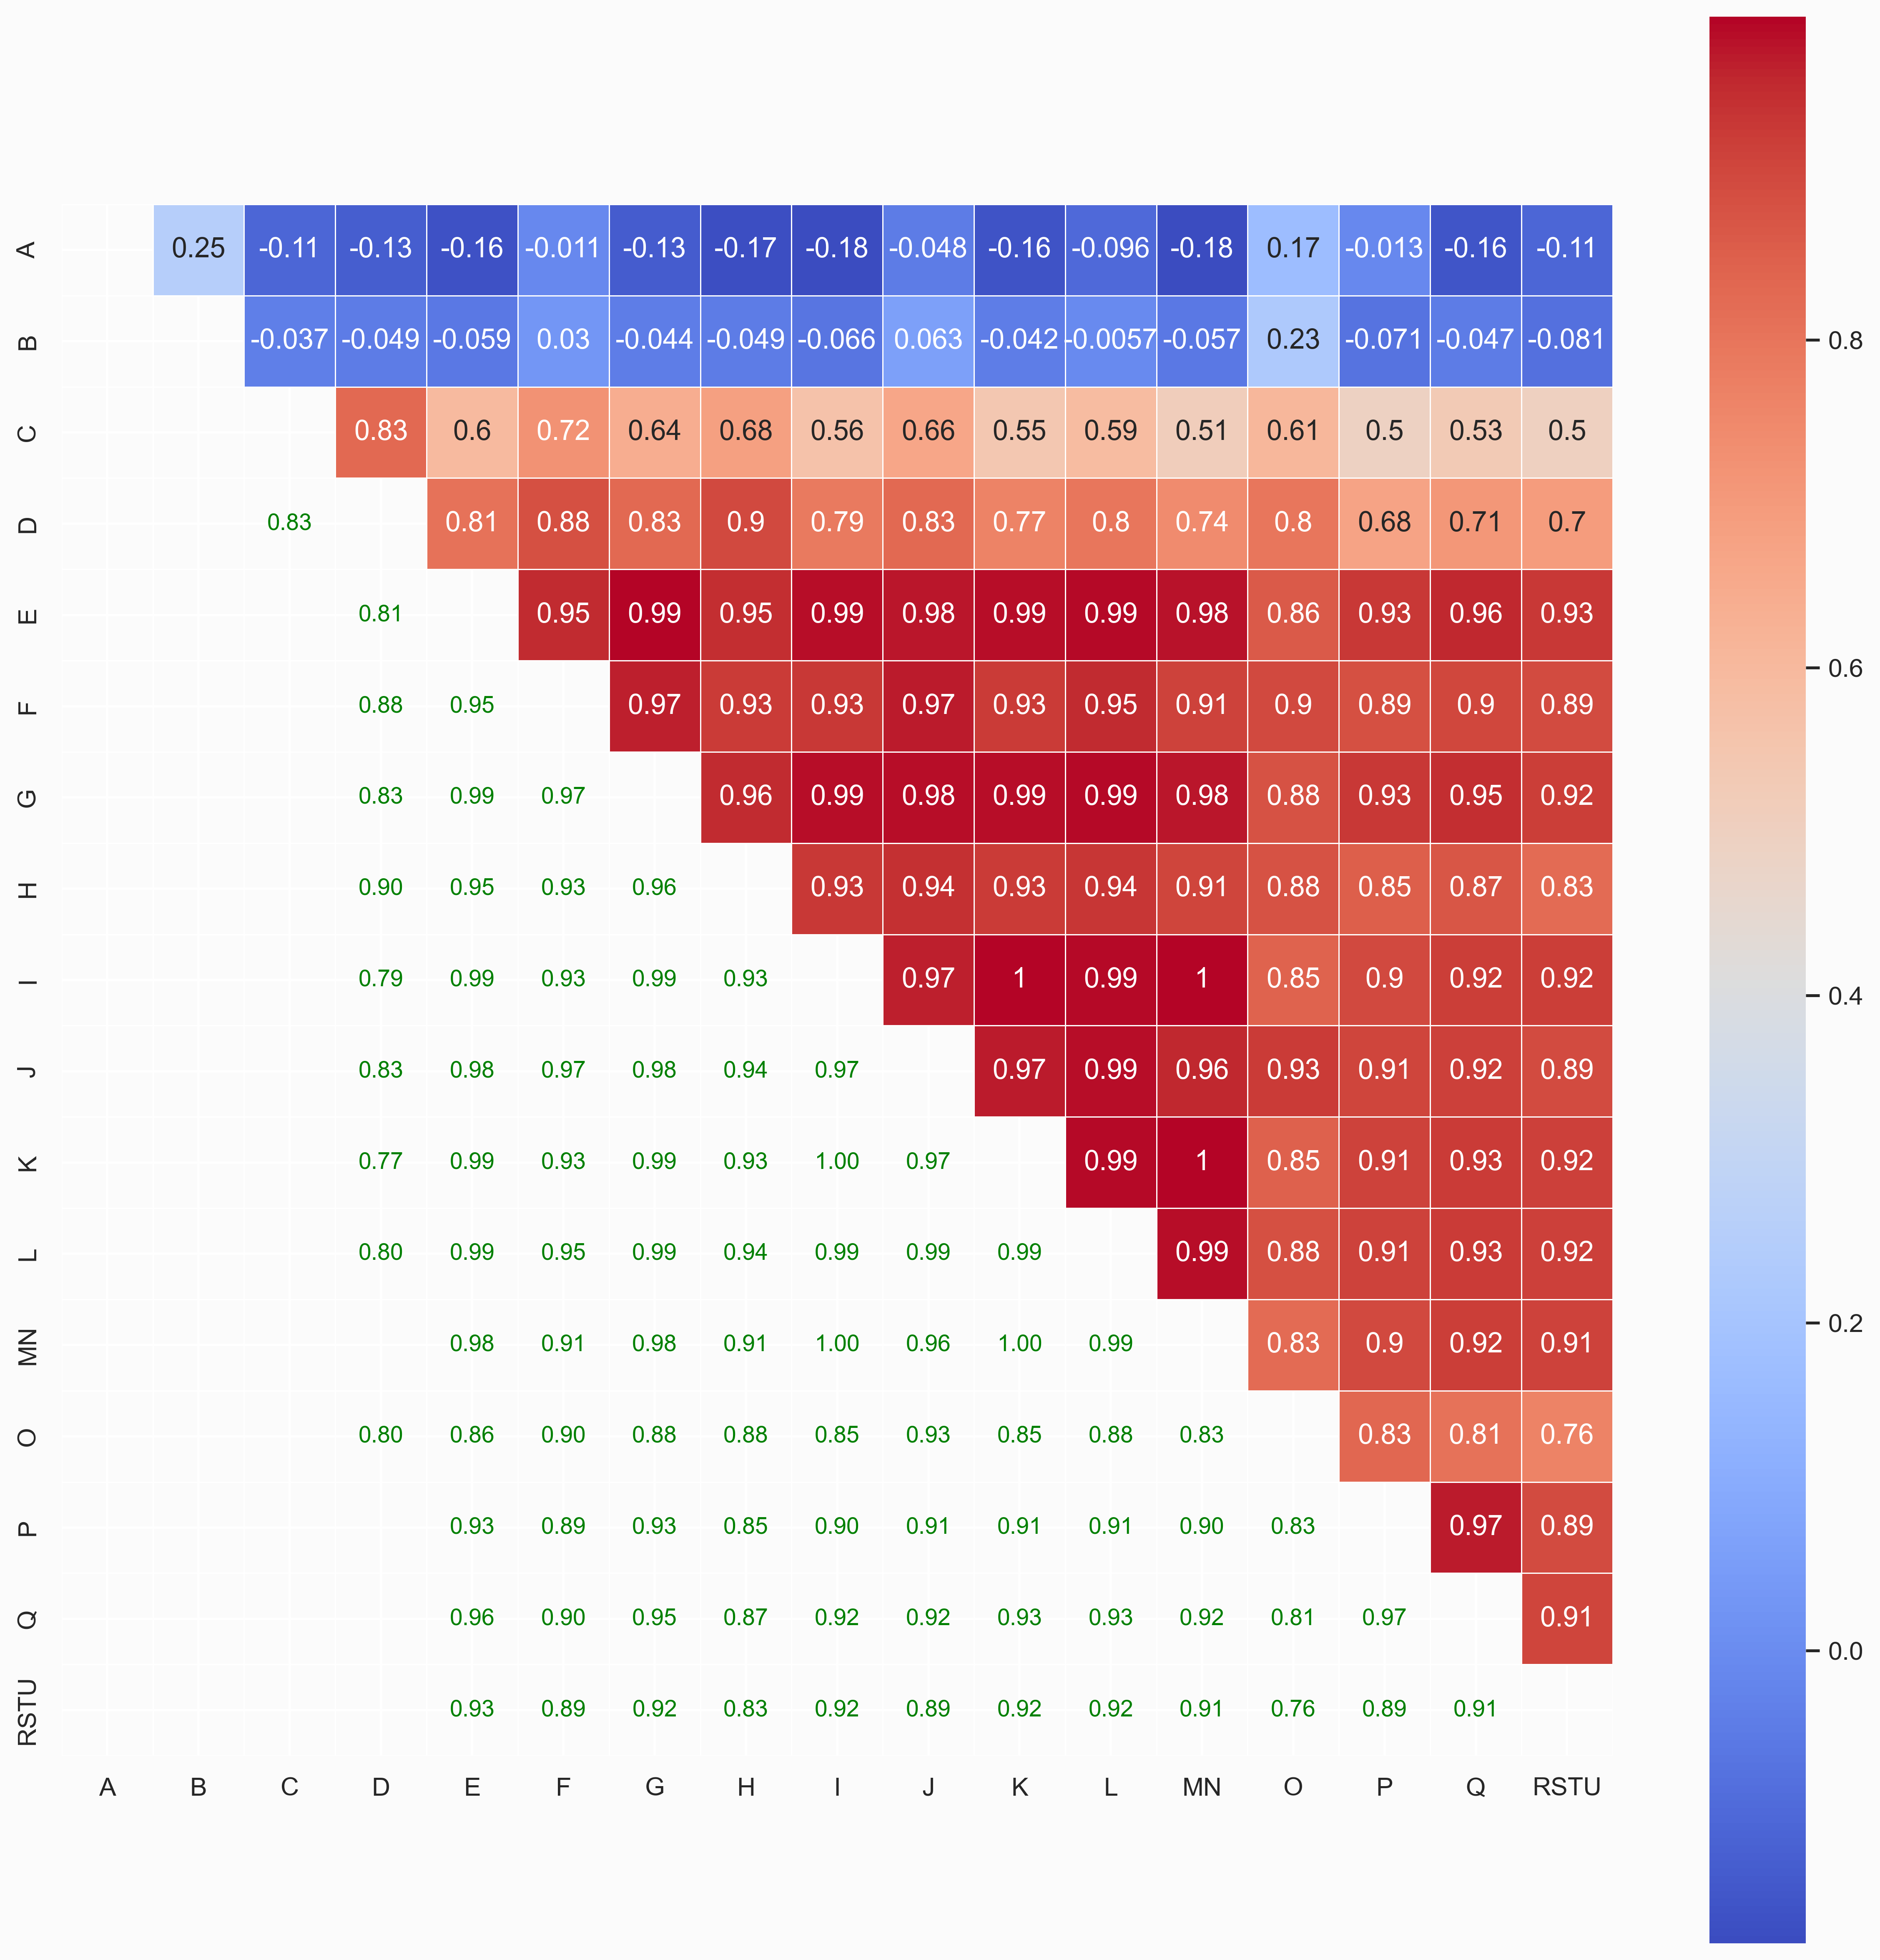

In [ ]:
correlation_matrix = jatimraw.corr(method='pearson')
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, mask=mask, annot=True, square=True, cmap='coolwarm', cbar=True, linewidths=.5)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}', color='green', 
                     ha='center', va='center', fontsize=10)
plt.show()

In [ ]:
# Multikolinearitas
data_with_const = add_constant(jatimraw)
vif_data = pd.DataFrame()
vif_data["Variable"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]
print(vif_data)

   Variable          VIF
0     const    21.590480
1         A     5.095152
2         B     4.036176
3         C    14.848116
4         D    33.299737
5         E   335.708812
6         F   159.052481
7         G   653.923739
8         H    86.956636
9         I  2106.696930
10        J   395.791003
11        K  1663.305508
12        L   501.369327
13       MN  2023.301471
14        O    44.253813
15        P    71.398336
16        Q    99.902615
17     RSTU    23.601514


In [8]:
# Fungsi Hopkins Test
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = sample(range(0, n), m)

    ujd = []
    wjd = []
    for j in range(m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

# --- Hopkins Test ---
hopkins_value = hopkins(jatimraw)
hopkins_result = f'Result: \033[1;32m{hopkins_value:.4f}\033[0m'
print('\033[1m.: Hopkins Test :.\033[0m')
print('\033[1;34m' + '*' * 19 + '\033[0m')
print(hopkins_result)

if 0.7 < hopkins_value < 0.99:
    print(f'>> From the result above, \033[1;34m it has a high tendency to cluster (contains meaningful clusters)\033[0m')
    print('\n\033[1;34m' + '*' * 31 + '\033[0m')
    print('\033[1m.:. Conclusions: Accept H0 .:.\033[0m')
    print('\033[1;34m' + '*' * 31 + '\033[0m')
else:
    print(f'>> From the result above, \033[1;34m it has no meaningful clusters\033[0m')
    print('\n\033[1;34m' + '*' * 31 + '\033[0m')
    print('\033[1m.:. Conclusions: Reject H0 .:.\033[0m')
    print('\033[1;34m' + '*' * 31 + '\033[0m')


.: Hopkins Test :.
*******************
Result: 0.8982
>> From the result above,  it has a high tendency to cluster (contains meaningful clusters)

*******************************
.:. Conclusions: Accept H0 .:.
*******************************


# PCA

In [ ]:
# --- Transform into Array ---
X = np.asarray(jatimraw)
pca = PCA(random_state=24)
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_ * 100
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f'Komponen {i+1}: {var_ratio:.2f}%')
total_explained_variance = np.sum(explained_variance_ratio)
print(f'\nTotal Persentase Variansi yang Dijelaskan oleh Semua Komponen: {total_explained_variance:.2f}%')

Komponen 1: 78.82%
Komponen 2: 17.54%
Komponen 3: 2.24%
Komponen 4: 0.96%
Komponen 5: 0.15%
Komponen 6: 0.13%
Komponen 7: 0.09%
Komponen 8: 0.03%
Komponen 9: 0.01%
Komponen 10: 0.01%
Komponen 11: 0.00%
Komponen 12: 0.00%
Komponen 13: 0.00%
Komponen 14: 0.00%
Komponen 15: 0.00%
Komponen 16: 0.00%
Komponen 17: 0.00%

Total Persentase Variansi yang Dijelaskan oleh Semua Komponen: 100.00%


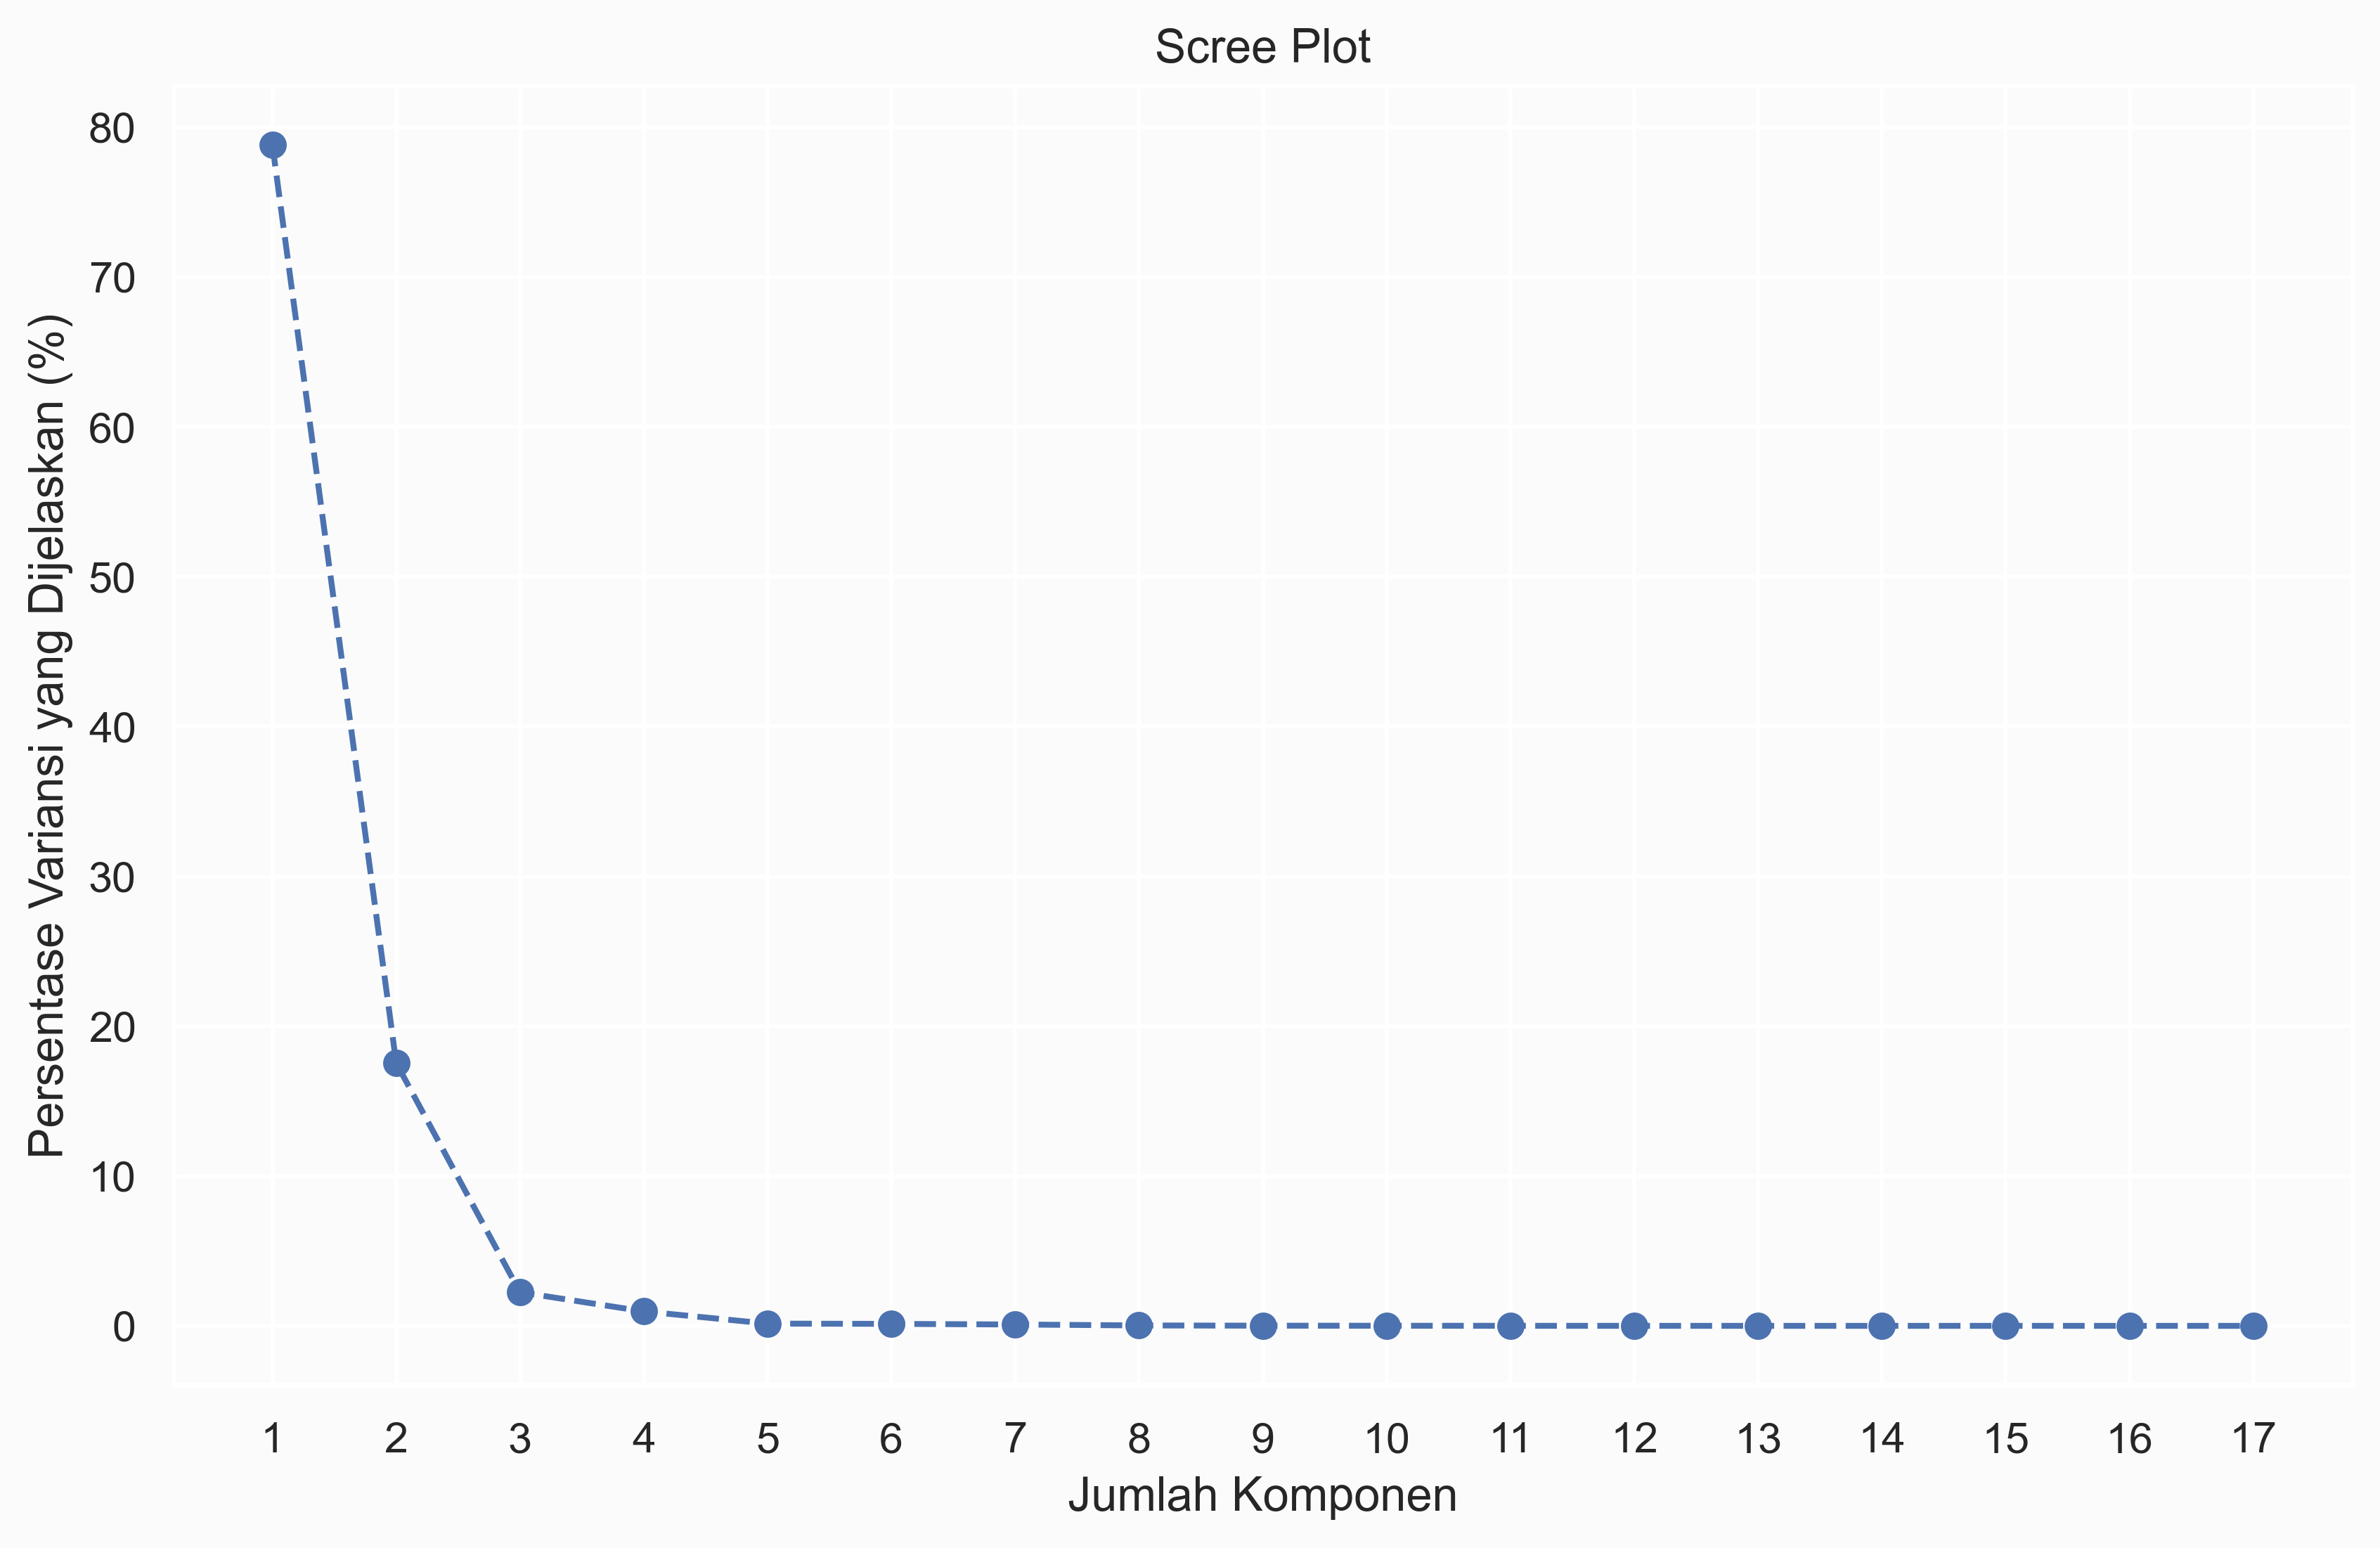

In [10]:
# --- Plot Scree Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Persentase Variansi yang Dijelaskan (%)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [ ]:
# --- Applying PCA with n Components ---
pca = PCA(n_components=4, random_state=24)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
print("Explained Variance by Each Component:")
print(explained_variance)
print("\nExplained Variance Ratio (%) by Each Component:")
print(explained_variance_ratio)
total_explained_variance = np.sum(explained_variance_ratio)
print(f'\nTotal Persentase Variansi yang Dijelaskan oleh 4 Komponen: {total_explained_variance:.2f}%')

Explained Variance by Each Component:
[1.04682839e+09 2.32988297e+08 2.97872678e+07 1.28122874e+07]

Explained Variance Ratio (%) by Each Component:
[78.82384106 17.5434987   2.24291478  0.96473664]

Total Persentase Variansi yang Dijelaskan oleh 4 Komponen: 99.57%


In [ ]:
# --- Factor Loading n Component ---
X_original = jatimraw.copy()
pca = PCA(n_components=4, random_state=24)
X_pca = pca.fit_transform(X_original)
loading_matrix = pd.DataFrame(pca.components_.T, 
                              columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
                              index=X_original.columns)
print("Faktor Loading untuk tiap variabel pada komponen utama:")
print(loading_matrix)

Faktor Loading untuk tiap variabel pada komponen utama:
           PC1       PC2       PC3       PC4
A    -0.015174  0.007336  0.323927  0.890020
B    -0.006738  0.001476  0.923855 -0.364178
C     0.691162  0.717864 -0.007998 -0.014603
D     0.012991  0.000446 -0.000644  0.000198
E     0.003047 -0.003290 -0.000508 -0.000606
F     0.217448 -0.131855  0.138546  0.215439
G     0.580950 -0.548544 -0.012433  0.014814
H     0.122867 -0.088005 -0.015840 -0.051242
I     0.288124 -0.344498 -0.078134 -0.125879
J     0.155285 -0.130669  0.115777  0.049392
K     0.085391 -0.107216 -0.007793 -0.031319
L     0.051252 -0.056452  0.013242  0.008100
MN    0.042553 -0.058136 -0.010299 -0.023340
O     0.020001 -0.015595  0.044726  0.034156
P     0.042441 -0.055515 -0.000547  0.067463
Q     0.016794 -0.020239 -0.001703 -0.001821
RSTU  0.024830 -0.032000 -0.006588  0.012975


# HDBSCAN

## Robust Mahalanobis

### Distance / Jarak

In [13]:
import numpy as np
import scipy as sp
from sklearn.covariance import MinCovDet
from scipy.stats import chi2

# --- Definisikan fungsi untuk menghitung Robust Mahalanobis Distance ---
def robust_mahalanobis_method(X_pca):
    # Minimum covariance determinant
    cov = MinCovDet(random_state=0).fit(X_pca)
    mcd = cov.covariance_  # robust covariance metric
    robust_mean = cov.location_  # robust mean
    inv_covmat = sp.linalg.inv(mcd)  # inverse covariance metric

    # Robust Mahalanobis Distance
    x_minus_mu = X_pca - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())

    # Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=X_pca.shape[1]))  # degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

# --- Aplikasikan pada data yang telah di-reduksi dengan PCA ---
outliers_mahal_rob, md_rb = robust_mahalanobis_method(X_pca)

# --- Menghitung jumlah outlier ---
jumlah_outlier = len(outliers_mahal_rob)
print("Jumlah Outlier:", jumlah_outlier)
print("Outliers (Robust Mahalanobis Distance):")
print(outliers_mahal_rob)
print("Mahalanobis Distances:")
print(md_rb)

Jumlah Outlier: 15
Outliers (Robust Mahalanobis Distance):
[0, 1, 3, 5, 6, 13, 14, 19, 22, 23, 25, 27, 31, 33, 37]
Mahalanobis Distances:
[  9.92898319  14.05458248   2.28814875 118.41572136   1.6314131
  48.37807371   6.69922825   3.10340234   2.12661659   3.23435348
   2.19968738   0.96766992   0.91049305  10.91300612  25.16768774
   1.03155902   1.41513106   1.86853037   1.32046784  48.00806124
   1.05559163   3.24637762   7.32342585  54.17374882   1.20999788
  17.04552169   2.78140046  14.0990822    2.98787601   1.5104922
   1.5457907   51.22770237   1.79661405  12.96465754   1.51401132
   1.58371971   1.44991653 121.6392779 ]


Hasil Grid Search:
 min_cluster_size  min_samples  silhouette_score  num_clusters
                3            2          0.026933             4
                3            5         -1.000000             0
                3           10         -1.000000             0
                5            2         -0.084334             2
                5            5         -1.000000             0
                5           10         -1.000000             0
               10            2         -1.000000             0
               10            5         -1.000000             0
               10           10         -1.000000             0

Parameter Terbaik:
min_cluster_size    3.000000
min_samples         2.000000
silhouette_score    0.026933
num_clusters        4.000000
Name: 0, dtype: float64


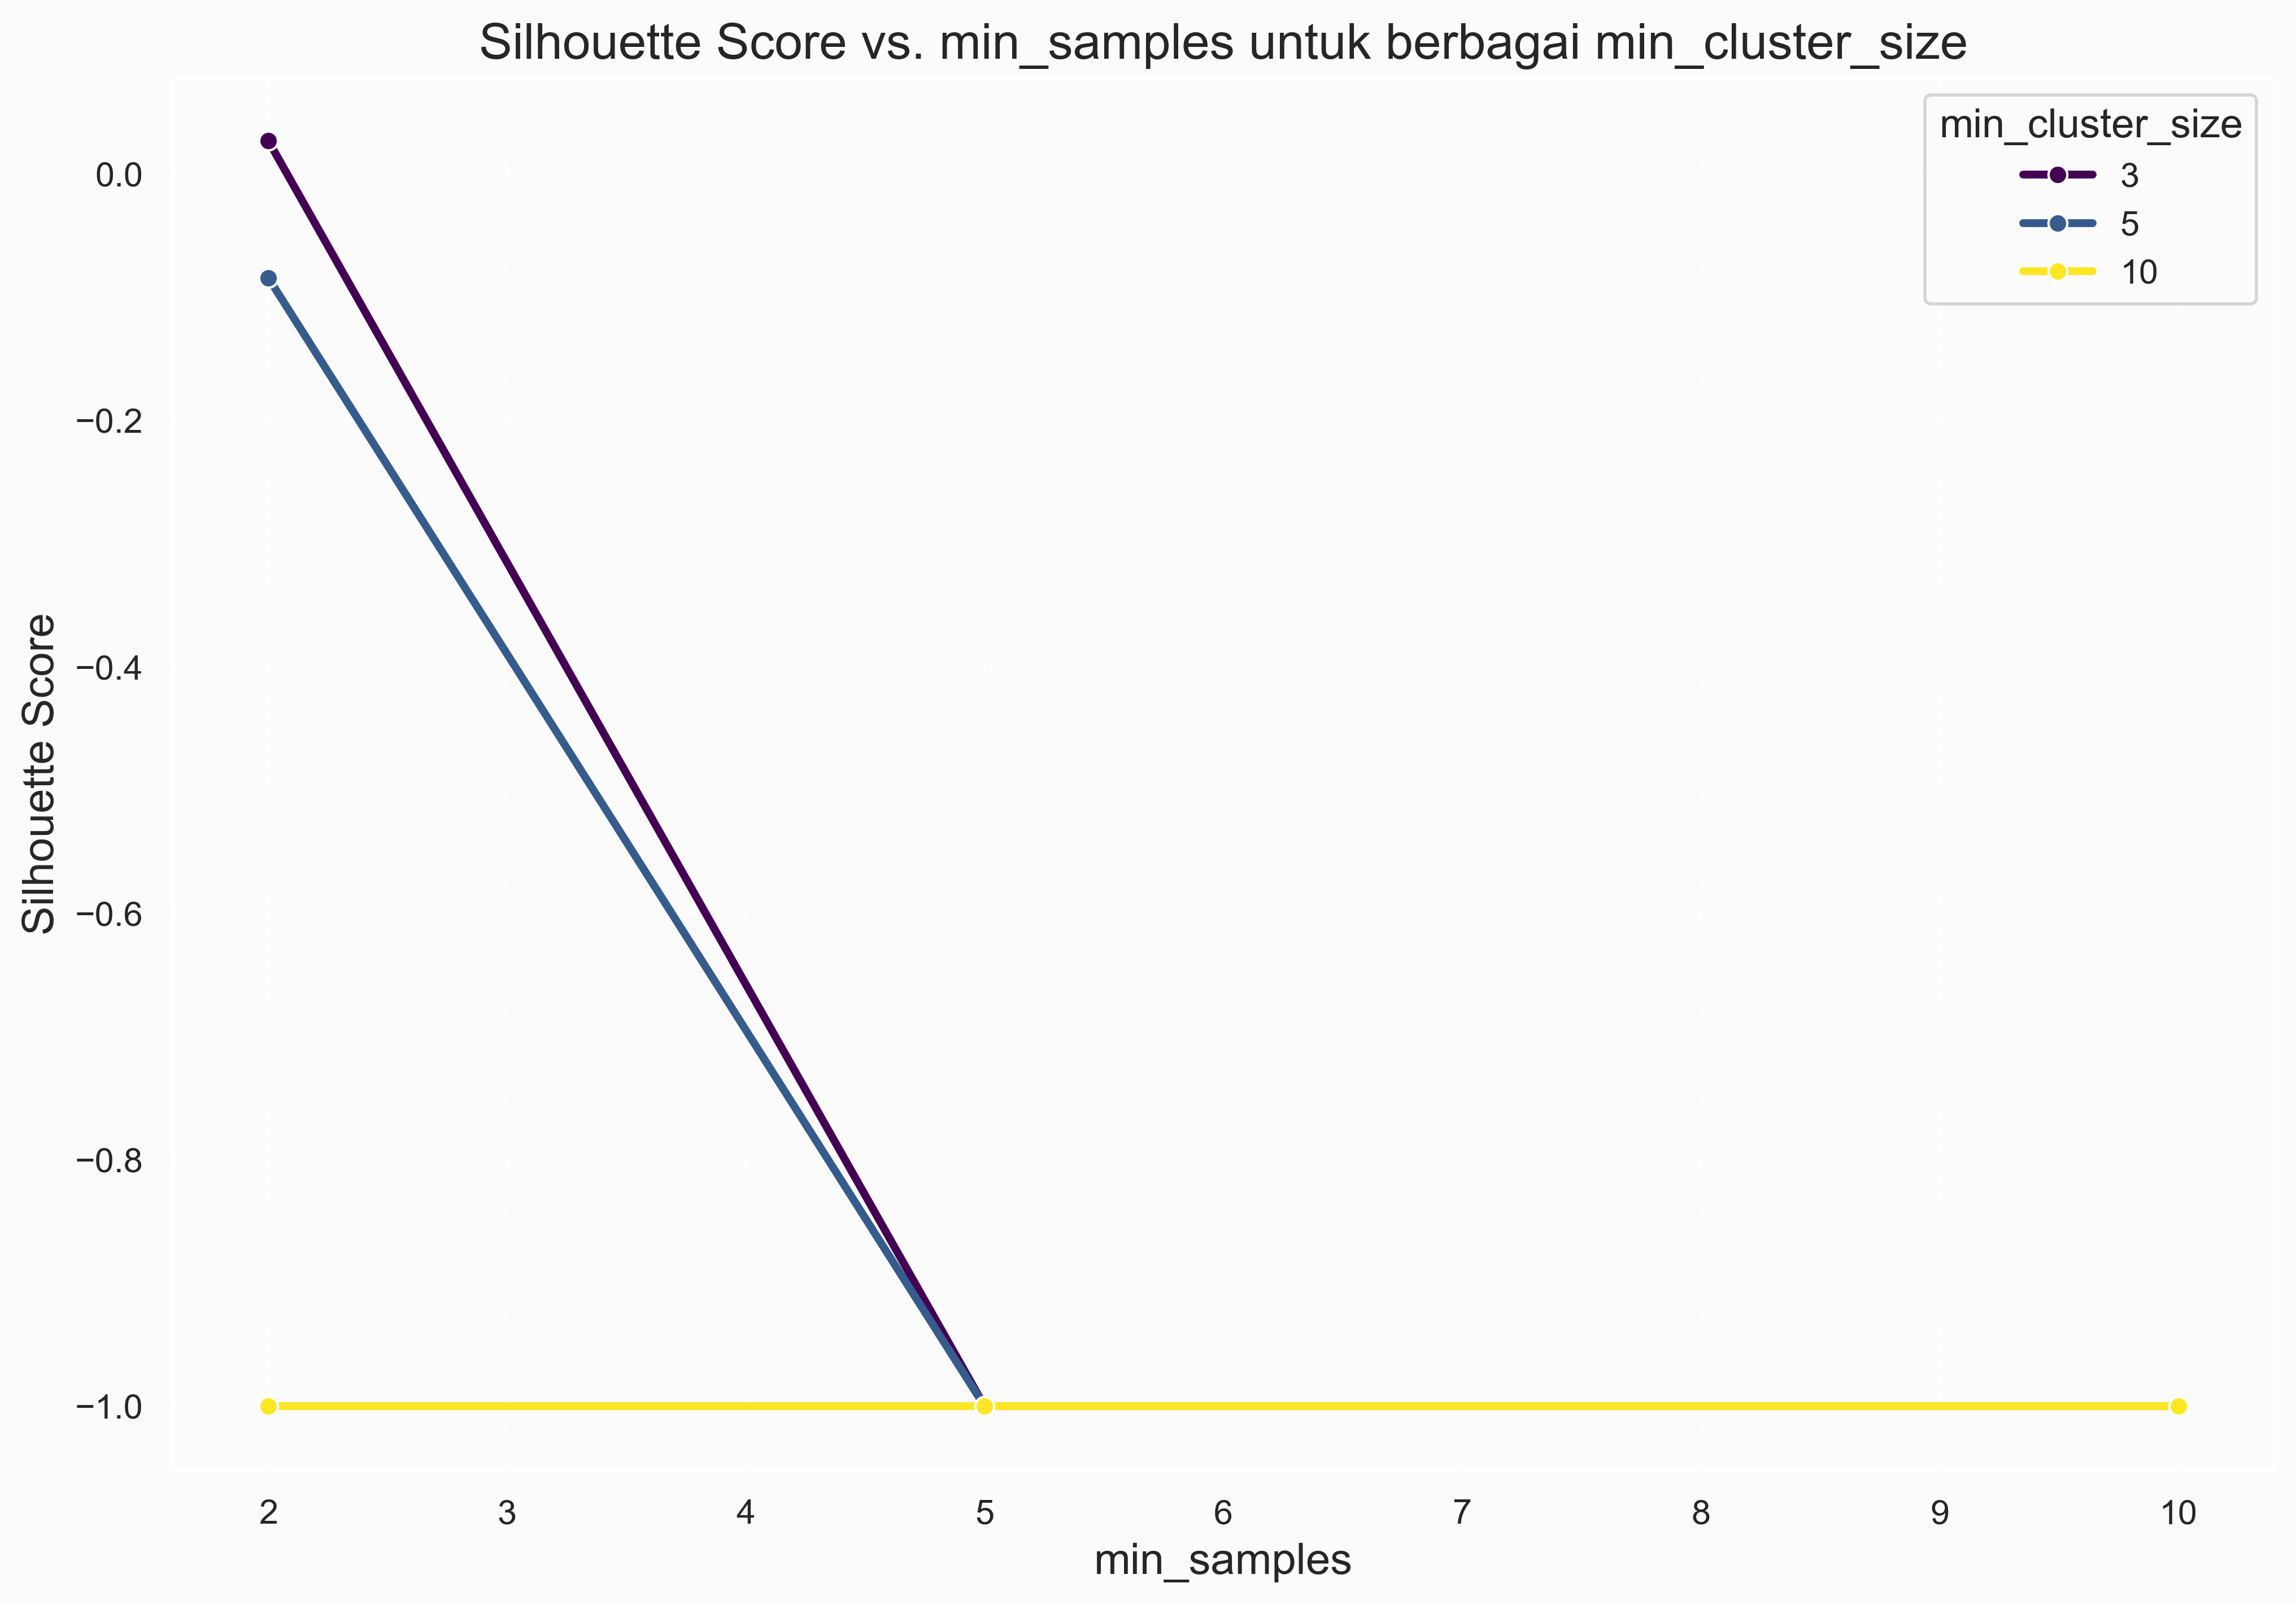

In [ ]:
import numpy as np
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar parameter untuk dicoba
min_cluster_sizes = [3, 5, 10]
min_samples_list = [2, 5, 10]

results = []

for min_cluster_size in min_cluster_sizes:
    for min_samples in min_samples_list:
        # Inisialisasi HDBSCAN dengan parameter yang dipilih
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        clusterer.fit(X_pca)

        # Hitung nilai silhouette jika ada lebih dari satu klaster
        if len(set(clusterer.labels_)) > 1:
            silhouette_avg = silhouette_score(X_pca, clusterer.labels_)
        else:
            silhouette_avg = -1  # Set nilai negatif jika tidak ada klaster yang valid

        results.append({
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples,
            'silhouette_score': silhouette_avg,
            'num_clusters': len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)  # Mengecualikan noise
        })

results_df = pd.DataFrame(results)
print("Hasil Grid Search:")
print(results_df.to_string(index=False))
best_params = results_df.loc[results_df['silhouette_score'].idxmax()]
print("\nParameter Terbaik:")
print(best_params)

# Plot hasil
plt.figure(figsize=(12, 8))
sns.lineplot(data=results_df, x='min_samples', y='silhouette_score', hue='min_cluster_size',
             palette='viridis', marker='o', linewidth=2.5)
plt.xlabel('min_samples', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Score vs. min_samples untuk berbagai min_cluster_size', fontsize=16)
plt.legend(title='min_cluster_size', title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# --- HDBSCAN Clustering ---
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=2, gen_min_span_tree=True)
clusterer.fit(X_pca)
cluster_labels = clusterer.labels_

# --- Kombinasi cluster optimum ---
optimal_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Jumlah cluster yang terbentuk: {optimal_clusters}')
print(f'Label cluster: {cluster_labels}')
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_summary = dict(zip(unique, counts))
print("Summary cluster:")
print(cluster_summary)

Jumlah cluster yang terbentuk: 4
Label cluster: [-1 -1 -1 -1  2  0 -1  1  1 -1 -1  2  2 -1  0 -1  2  2  2  0  2 -1 -1 -1
  2 -1 -1 -1  1  2  3  0  3 -1  3  3  3 -1]
Summary cluster:
{-1: 17, 0: 4, 1: 3, 2: 9, 3: 5}


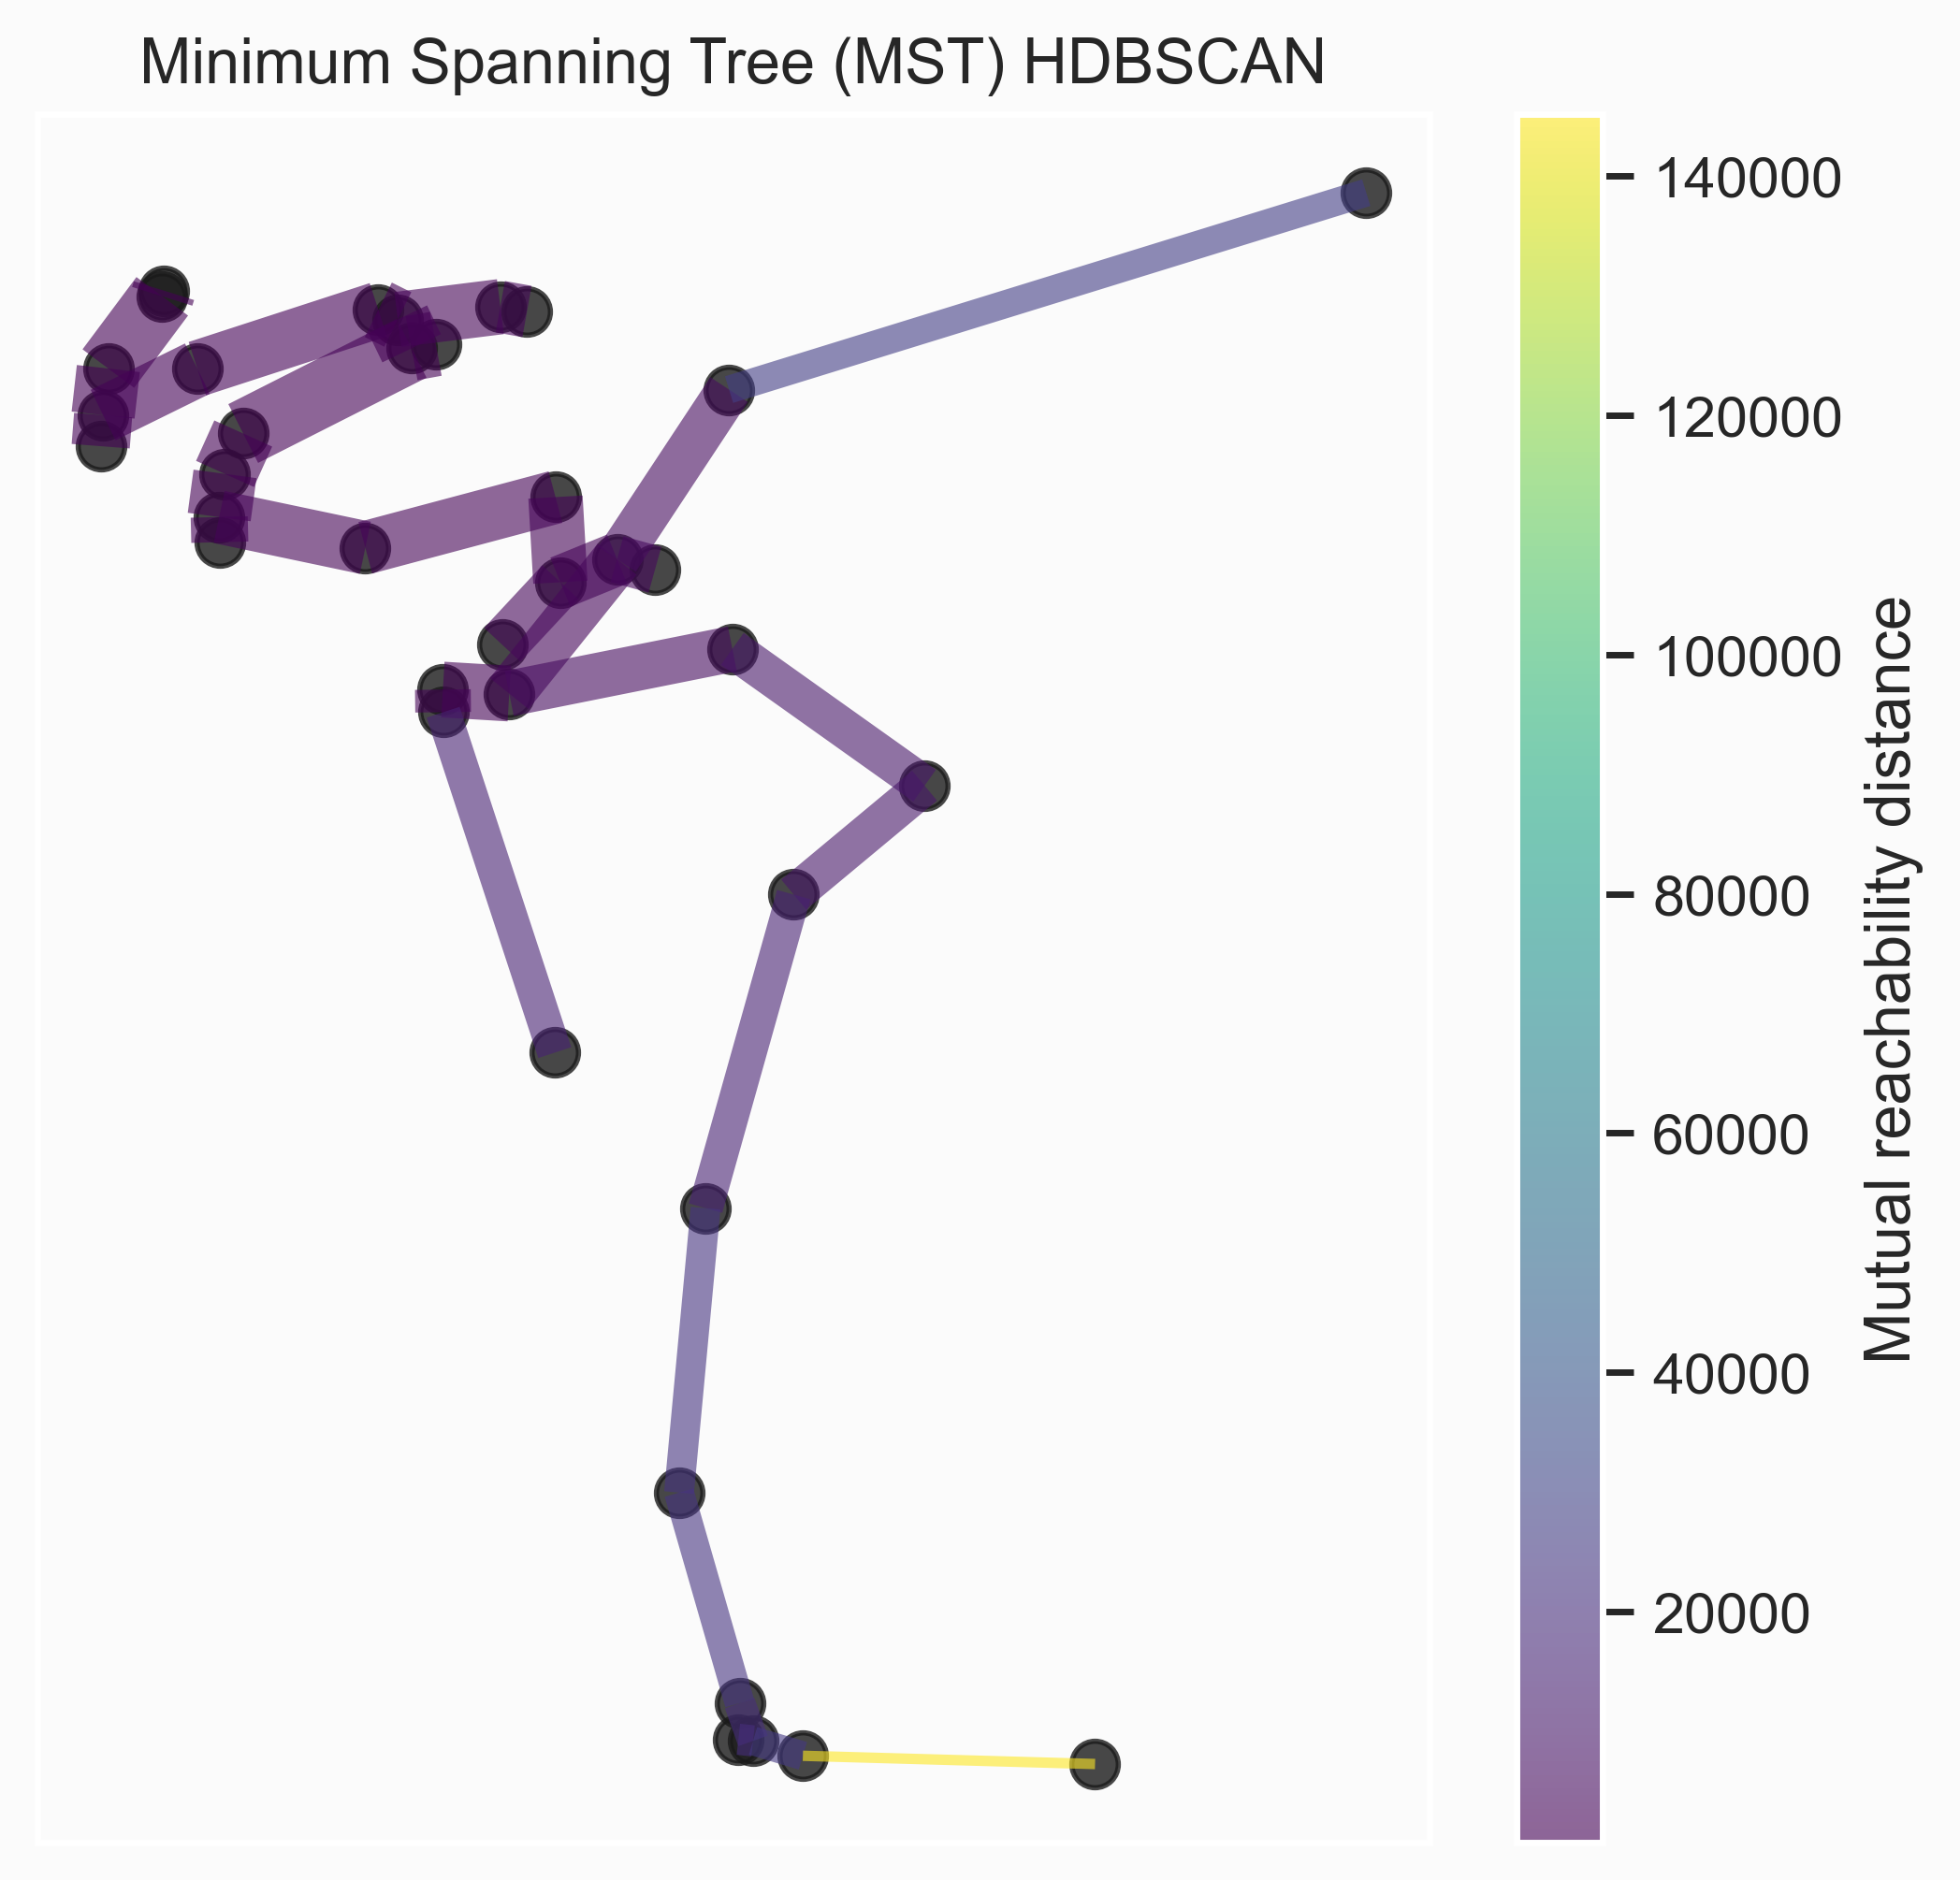

In [16]:
import matplotlib.pyplot as plt

# Plot Minimum Spanning Tree (MST) dari HDBSCAN
plt.figure(figsize=(6, 6))
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)
plt.title("Minimum Spanning Tree (MST) HDBSCAN")
plt.show()

<Axes: ylabel='distance'>

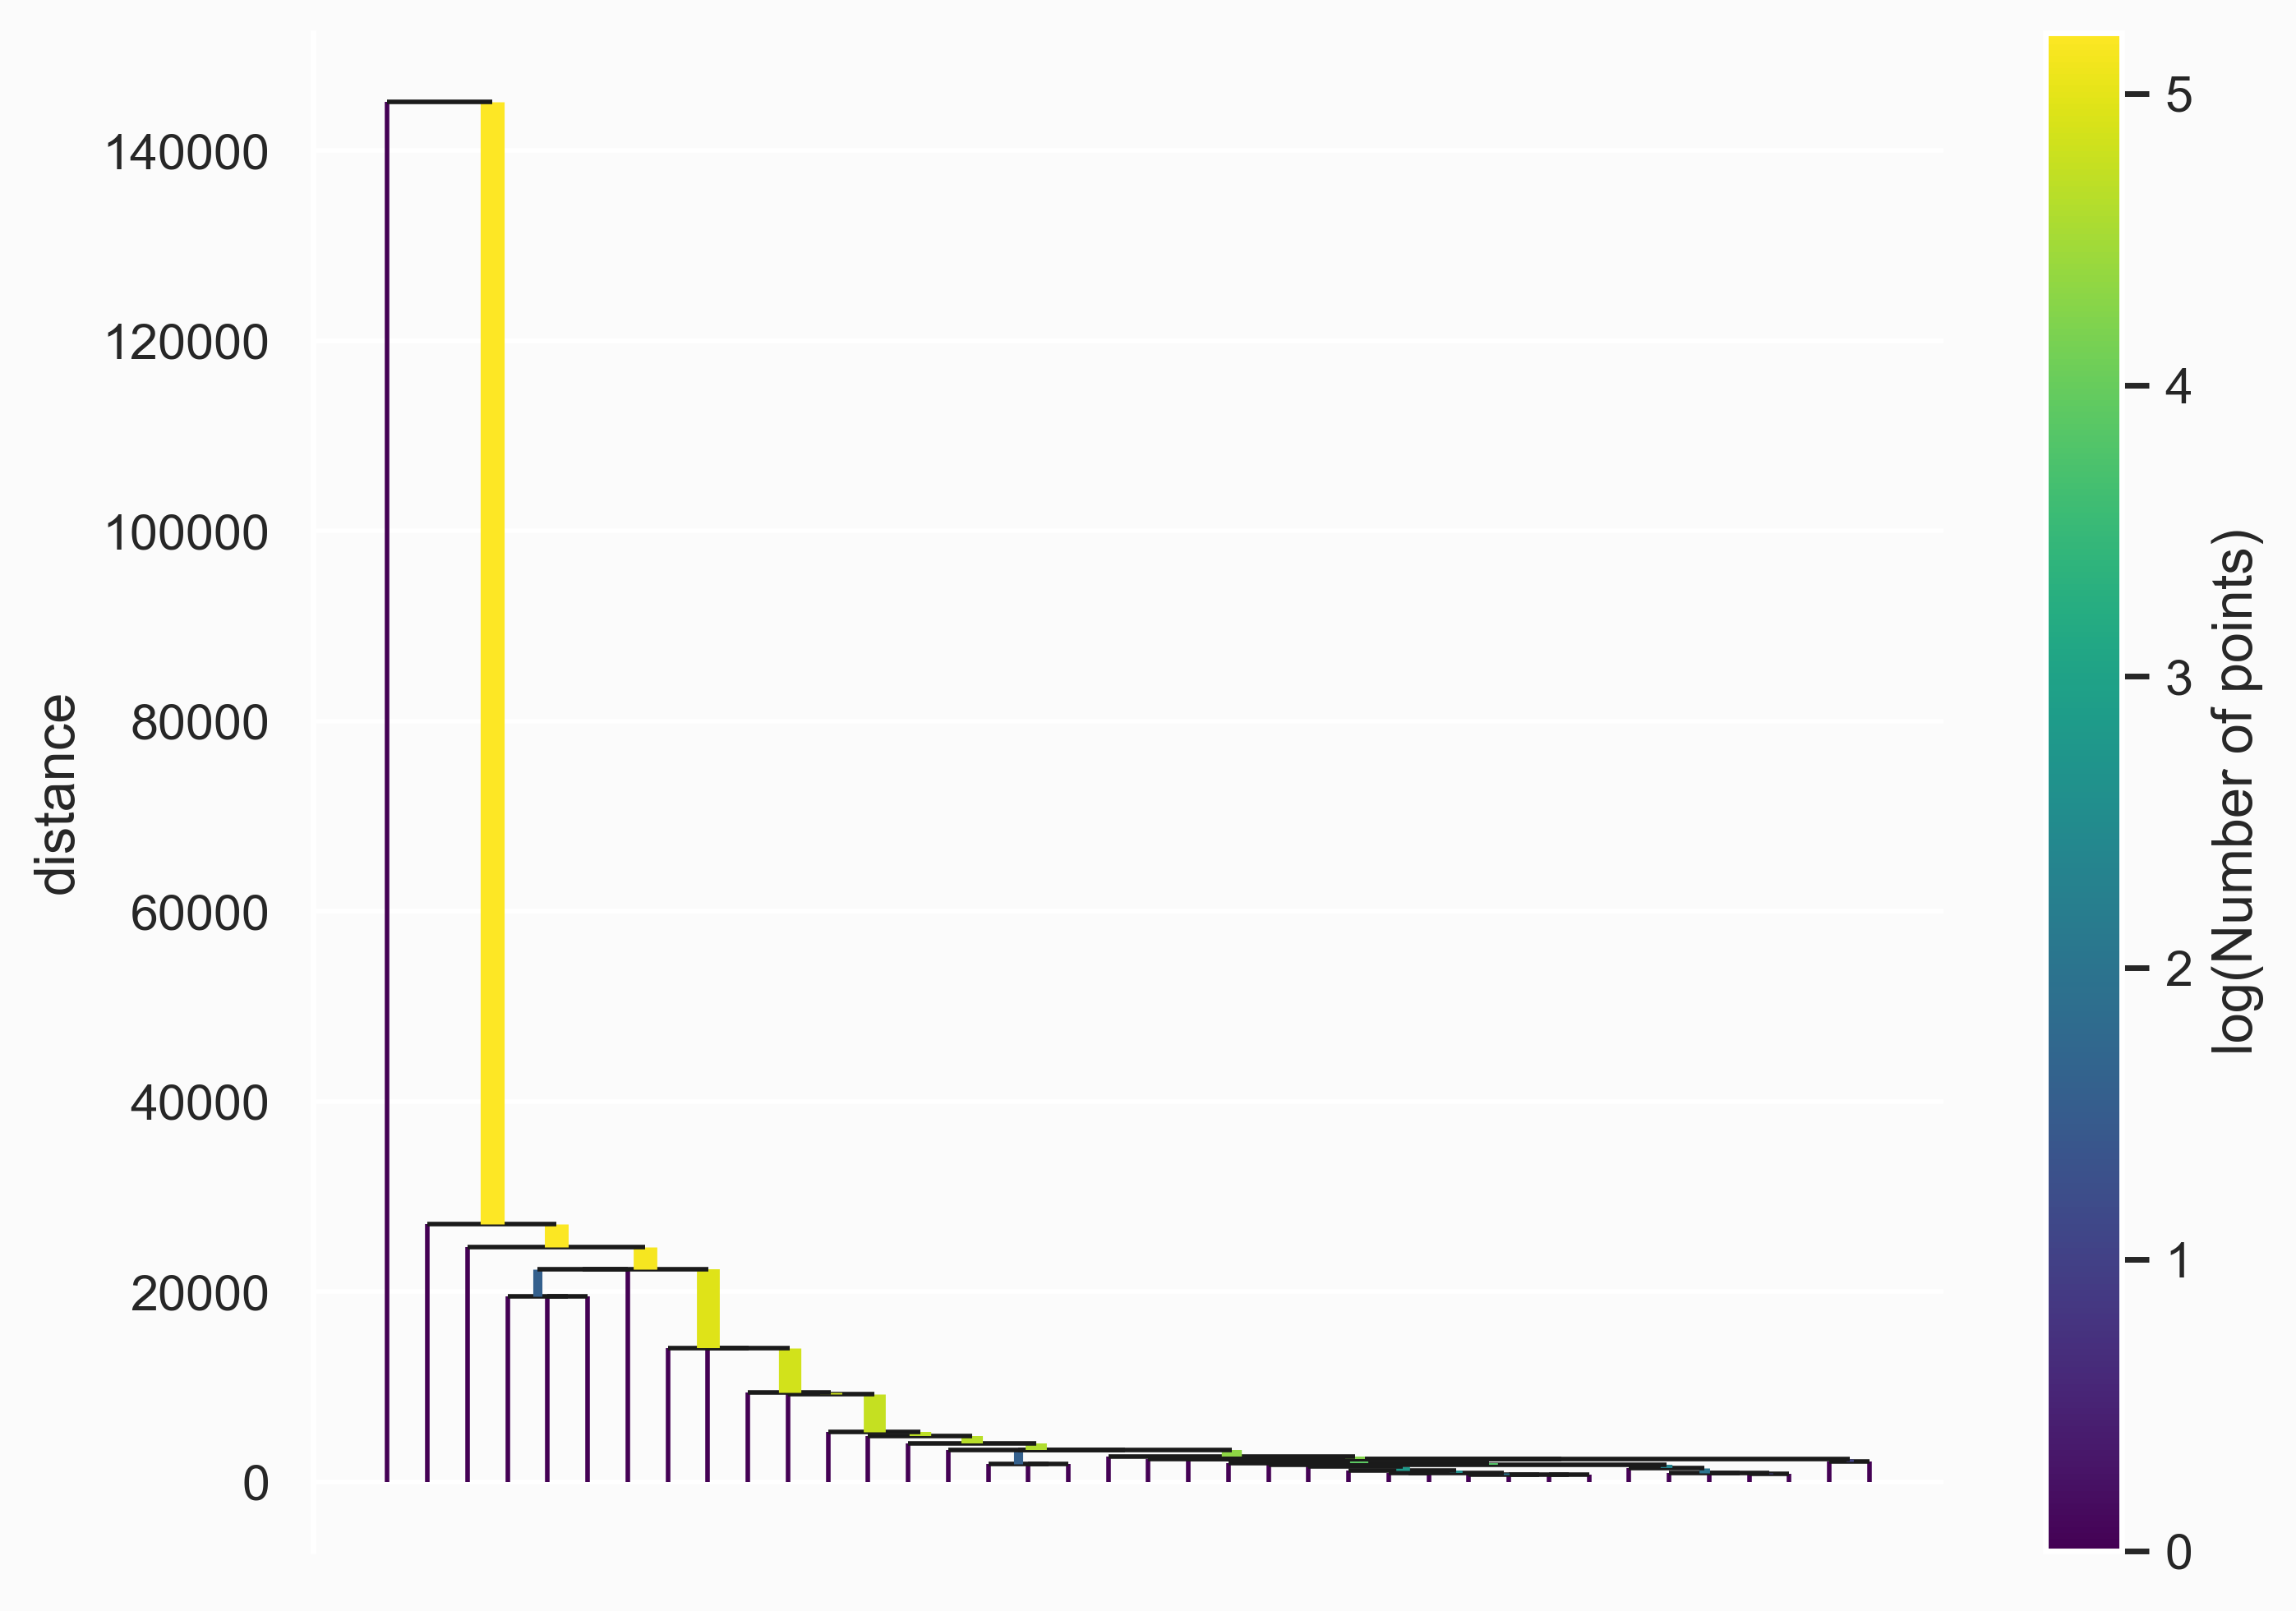

In [17]:
plt.figure(figsize=(8, 6))
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

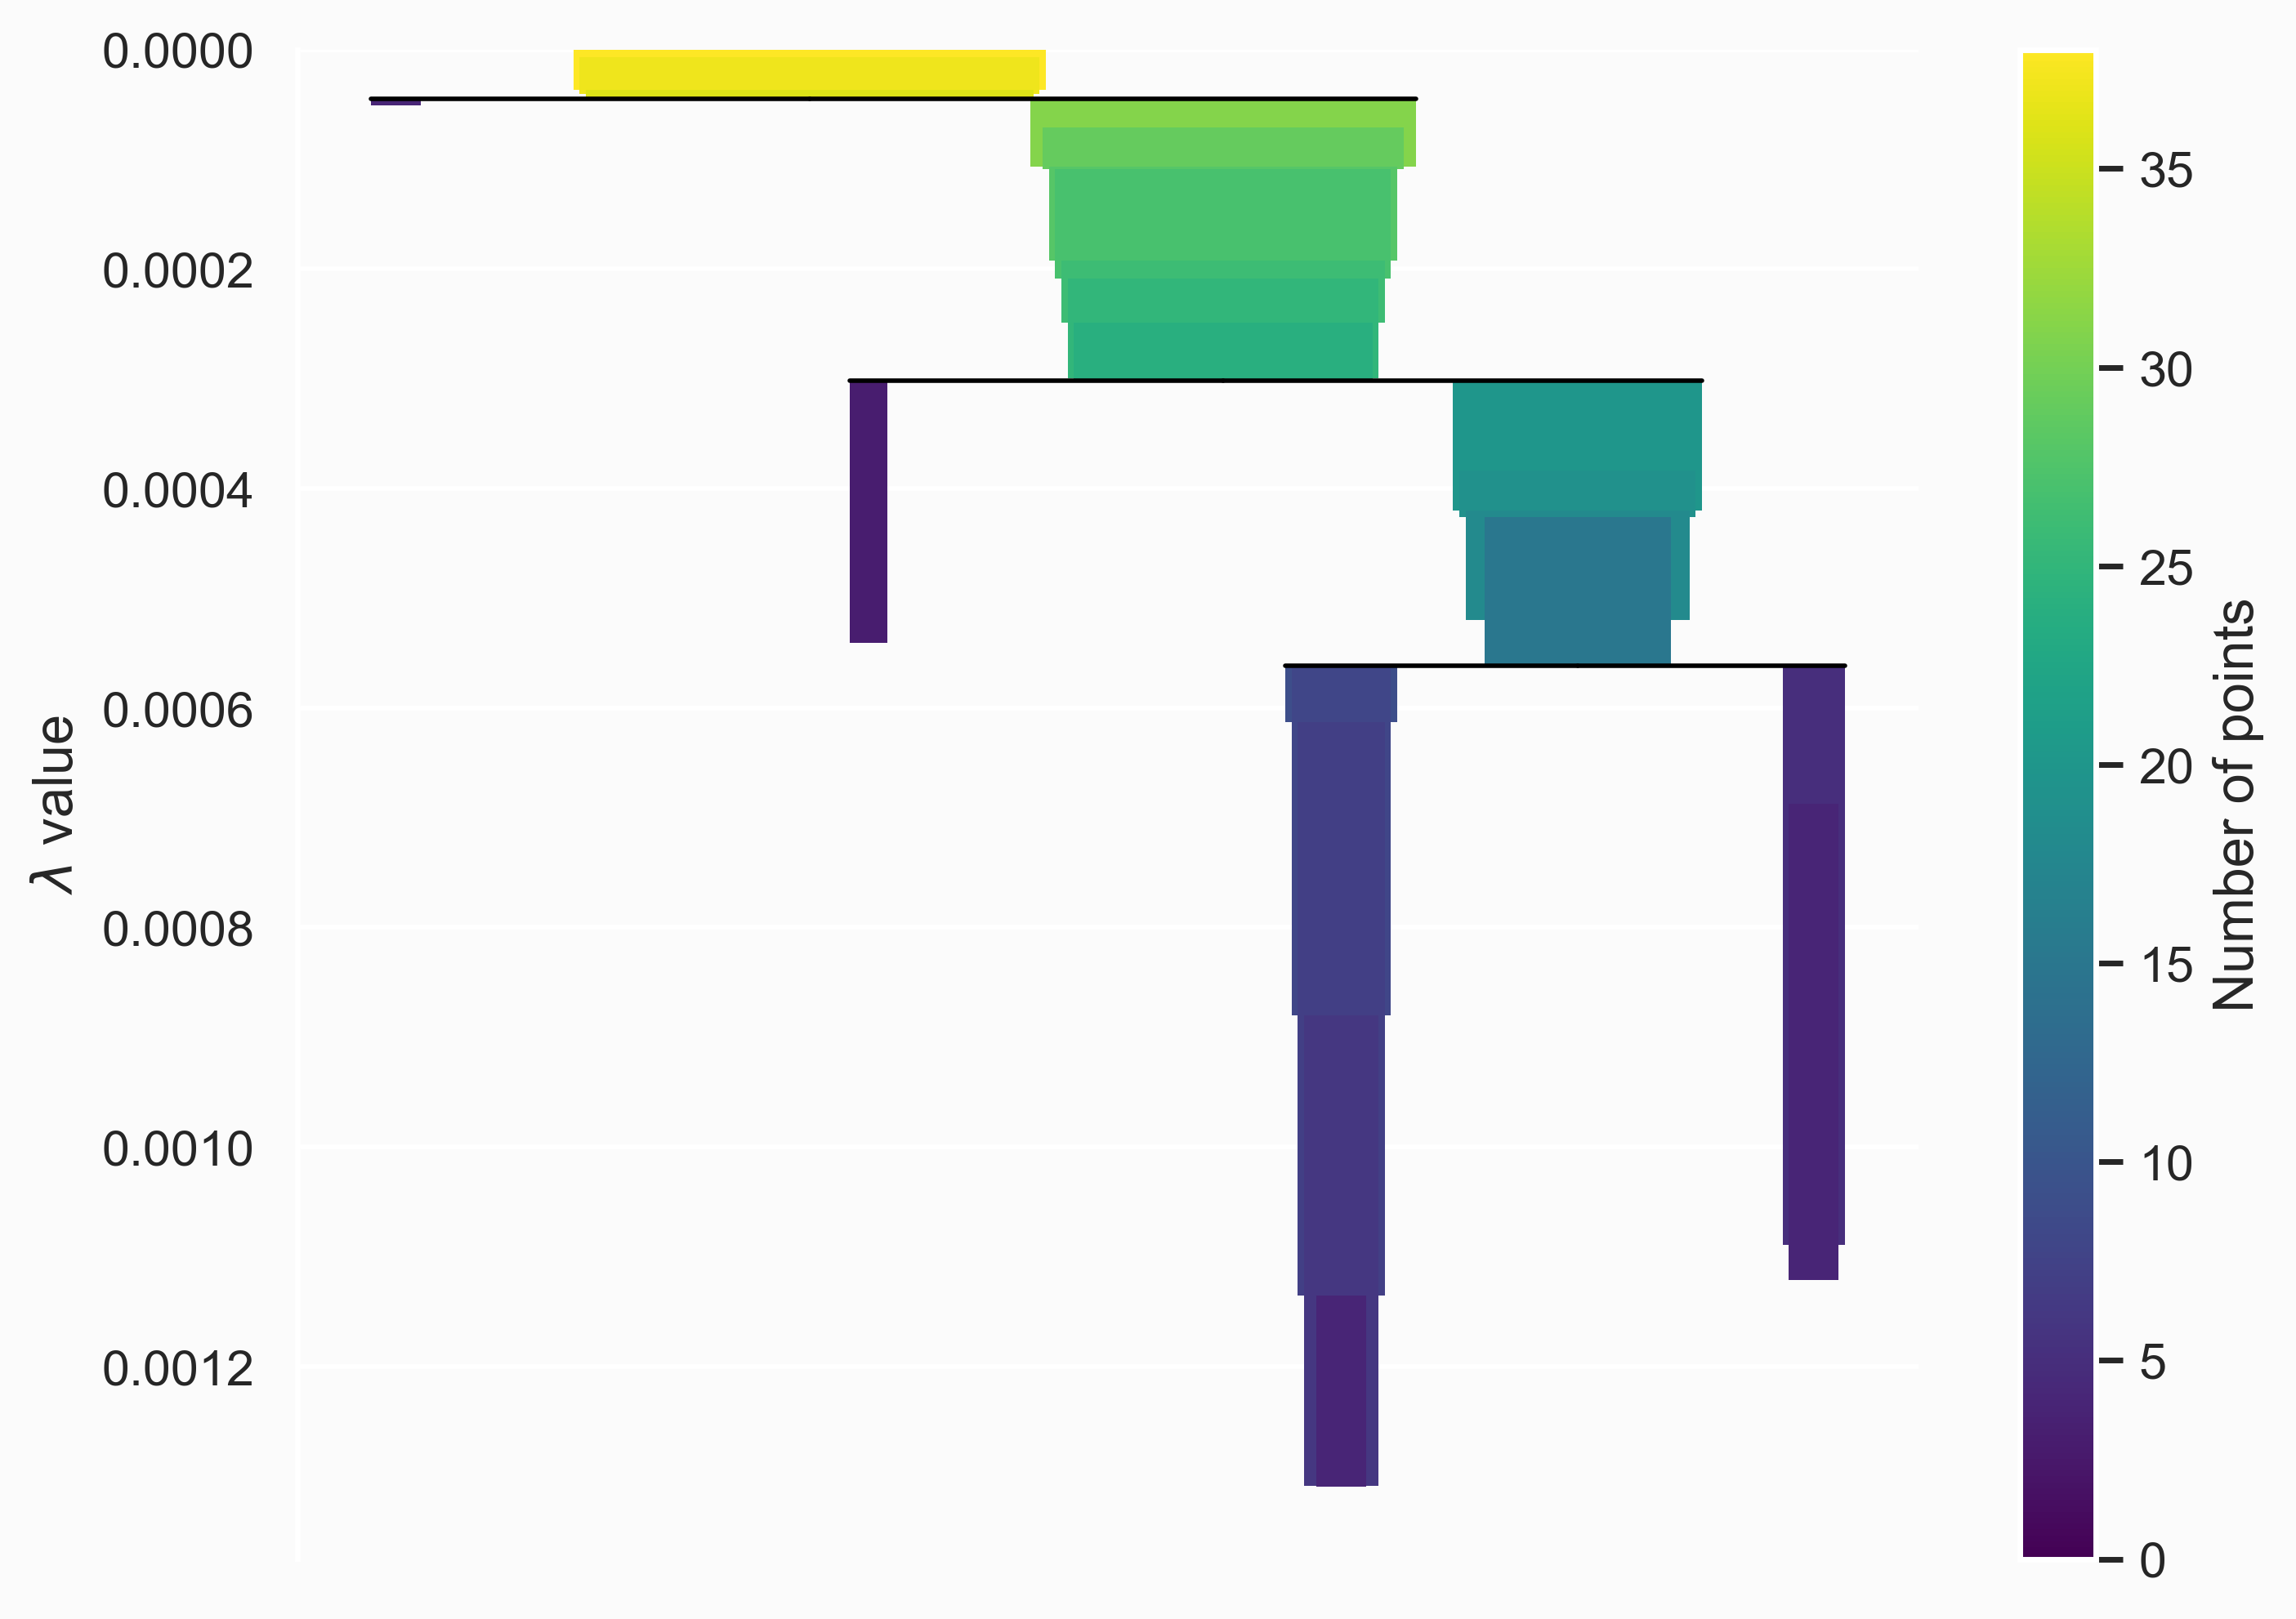

In [18]:
plt.figure(figsize=(8, 6))
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

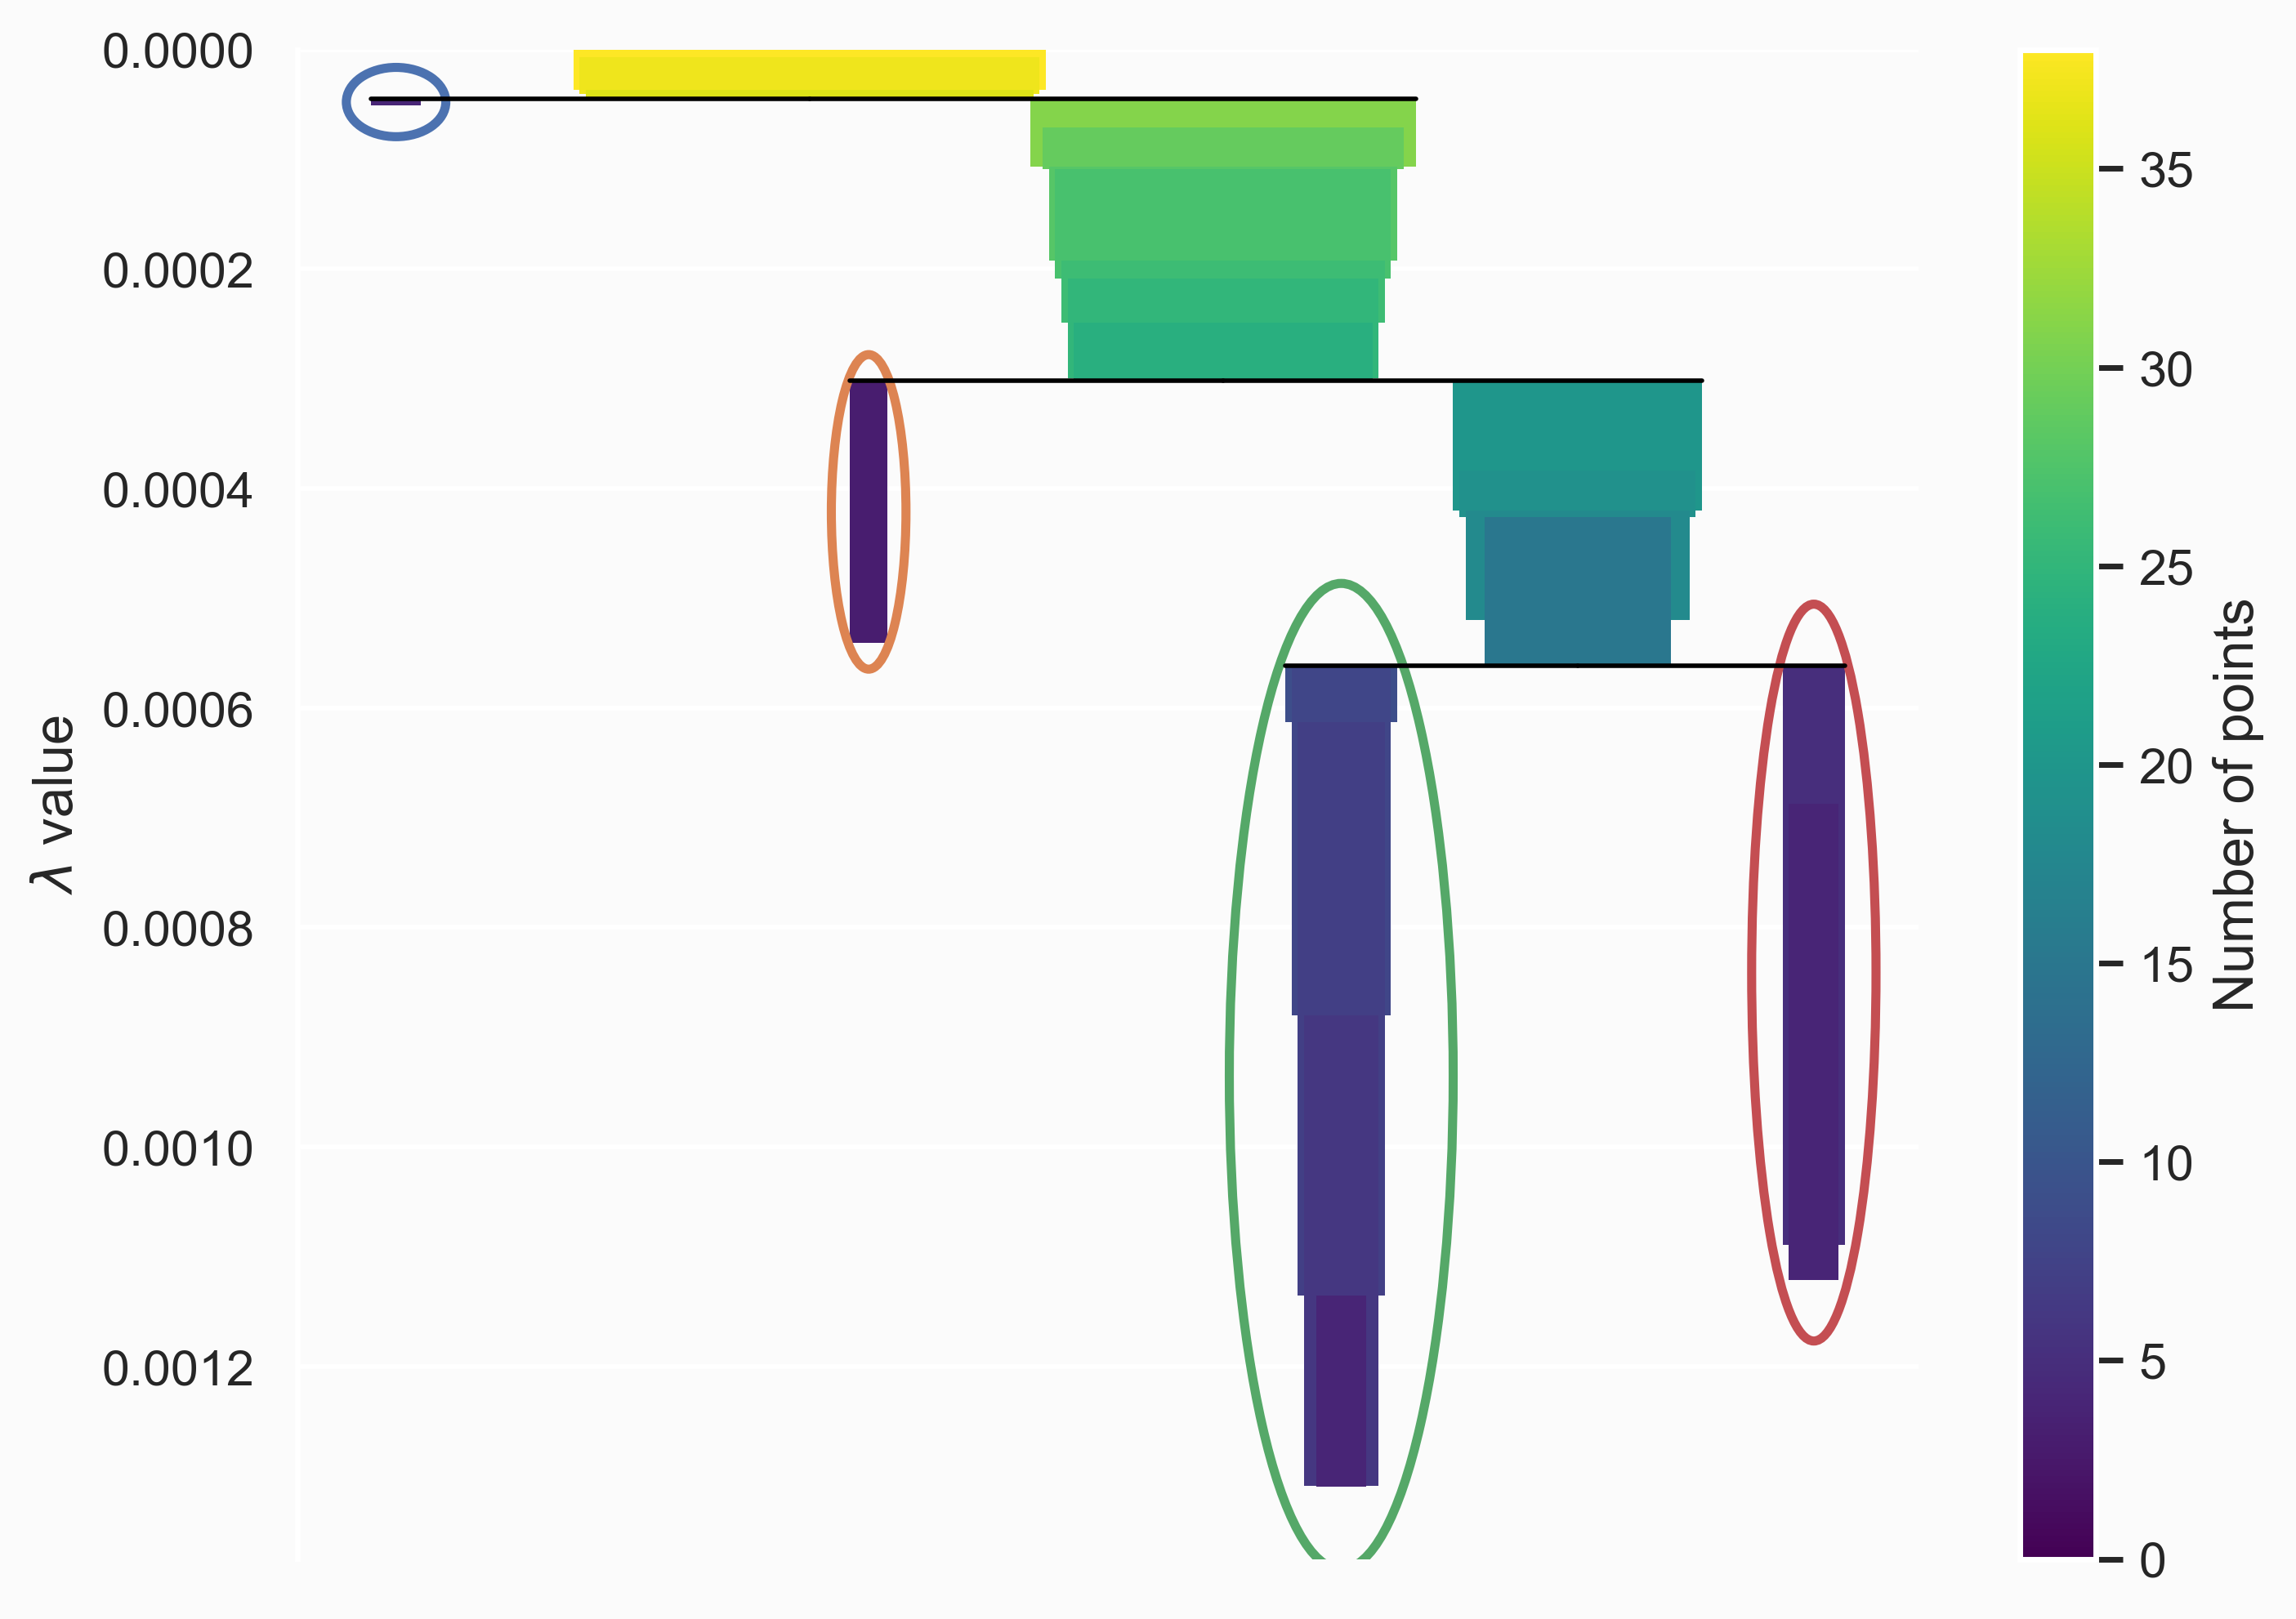

In [19]:
plt.figure(figsize=(8, 6))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [20]:
print("Cluster Labels:")
print(clusterer.labels_)

print("Cluster Probabilities:")
print(clusterer.probabilities_)

Cluster Labels:
[-1 -1 -1 -1  2  0 -1  1  1 -1 -1  2  2 -1  0 -1  2  2  2  0  2 -1 -1 -1
  2 -1 -1 -1  1  2  3  0  3 -1  3  3  3 -1]
Cluster Probabilities:
[0.         0.         0.         0.         0.4676953  1.
 0.         1.         1.         0.         0.         0.86679422
 1.         0.         0.87303619 0.         0.99902184 0.67196791
 1.         1.         1.         0.         0.         0.
 0.86679422 0.         0.         0.         1.         0.42857283
 0.97150067 1.         0.61296295 0.         1.         1.
 1.         0.        ]


In [ ]:
jatimraw_pca = pca.fit_transform(jatimraw)
jatimraw_pca_df = pd.DataFrame(jatimraw_pca, columns=[f'PC{i+1}' for i in range(jatimraw_pca.shape[1])])
jatimraw_pca_df['Cluster'] = clusterer.labels_
print(jatimraw_pca_df)

              PC1           PC2           PC3          PC4  Cluster
0   -14942.826809  -5069.289647    356.317797 -1398.132811       -1
1    -3470.509848  -5638.860555   6704.619288  9622.192369       -1
2   -10871.149272  -3810.646159    123.998938  2821.928479       -1
3   -10128.407773  -4970.846841  28025.601904 -8686.820809       -1
4   -13502.090932  -2028.735406  -2149.260428  -604.867434        2
5    33399.409272  26943.602472   8121.849056  -425.263592        0
6    -1740.300778   -617.990170   4279.895342  8999.348513       -1
7    -7251.108304  -3380.383191  -1677.352024   646.059876        1
8    -7978.071338  -2826.252660   -885.885442  2044.677241        1
9   -10510.640418  -5040.782809     62.863760  4188.616414       -1
10  -11169.315907  -1522.221408   -263.571977  2388.656413       -1
11  -14297.149815  -3446.209740  -2278.142868  -678.147473        2
12  -14625.690199  -3682.107598  -2303.216026  -832.385613        2
13   10697.421681   2528.908308   1865.613917  6

In [ ]:
jatimraw_pca_df['Cluster'] = clusterer.labels_

# Menampilkan jumlah klaster yang terbentuk
n_clusters = len(jatimraw_pca_df['Cluster'].unique())
print(f"\nJumlah Klaster yang Terbentuk: {n_clusters}")

# Menampilkan jumlah anggota setiap cluster
cluster_member_counts = jatimraw_pca_df['Cluster'].value_counts()
print("\nJumlah Anggota Setiap Cluster:")
print(cluster_member_counts)


Jumlah Klaster yang Terbentuk: 5

Jumlah Anggota Setiap Cluster:
Cluster
-1    17
 2     9
 3     5
 0     4
 1     3
Name: count, dtype: int64


In [24]:
# Menampilkan anggota mana saja yang masuk ke dalam setiap cluster
print("\nAnggota Setiap Cluster:")
for cluster_id, member_count in cluster_member_counts.items():
    cluster_members = jatimraw_pca_df[jatimraw_pca_df['Cluster'] == cluster_id].index.tolist()
    print(f"\nCluster {cluster_id} (Jumlah anggota: {member_count}):\n{cluster_members}")


Anggota Setiap Cluster:

Cluster -1 (Jumlah anggota: 17):
[0, 1, 2, 3, 6, 9, 10, 13, 15, 21, 22, 23, 25, 26, 27, 33, 37]

Cluster 2 (Jumlah anggota: 9):
[4, 11, 12, 16, 17, 18, 20, 24, 29]

Cluster 3 (Jumlah anggota: 5):
[30, 32, 34, 35, 36]

Cluster 0 (Jumlah anggota: 4):
[5, 14, 19, 31]

Cluster 1 (Jumlah anggota: 3):
[7, 8, 28]


In [39]:
# Filter cluster dengan label -1
filtered_jatimraw = jatimraw_pca_df[jatimraw_pca_df['Cluster'] != -1]

filtered_labels = filtered_jatimraw['Cluster'].values
filtered_probabilities = clusterer.probabilities_[clusterer.labels_ != -1]

print("Cluster Labels:")
print(filtered_labels)

print("Cluster Probabilities:")
print(filtered_probabilities)

Cluster Labels:
[2 0 1 1 2 2 0 2 2 2 0 2 2 1 2 3 0 3 3 3 3]
Cluster Probabilities:
[0.4676953  1.         1.         1.         0.86679422 1.
 0.87303619 0.99902184 0.67196791 1.         1.         1.
 0.86679422 1.         0.42857283 0.97150067 1.         0.61296295
 1.         1.         1.        ]


In [ ]:
# Menghapus cluster -1 dari DataFrame
jatimraw_filtered = jatimraw_pca_df.query('Cluster != -1')

if 'Cluster' in jatimraw_filtered.columns:
    jatimraw_akhir = jatimraw_filtered.drop(columns=['Cluster'])

jatimraw_akhir

PC1           PC2          PC3          PC4
4  -13502.090932  -2028.735406 -2149.260428  -604.867434
5   33399.409272  26943.602472  8121.849056  -425.263592
7   -7251.108304  -3380.383191 -1677.352024   646.059876
8   -7978.071338  -2826.252660  -885.885442  2044.677241
11 -14297.149815  -3446.209740 -2278.142868  -678.147473
12 -14625.690199  -3682.107598 -2303.216026  -832.385613
14  14842.262907  18674.095779 -1221.961090    31.533016
16 -14732.143594  -4065.112493 -2079.256722  -219.578153
17 -15391.753696  -4113.087828 -2042.950359 -1503.099115
18 -15242.155067  -4251.627874 -2053.102829  -925.574269
19  43721.161111  38255.173213  -177.231852  2501.034991
20 -14502.777323  -4335.278577 -2112.218013  -766.191209
24 -13944.704767  -2660.664961 -2160.801676  -535.593784
28  -8079.170653  -2702.964964 -1053.137332   257.952668
29 -15127.789255  -4767.679443 -3127.894768 -2432.362022
30 -16549.938281  -3664.945288 -3758.789097 -4041.446576
31  38427.188598  40732.216472 -4057.688403 -4615.095096
32 -14366.253601  -4076.942123 -3610.767617 -3961.146922
34 -16343.637008  -3868.573341 -3756.433317 -4085.319014
35 -15660.216536  -3439.436513 -3779.691852 -4052.641885
36 -15124.185839  -3670.911052 -3662.782663 -3729.572314

In [41]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk data yang telah difilter
silhouette_score_value = silhouette_score(jatimraw_akhir, filtered_labels)
print("Nilai Silhouette Score: ", silhouette_score_value)

Nilai Silhouette Score:  0.5932912433570143


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
import hdbscan
from sklearn.covariance import MinCovDet
from scipy.stats import chi2

# Define a color class for printing (optional)
class clr:
    start = '\033[94m'  # Blue
    end = '\033[0m'     # Reset
    color = '\033[92m'  # Green

# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    # Remove noise points (-1) from evaluation
    mask = y != -1
    X_filtered = X[mask]
    y_filtered = y[mask]
    
    # Compute metrics
    db_index = round(davies_bouldin_score(X_filtered, y_filtered), 3) if len(np.unique(y_filtered)) > 1 else None
    s_score = round(silhouette_score(X_filtered, y_filtered), 3) if len(np.unique(y_filtered)) > 1 else None
    ch_index = round(calinski_harabasz_score(X_filtered, y_filtered), 3) if len(np.unique(y_filtered)) > 1 else None
    
    # Print metrics
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    if db_index is not None:
        print('.: Davies-Bouldin Index: '+clr.start, db_index)
    else:
        print('.: Davies-Bouldin Index: Not computable (less than 2 clusters)')
        
    if s_score is not None:
        print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    else:
        print('.: Silhouette Score: Not computable (less than 2 clusters)')
        
    if ch_index is not None:
        print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    else:
        print('.: Calinski Harabasz Index: Not computable (less than 2 clusters)')
        
    return db_index, s_score, ch_index

# --- Perform HDBSCAN Clustering ---
def perform_hdbscan_clustering(X):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2, gen_min_span_tree=True)
    clusterer.fit(X)
    return clusterer

# --- Robust Mahalanobis Distance Calculation Function ---
def robust_mahalanobis_distance(X):
    cov = MinCovDet(random_state=0).fit(X)
    robust_cov = cov.covariance_
    robust_mean = cov.location_
    inv_covmat = np.linalg.inv(robust_cov)

    x_minus_mu = X - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())

    outlier_indices = []
    threshold = np.sqrt(chi2.ppf(0.999, df=X.shape[1]))
    for idx, value in enumerate(md):
        if value > threshold:
            outlier_indices.append(idx)
    return outlier_indices, md

# Define and apply HDBSCAN clustering
clusterer_hdbscan = perform_hdbscan_clustering(X_pca)
cluster_labels_hdbscan = clusterer_hdbscan.labels_
db_hdbscan, ss_hdbscan, ch_hdbscan = evaluate_clustering(X_pca, cluster_labels_hdbscan)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.492
.: Silhouette Score:  0.624
.: Calinski Harabasz Index:  61.465


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

# Define a color class for printing (optional)
class clr:
    start = '\033[94m'  # Blue
    end = '\033[0m'     # Reset
    color = '\033[92m'  # Green

# --- Evaluate Clustering Quality Function (Updated) ---
def evaluate_clustering(X, y):
    mask = y != -1
    X_filtered = X[mask]
    y_filtered = y[mask]
    
    # Compute metrics
    db_index = round(davies_bouldin_score(X_filtered, y_filtered), 3) if len(np.unique(y_filtered)) > 1 else None
    s_score = round(silhouette_score(X_filtered, y_filtered), 3) if len(np.unique(y_filtered)) > 1 else None
    ch_index = round(calinski_harabasz_score(X_filtered, y_filtered), 3) if len(np.unique(y_filtered)) > 1 else None
    wcss = None
    dunn_index = None
    
    if len(np.unique(y_filtered)) > 1:
        # Compute WCSS
        centroids = np.array([X_filtered[y_filtered == label].mean(axis=0) for label in np.unique(y_filtered)])
        distances = np.array([np.sum(np.square(cdist(X_filtered[y_filtered == label], [centroids[label]]))) for label in np.unique(y_filtered)])
        wcss = round(np.sum(distances), 3)

        # Compute Dunn Index
        intra_cluster_dists = []
        inter_cluster_dists = []
        labels = np.unique(y_filtered)
        for i in range(len(labels)):
            cluster_i = X_filtered[y_filtered == labels[i]]
            dist_i = pairwise_distances(cluster_i, cluster_i).max()
            intra_cluster_dists.append(dist_i)
            
            for j in range(i + 1, len(labels)):
                cluster_j = X_filtered[y_filtered == labels[j]]
                dist_ij = pairwise_distances(cluster_i, cluster_j).min()
                inter_cluster_dists.append(dist_ij)

        dunn_index = round(min(inter_cluster_dists) / max(intra_cluster_dists), 3) if intra_cluster_dists and inter_cluster_dists else None

    # Print metrics
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    if db_index is not None:
        print('.: Davies-Bouldin Index: '+clr.start, db_index)
    else:
        print('.: Davies-Bouldin Index: Not computable (less than 2 clusters)')
        
    if s_score is not None:
        print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    else:
        print('.: Silhouette Score: Not computable (less than 2 clusters)')
        
    if ch_index is not None:
        print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    else:
        print('.: Calinski Harabasz Index: Not computable (less than 2 clusters)')
    
    if wcss is not None:
        print(clr.end+'.: WCSS: '+clr.start, wcss)
    else:
        print('.: WCSS: Not computable')
        
    if dunn_index is not None:
        print(clr.end+'.: Dunn Index: '+clr.start, dunn_index)
    else:
        print('.: Dunn Index: Not computable')
        
    return db_index, s_score, ch_index, wcss, dunn_index

# --- Example Usage ---
# Define and apply HDBSCAN clustering
clusterer_hdbscan = perform_hdbscan_clustering(X_pca)
cluster_labels_hdbscan = clusterer_hdbscan.labels_

# Evaluate clustering quality
db_hdbscan, ss_hdbscan, ch_hdbscan, wcss_hdbscan, dunn_index_hdbscan = evaluate_clustering(X_pca, cluster_labels_hdbscan)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.492
.: Silhouette Score:  0.624
.: Calinski Harabasz Index:  61.465
.: WCSS:  0.789
.: Dunn Index:  0.696


### Profilisasi

In [ ]:
jatimraw_pca_df['Cluster'] = clusterer.labels_
print(jatimraw_pca_df)

              PC1           PC2           PC3          PC4  Cluster
0   -14942.826809  -5069.289647    356.317797 -1398.132811       -1
1    -3470.509848  -5638.860555   6704.619288  9622.192369       -1
2   -10871.149272  -3810.646159    123.998938  2821.928479       -1
3   -10128.407773  -4970.846841  28025.601904 -8686.820809       -1
4   -13502.090932  -2028.735406  -2149.260428  -604.867434        2
5    33399.409272  26943.602472   8121.849056  -425.263592        0
6    -1740.300778   -617.990170   4279.895342  8999.348513       -1
7    -7251.108304  -3380.383191  -1677.352024   646.059876        1
8    -7978.071338  -2826.252660   -885.885442  2044.677241        1
9   -10510.640418  -5040.782809     62.863760  4188.616414       -1
10  -11169.315907  -1522.221408   -263.571977  2388.656413       -1
11  -14297.149815  -3446.209740  -2278.142868  -678.147473        2
12  -14625.690199  -3682.107598  -2303.216026  -832.385613        2
13   10697.421681   2528.908308   1865.613917  6

In [ ]:
# Pisahkan data ke dalam masing-masing cluster
cluster_minus1 = jatimraw_pca_df[jatimraw_pca_df['Cluster'] == -1]
cluster_0 = jatimraw_pca_df[jatimraw_pca_df['Cluster'] == 0]
cluster_1 = jatimraw_pca_df[jatimraw_pca_df['Cluster'] == 1]
cluster_2 = jatimraw_pca_df[jatimraw_pca_df['Cluster'] == 2]
cluster_3 = jatimraw_pca_df[jatimraw_pca_df['Cluster'] == 3]

print("Cluster -1:")
print(cluster_minus1)

print("\nCluster 0:")
print(cluster_0)

print("\nCluster 1:")
print(cluster_1)

print("\nCluster 2:")
print(cluster_2)

print("\nCluster 3:")
print(cluster_3)

Cluster -1:
              PC1           PC2           PC3          PC4  Cluster
0   -14942.826809  -5069.289647    356.317797 -1398.132811       -1
1    -3470.509848  -5638.860555   6704.619288  9622.192369       -1
2   -10871.149272  -3810.646159    123.998938  2821.928479       -1
3   -10128.407773  -4970.846841  28025.601904 -8686.820809       -1
6    -1740.300778   -617.990170   4279.895342  8999.348513       -1
9   -10510.640418  -5040.782809     62.863760  4188.616414       -1
10  -11169.315907  -1522.221408   -263.571977  2388.656413       -1
13   10697.421681   2528.908308   1865.613917  6393.581219       -1
15  -12521.773288  -3662.235842  -1479.536950   882.786460       -1
21  -10552.937314   -504.082095   -582.938086  2888.544699       -1
22  -15449.846083  -4469.174598   -153.539746  -930.835919       -1
23   62416.218660  36897.264398  -1885.394521  -808.999522       -1
25  -14047.555691  -4291.883315   4099.786550  2010.068681       -1
26  -12222.937915  -2627.127912   -4

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data standarisasi
jatimraw_std = StandardScaler().fit_transform(jatimraw)
pca = PCA(n_components=4, random_state=24)
X_pca = pca.fit_transform(jatimraw_std)

# Mengembalikan data PCA ke bentuk data standarisasi
X_pca_back = pca.inverse_transform(X_pca)

# Standarisasi 
scaler = StandardScaler().fit(jatimraw)  # Fit scaler dengan data asli sebelum standarisasi
X_original = scaler.inverse_transform(X_pca_back)
jatimraw_original_df = pd.DataFrame(X_original, columns=jatimraw.columns)
jatimraw_original_df['Cluster'] = clusterer.labels_

# Pisahkan data ke dalam masing-masing cluster
cluster_minus1 = jatimraw_original_df[jatimraw_original_df['Cluster'] == -1]
cluster_0 = jatimraw_original_df[jatimraw_original_df['Cluster'] == 0]
cluster_1 = jatimraw_original_df[jatimraw_original_df['Cluster'] == 1]
cluster_2 = jatimraw_original_df[jatimraw_original_df['Cluster'] == 2]

# Fungsi untuk menghitung analisis deskriptif
def descriptive_stats(df):
    mean = df.mean()
    max_val = df.max()
    min_val = df.min()
    std_dev = df.std()
    return mean, max_val, min_val, std_dev

# Hitung analisis deskriptif untuk setiap cluster
mean_minus1, max_minus1, min_minus1, std_dev_minus1 = descriptive_stats(cluster_minus1)
mean_0, max_0, min_0, std_dev_0 = descriptive_stats(cluster_0)
mean_1, max_1, min_1, std_dev_1 = descriptive_stats(cluster_1)
mean_2, max_2, min_2, std_dev_2 = descriptive_stats(cluster_2)

df_profilisasi = pd.DataFrame({
    'Mean Cluster -1': mean_minus1,
    'Mean Cluster 0': mean_0,
    'Mean Cluster 1': mean_1,
    'Mean Cluster 2': mean_2,
    'Max Cluster -1': max_minus1,
    'Max Cluster 0': max_0,
    'Max Cluster 1': max_1,
    'Max Cluster 2': max_2,
    'Min Cluster -1': min_minus1,
    'Min Cluster 0': min_0,
    'Min Cluster 1': min_1,
    'Min Cluster 2': min_2,
    'Std Dev Cluster -1': std_dev_minus1,
    'Std Dev Cluster 0': std_dev_0,
    'Std Dev Cluster 1': std_dev_1,
    'Std Dev Cluster 2': std_dev_2
})
df_profilisasi = df_profilisasi[df_profilisasi.index != 'Cluster']
df_profilisasi


Mean Cluster -1  Mean Cluster 0  Mean Cluster 1  Mean Cluster 2  \
A         6866.391936     4032.911466     5476.353904     3394.252822   
B         3461.069600     2291.550261      638.623486      355.192540   
C        16644.284876    48599.412348     6645.532792     3738.233658   
D          241.186978      601.601298       40.673040      -23.234507   
E           77.321288       47.531757       34.735868       19.205970   
F         6971.667079     6961.371953     3215.861416     1509.596642   
G        14874.206037    10861.548753     6395.222902     3115.154438   
H         2550.321380     3179.259604      734.254073      156.809947   
I         5286.708681     1954.893446     1367.250108       26.681668   
J         5142.318464     4150.481451     2425.877494     1321.384365   
K         2026.977038      791.350046      815.853482      384.848088   
L         1422.148682      815.710156      618.653597      293.856815   
MN         778.408941       63.770942      202.507970        8.370721   
O         1288.654025     1124.779919      802.663737      562.301996   
P         1878.529266      807.247162     1237.253596      846.821280   
Q          525.095974      225.747121      295.360818      204.660928   
RSTU       967.205977      454.552128      636.430645      477.676630   

      Max Cluster -1  Max Cluster 0  Max Cluster 1  Max Cluster 2  \
A       15215.823444    5852.047495    6614.976951    4220.482778   
B       31037.041242    8832.093560    1026.804912     898.454288   
C       99516.004687   71052.449375    6897.356892    5039.408503   
D        2162.370621     905.576270      42.969292      -4.215981   
E         697.099203      60.040680      38.062322      35.163014   
F       45049.576215    9631.868566    3501.697657    1902.171408   
G      128349.969312   14125.209348    6887.159347    5339.756632   
H       25204.172084    4463.572293     828.294249     431.835441   
I       65304.497607    3020.692538    1728.379978    1805.602534   
J       34186.403868    5768.737949    2538.080428    1579.033520   
K       20007.555404    1209.362755     917.477391     917.305870   
L       11715.007784    1177.939128     657.198461     498.032795   
MN       9992.828417     230.945323     262.023103     323.902762   
O        4763.103611    1549.228472     864.800913     622.943527   
P       10868.481735    1040.087225    1313.569335    1038.780090   
Q        4094.942374     290.701669     315.987924     316.999044   
RSTU     6303.981773     560.605001     665.754700     641.585397   

      Min Cluster -1  Min Cluster 0  Min Cluster 1  Min Cluster 2  \
A         364.613527    -105.827681    4805.750814    1517.462861   
B       -1248.912282    -645.242098     299.252323    -710.237356   
C        1280.640580   28467.500855    6388.456954   -1289.631637   
D         -38.343619     334.874808      36.914636     -64.318142   
E           9.557273      29.320759      32.396984      11.888976   
F        1357.746248    4124.432115    2923.155679    1092.734436   
G        1710.267188    6535.261730    5882.905448    1902.156382   
H        -173.142972    2056.402212     684.888850     -21.889280   
I       -1204.328170     525.704800    1180.884078    -726.465799   
J        1230.235351    2282.327463    2269.777050    1032.024551   
K         131.544639     284.381866     753.805221     148.677542   
L         191.197600     348.737009     566.510311     172.755410   
MN       -183.677249    -132.401491     170.194065    -119.862356   
O         621.334953     638.588209     762.978007     470.573298   
P         545.850740     293.394351    1133.696923     713.466117   
Q         148.529591     124.855429     278.958235     156.074162   
RSTU      273.514366     283.399428     599.241384     405.989044   

      Std Dev Cluster -1  Std Dev Cluster 0  Std Dev Cluster 1  \
A            4074.992296        2821.054169         991.265259   
B            7305.999723        4422.786520         366.224008   
C      

In [34]:
# Asumsikan kolom 'Cluster' sudah ditambahkan ke DataFrame 'jatimraw'
# Jika belum, tambahkan kolom 'Cluster' dari hasil clustering ke 'jatimraw'
#jatimraw['Cluster'] = clusterer.labels_

# Membuat DataFrame baru untuk masing-masing cluster yang berisi kolom 'kab_kota'
#cluster_minus1_df = jatimraw[jatimraw['Cluster'] == -1][['kab_kota', 'Cluster']]
#cluster_0_df = jatimraw[jatimraw['Cluster'] == 0][['kab_kota', 'Cluster']]
#cluster_1_df = jatimraw[jatimraw['Cluster'] == 1][['kab_kota', 'Cluster']]
#cluster_2_df = jatimraw[jatimraw['Cluster'] == 2][['kab_kota', 'Cluster']]

# Menampilkan DataFrame untuk setiap cluster
#print("DataFrame Cluster -1:")
#print(cluster_minus1_df)

#print("\nDataFrame Cluster 0:")
#print(cluster_0_df)

#print("\nDataFrame Cluster 1:")
#print(cluster_1_df)

#print("\nDataFrame Cluster 2:")
#print(cluster_2_df)

In [ ]:
jatimraw = pd.read_csv(file_path, index_col='kab_kota')
jatimraw_reset = jatimraw.reset_index()
jatimraw_reset['Cluster'] = clusterer.labels_

cluster_minus1_df = jatimraw_reset[jatimraw_reset['Cluster'] == -1][['kab_kota', 'Cluster']]
cluster_0_df = jatimraw_reset[jatimraw_reset['Cluster'] == 0][['kab_kota', 'Cluster']]
cluster_1_df = jatimraw_reset[jatimraw_reset['Cluster'] == 1][['kab_kota', 'Cluster']]
cluster_2_df = jatimraw_reset[jatimraw_reset['Cluster'] == 2][['kab_kota', 'Cluster']]

cluster_minus1_df['Cluster Description'] = 'Cluster -1'
cluster_0_df['Cluster Description'] = 'Cluster 0'
cluster_1_df['Cluster Description'] = 'Cluster 1'
cluster_2_df['Cluster Description'] = 'Cluster 2'

all_clusters_df = pd.concat([cluster_minus1_df, cluster_0_df, cluster_1_df, cluster_2_df])
all_clusters_df = all_clusters_df[['kab_kota', 'Cluster', 'Cluster Description']]
print("DataFrame gabungan semua cluster:")
all_clusters_df

DataFrame gabungan semua cluster:


kab_kota  Cluster Cluster Description
0          Bangkalan       -1          Cluster -1
1         Banyuwangi       -1          Cluster -1
2             Blitar       -1          Cluster -1
3         Bojonegoro       -1          Cluster -1
5             Gresik       -1          Cluster -1
6             Jember       -1          Cluster -1
7            Jombang       -1          Cluster -1
8             Kediri       -1          Cluster -1
9           Lamongan       -1          Cluster -1
13            Malang       -1          Cluster -1
14         Mojokerto       -1          Cluster -1
19          Pasuruan       -1          Cluster -1
21       Probolinggo       -1          Cluster -1
23          Sidoarjo       -1          Cluster -1
25           Sumenep       -1          Cluster -1
27             Tuban       -1          Cluster -1
28       Tulungagung       -1          Cluster -1
29         Kota Batu       -1          Cluster -1
31       Kota Kediri       -1          Cluster -1
33       Kota Malang       -1          Cluster -1
37     Kota Surabaya       -1          Cluster -1
30       Kota Blitar        0           Cluster 0
32       Kota Madiun        0           Cluster 0
34    Kota Mojokerto        0           Cluster 0
35     Kota Pasuruan        0           Cluster 0
36  Kota Probolinggo        0           Cluster 0
10          Lumajang        1           Cluster 1
15           Nganjuk        1           Cluster 1
26        Trenggalek        1           Cluster 1
4          Bondowoso        2           Cluster 2
11            Madiun        2           Cluster 2
12           Magetan        2           Cluster 2
16             Ngawi        2           Cluster 2
17           Pacitan        2           Cluster 2
18         Pamekasan        2           Cluster 2
20          Ponorogo        2           Cluster 2
22           Sampang        2           Cluster 2
24         Situbondo        2           Cluster 2

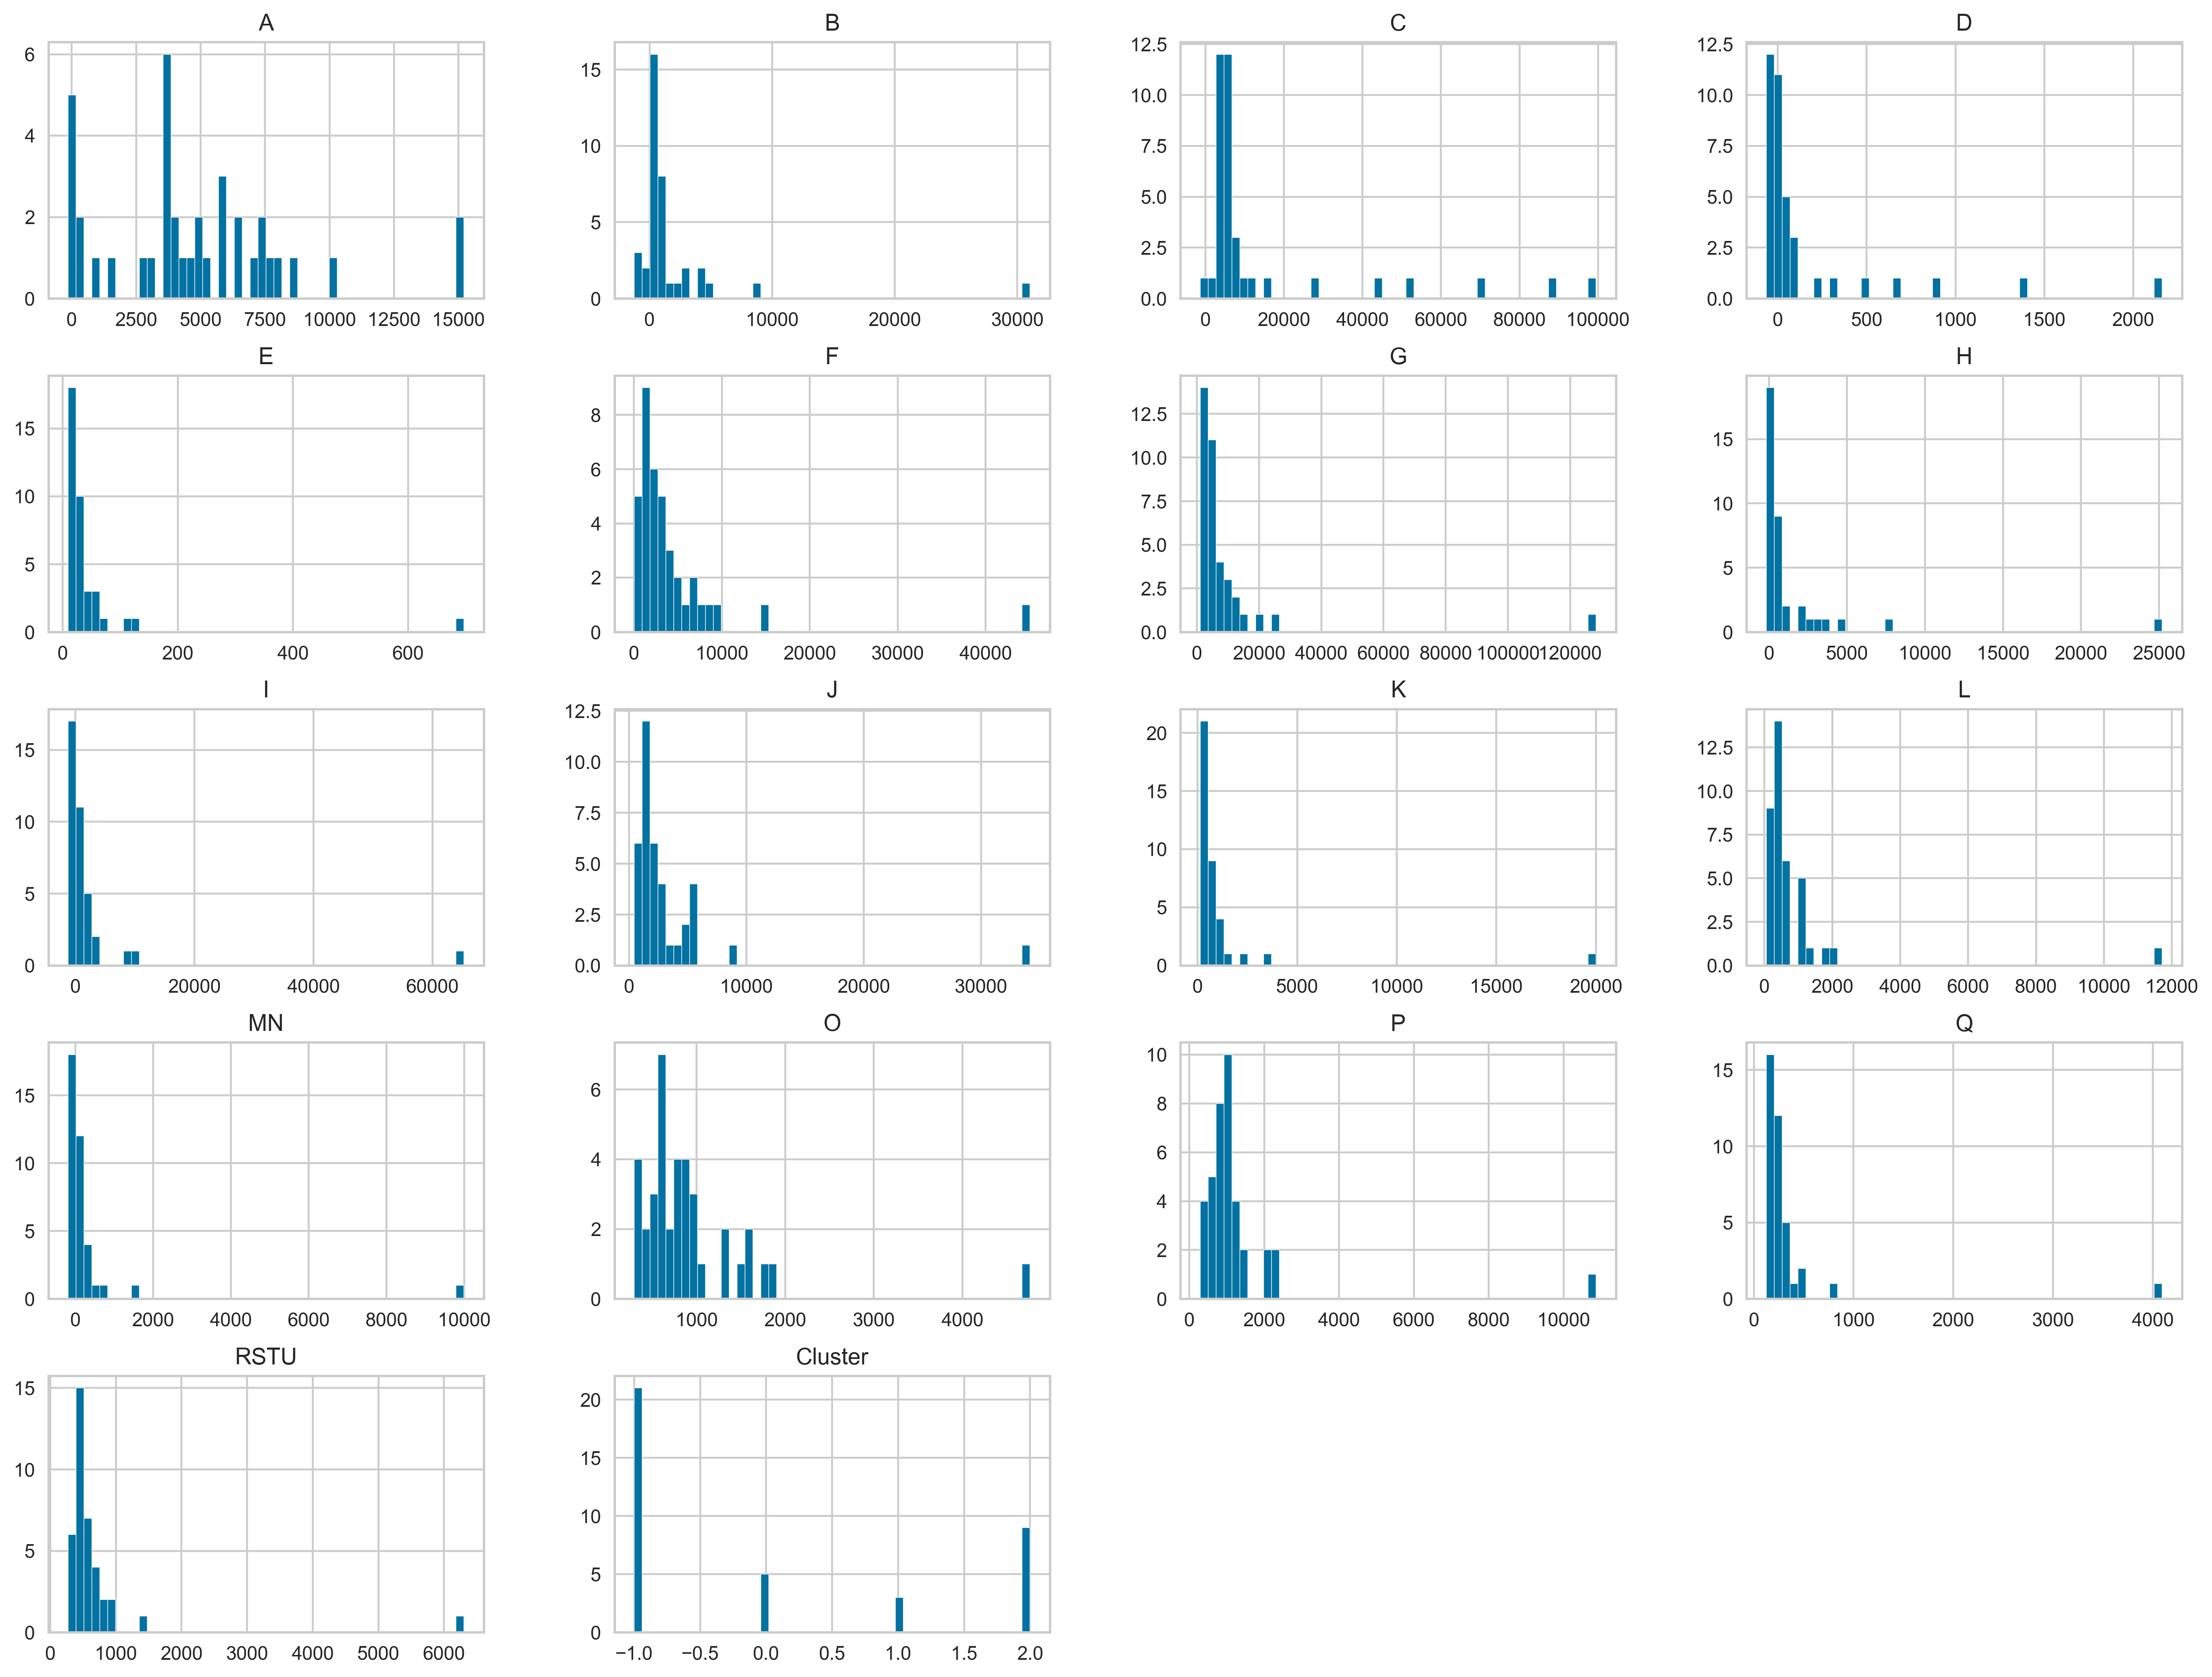

In [77]:
jatimraw_original_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Hierarchical Agglomerative

## Pautan Rataan

In [58]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Menghitung jarak antara semua titik
distance_matrix = sch.distance.pdist(X_pca, metric='euclidean')

# Menghitung matriks linkage menggunakan pautan rataan
linkage_matrix = sch.linkage(distance_matrix, method='average')

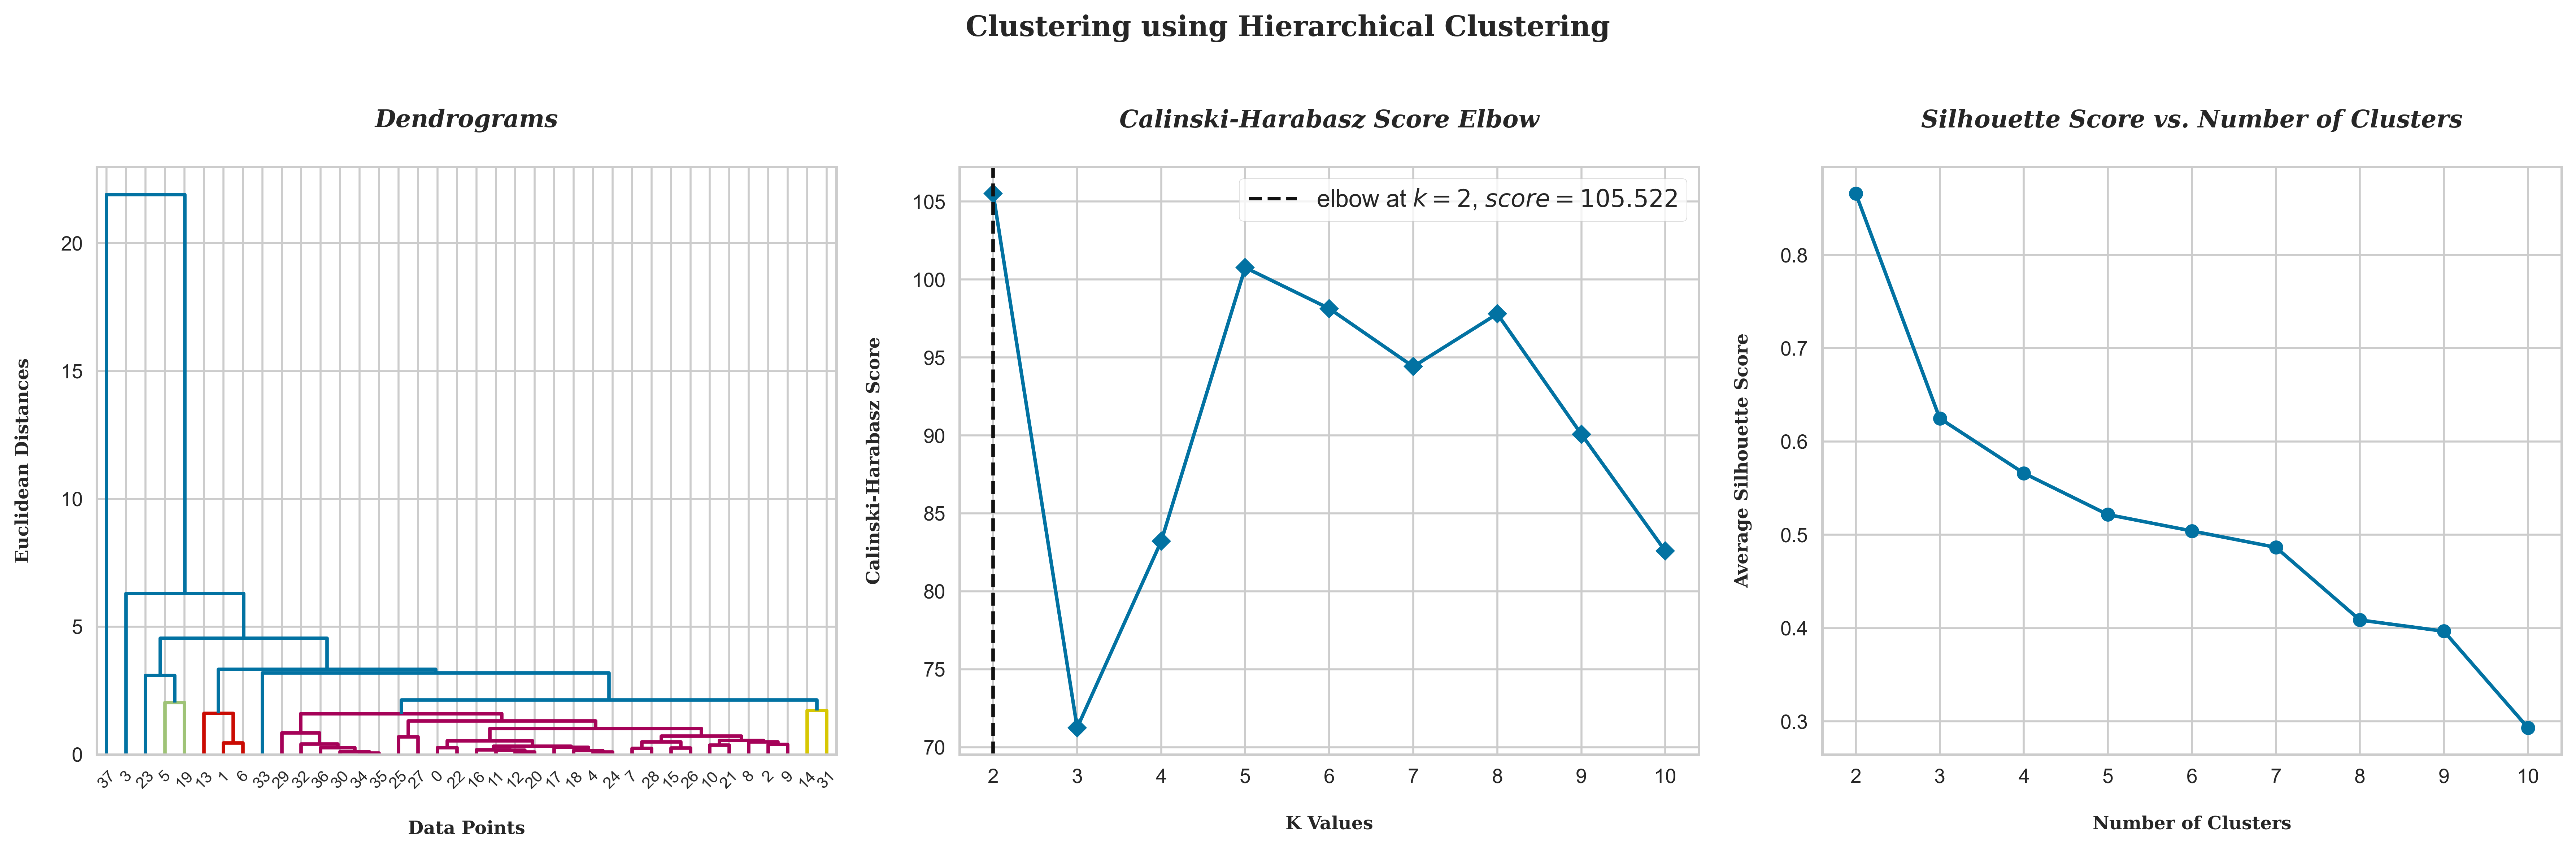

In [59]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# --- Dendrogram Plotting Function ---
def agg_dendrogram_with_labels(method):
    # --- Figure Settings ---
    ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    text_style=dict(fontweight='bold', fontfamily='serif')
    plt.figure(figsize=(18, 6))
    
    # --- Dendrogram Plot ---
    ax1 = plt.subplot(1, 3, 1)
    dend = shc.dendrogram(shc.linkage(X_pca, method=method, metric='euclidean'), color_threshold=2.1)
    #plt.axhline(y=2.1, color='#3E3B39', linestyle='--')
    plt.xlabel('\nData Points', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.ylabel('Euclidean Distances\n', fontsize=9, fontweight='bold', fontfamily='serif')
    #plt.annotate('Horizontal Cut Line', xy=(0, 2.1), xytext=(0, 2.1), fontsize=8, bbox=bbox, **ann)
    plt.title('Dendrograms\n', **title)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2 = plt.subplot(1, 3, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(linkage=method), metric='calinski_harabasz', timings=False, ax=ax2, locate_elbow=True)
    elbow_score_ch.fit(X_pca)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

    # --- Silhouette Score Plot ---
    ax3 = plt.subplot(1, 3, 3)
    range_n_clusters = list(range(2, 11))
    silhouette_avg = []
    
    for n_clusters in range_n_clusters:
        # Compute the linkage matrix using average method
        Z = shc.linkage(X_pca, method='average', metric='euclidean')
        
        # Assign clusters from the linkage matrix
        cluster_labels = shc.fcluster(Z, t=n_clusters, criterion='maxclust')
        silhouette_avg.append(silhouette_score(X_pca, cluster_labels))
    
    ax3.plot(range_n_clusters, silhouette_avg, marker='o')
    ax3.set_title('Silhouette Score vs. Number of Clusters\n', **title)
    ax3.set_xlabel('\nNumber of Clusters', fontsize=9, **text_style)
    ax3.set_ylabel('Average Silhouette Score\n', fontsize=9, **text_style)
    ax3.set_xticks(range_n_clusters)
    
    plt.suptitle('Clustering using Hierarchical Clustering\n', fontsize=14, fontweight='bold', fontfamily='serif')
    plt.tight_layout()
    plt.savefig('dendrogram_with_labels.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# --- Calling Dendrogram Functions ---
agg_dendrogram_with_labels('average')

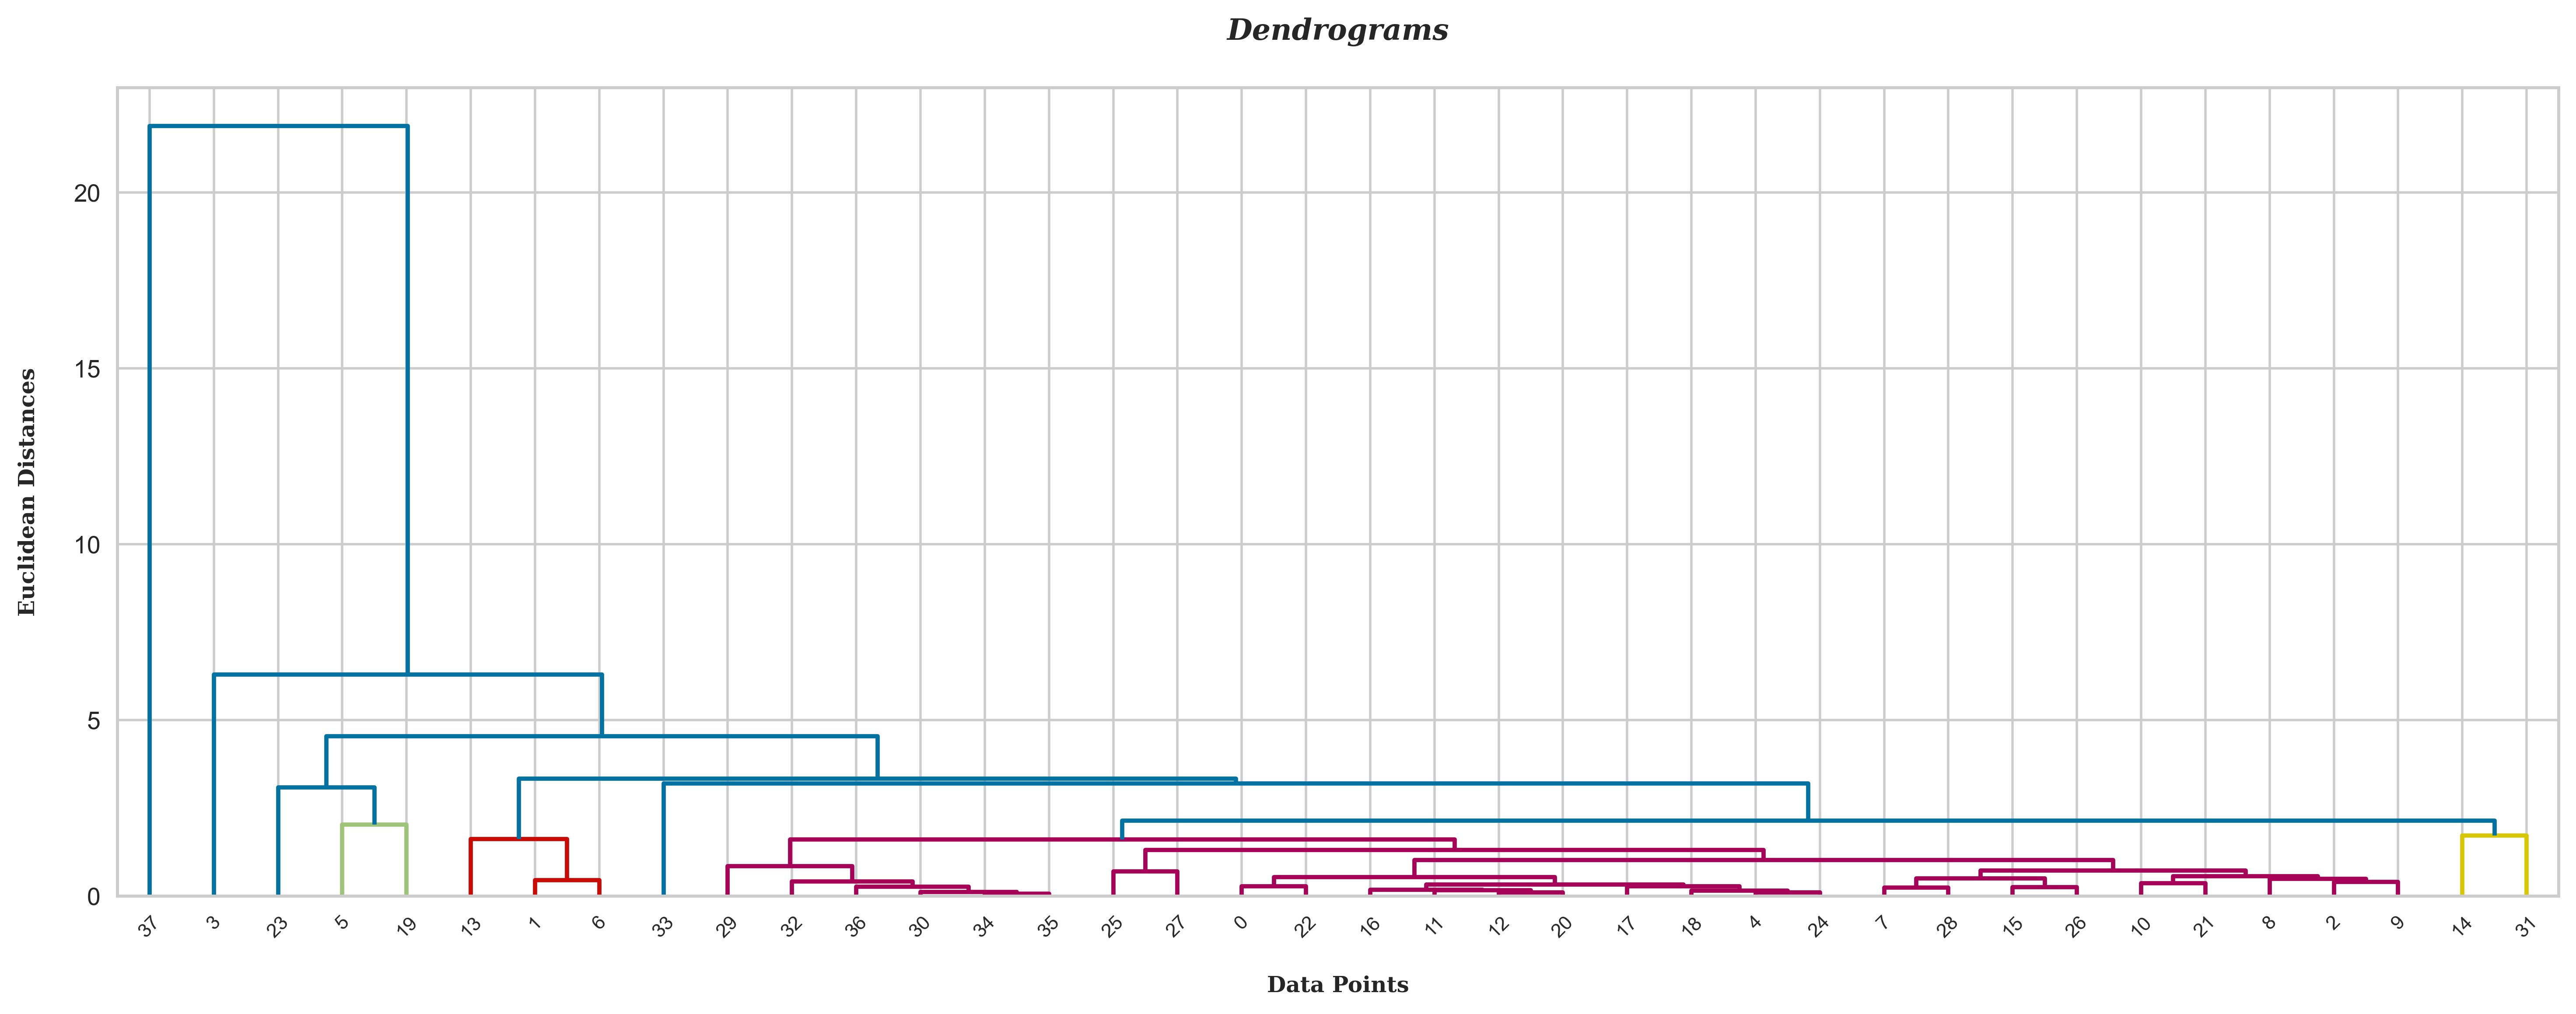

In [60]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# --- Dendrogram Plotting Function ---
def agg_dendrogram_with_labels(method):
    # --- Figure Settings ---
    ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    text_style=dict(fontweight='bold', fontfamily='serif')
    plt.figure(figsize=(18, 6))
    
    # --- Dendrogram Plot ---
    ax1 = plt.subplot(1, 1, 1)
    dend = shc.dendrogram(shc.linkage(X_pca, method=method, metric='euclidean'), color_threshold=2.1)
    #plt.axhline(y=2.1, color='#3E3B39', linestyle='--')
    plt.xlabel('\nData Points', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.ylabel('Euclidean Distances\n', fontsize=9, fontweight='bold', fontfamily='serif')
    #plt.annotate('Horizontal Cut Line', xy=(0, 2.1), xytext=(0, 2.1), fontsize=8, bbox=bbox, **ann)
    plt.title('Dendrograms\n', **title)
agg_dendrogram_with_labels('average')

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Define a color class for printing (optional)
class clr:
    start = '\033[94m'  # Blue
    end = '\033[0m'     # Reset
    color = '\033[92m'  # Green

# --- Dunn Index Calculation ---
def dunn_index(X, labels):
    distances = squareform(pdist(X))  # Calculate pairwise distances
    n_clusters = len(np.unique(labels))
    
    intra_distances = []
    inter_distances = []

    for i in range(n_clusters):
        cluster_i = X[labels == i]
        if len(cluster_i) > 1:
            intra_distances.append(np.max(pdist(cluster_i)))
        
        for j in range(i + 1, n_clusters):
            cluster_j = X[labels == j]
            inter_distances.append(np.min(pdist(np.vstack([cluster_i, cluster_j]))))

    # Dunn Index = min(inter-cluster distance) / max(intra-cluster distance
    return np.min(inter_distances) / np.max(intra_distances)

# --- WCSS Calculation ---
def calculate_wcss(X, labels):
    wcss = 0
    n_clusters = len(np.unique(labels))
    for i in range(n_clusters):
        cluster_i = X[labels == i]
        if len(cluster_i) > 0:
            centroid = np.mean(cluster_i, axis=0)
            wcss += np.sum((cluster_i - centroid) ** 2)
    return round(wcss, 3)

# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    dunn_idx = round(dunn_index(X, y), 3)
    wcss = calculate_wcss(X, y)

    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    print(clr.end+'.: Dunn Index: '+clr.start, dunn_idx)
    print(clr.end+'.: WCSS: '+clr.start, wcss)

    return db_index, s_score, ch_index, dunn_idx, wcss

# --- Perform Hierarchical Clustering using Average Linkage ---
def perform_hierarchical_clustering(X, n_clusters):
    # Perform Agglomerative Clustering using 'average' linkage
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = agglomerative.fit_predict(X)
    return cluster_labels

# --- Example Usage ---
# Define the number of clusters
n_clusters = 4

# Perform clustering
y_agg_cluster = perform_hierarchical_clustering(X_pca, n_clusters)

# Evaluate clustering quality
db_agg, ss_agg, ch_agg, dunn_agg, wcss_agg = evaluate_clustering(X_pca, y_agg_cluster)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.403
.: Silhouette Score:  0.566
.: Calinski Harabasz Index:  83.21
.: Dunn Index:  0.012
.: WCSS:  74.529


## Pautan Single

In [62]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Menghitung jarak antara semua titik
distance_matrix = sch.distance.pdist(X_pca, metric='euclidean')

# Menghitung matriks linkage menggunakan pautan rataan
linkage_matrix = sch.linkage(distance_matrix, method='single')

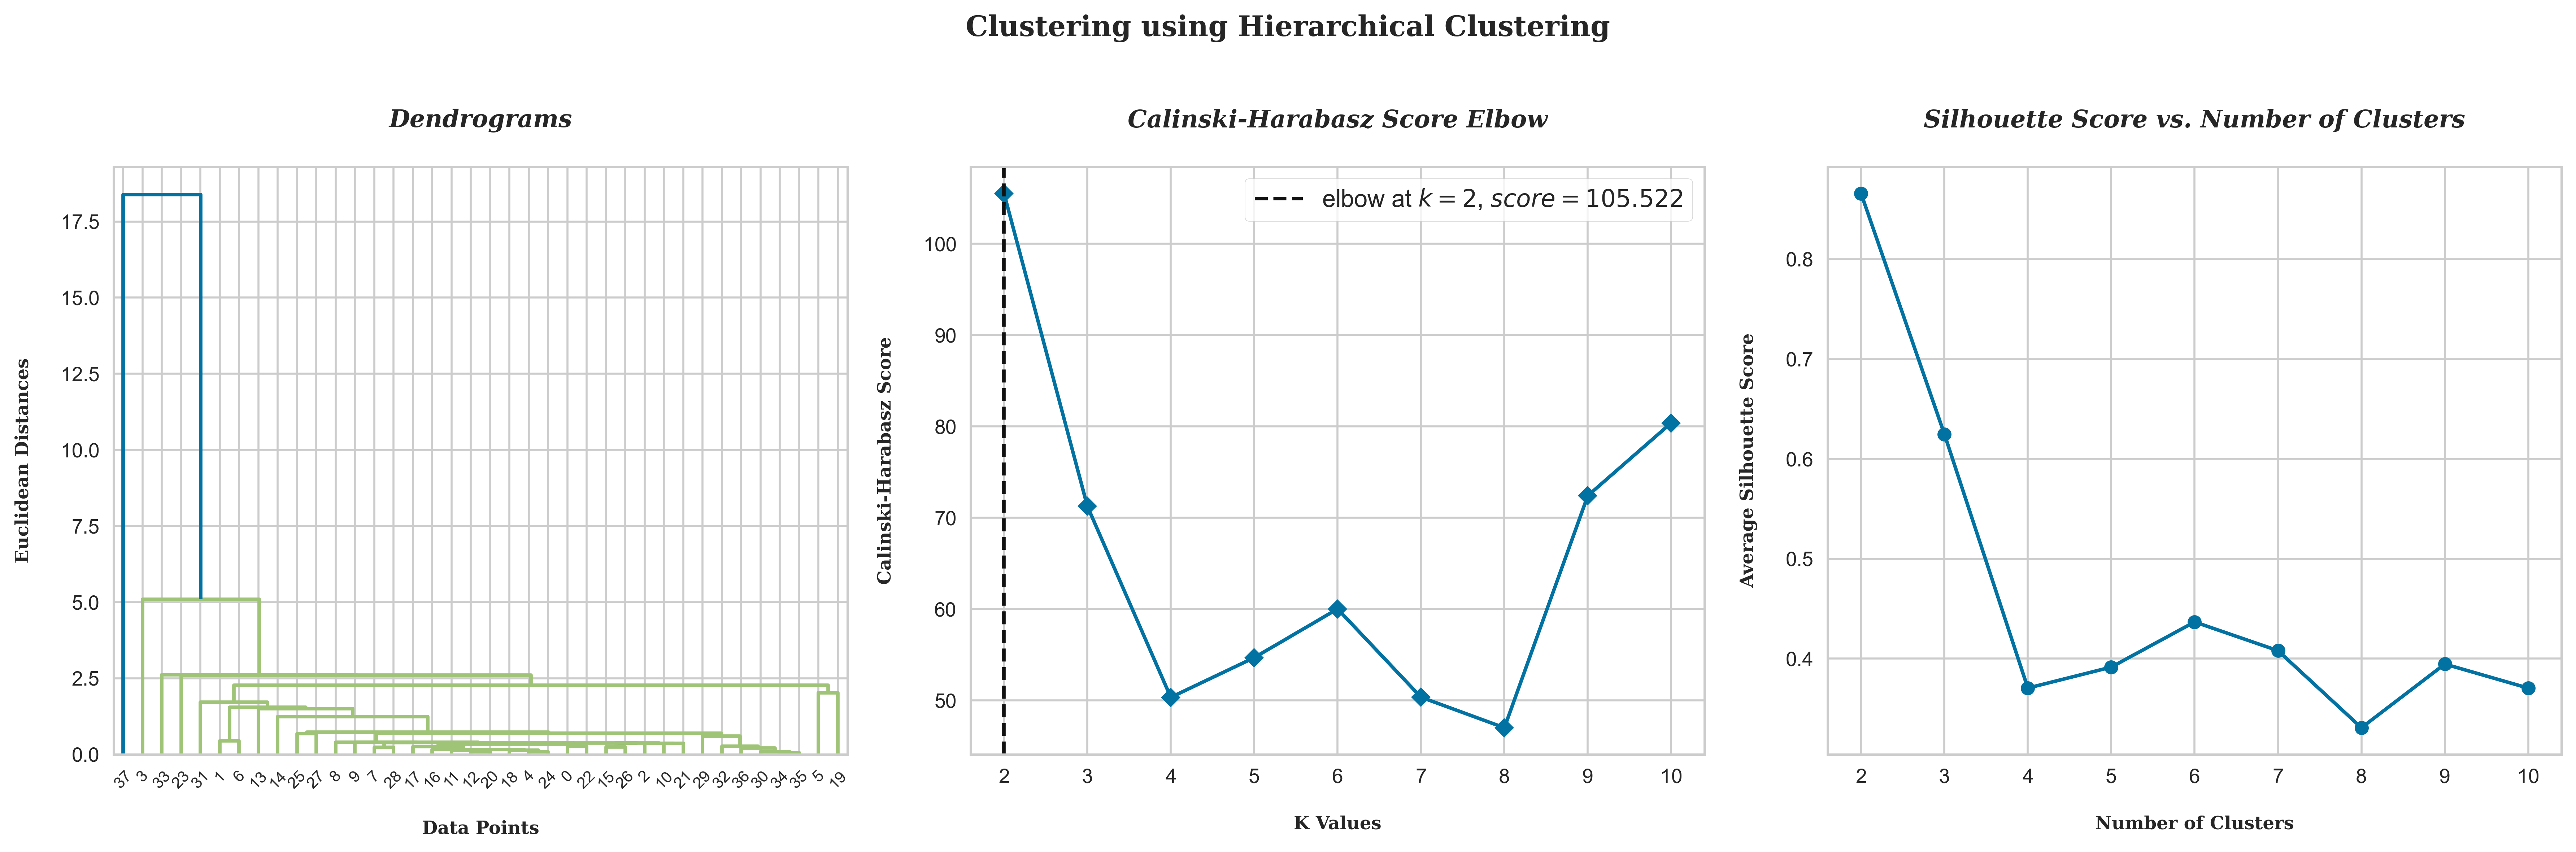

In [63]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# --- Dendrogram Plotting Function ---
def agg_dendrogram_with_labels(method):
    # --- Figure Settings ---
    ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    text_style = dict(fontweight='bold', fontfamily='serif')
    plt.figure(figsize=(18, 6))
    
    # --- Dendrogram Plot ---
    ax1 = plt.subplot(1, 3, 1)
    Z = shc.linkage(X_pca, method=method, metric='euclidean')
    dend = shc.dendrogram(Z, color_threshold=None)  # Remove default coloring for clarity
    #plt.axhline(y=2.1, color='#3E3B39', linestyle='--')
    plt.xlabel('\nData Points', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.ylabel('Euclidean Distances\n', fontsize=9, fontweight='bold', fontfamily='serif')
    #plt.annotate('Horizontal Cut Line', xy=(0, 2.1), xytext=(0, 2.1), fontsize=8, bbox=bbox, **ann)
    plt.title('Dendrograms\n', **title)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2 = plt.subplot(1, 3, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(linkage=method), metric='calinski_harabasz', timings=False, ax=ax2, locate_elbow=True)
    elbow_score_ch.fit(X_pca)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

    # --- Silhouette Score Plot ---
    ax3 = plt.subplot(1, 3, 3)
    range_n_clusters = list(range(2, 11))
    silhouette_avg = []
    
    for n_clusters in range_n_clusters:
        # Compute the linkage matrix using single method
        Z = shc.linkage(X_pca, method='single', metric='euclidean')
        
        # Assign clusters from the linkage matrix
        cluster_labels = shc.fcluster(Z, t=n_clusters, criterion='maxclust')
        silhouette_avg.append(silhouette_score(X_pca, cluster_labels))
    
    ax3.plot(range_n_clusters, silhouette_avg, marker='o')
    ax3.set_title('Silhouette Score vs. Number of Clusters\n', **title)
    ax3.set_xlabel('\nNumber of Clusters', fontsize=9, **text_style)
    ax3.set_ylabel('Average Silhouette Score\n', fontsize=9, **text_style)
    ax3.set_xticks(range_n_clusters)
    
    plt.suptitle('Clustering using Hierarchical Clustering\n', fontsize=14, fontweight='bold', fontfamily='serif')
    plt.tight_layout()
    plt.savefig('dendrogram_with_labels.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# --- Calling Dendrogram Functions ---
agg_dendrogram_with_labels('single')

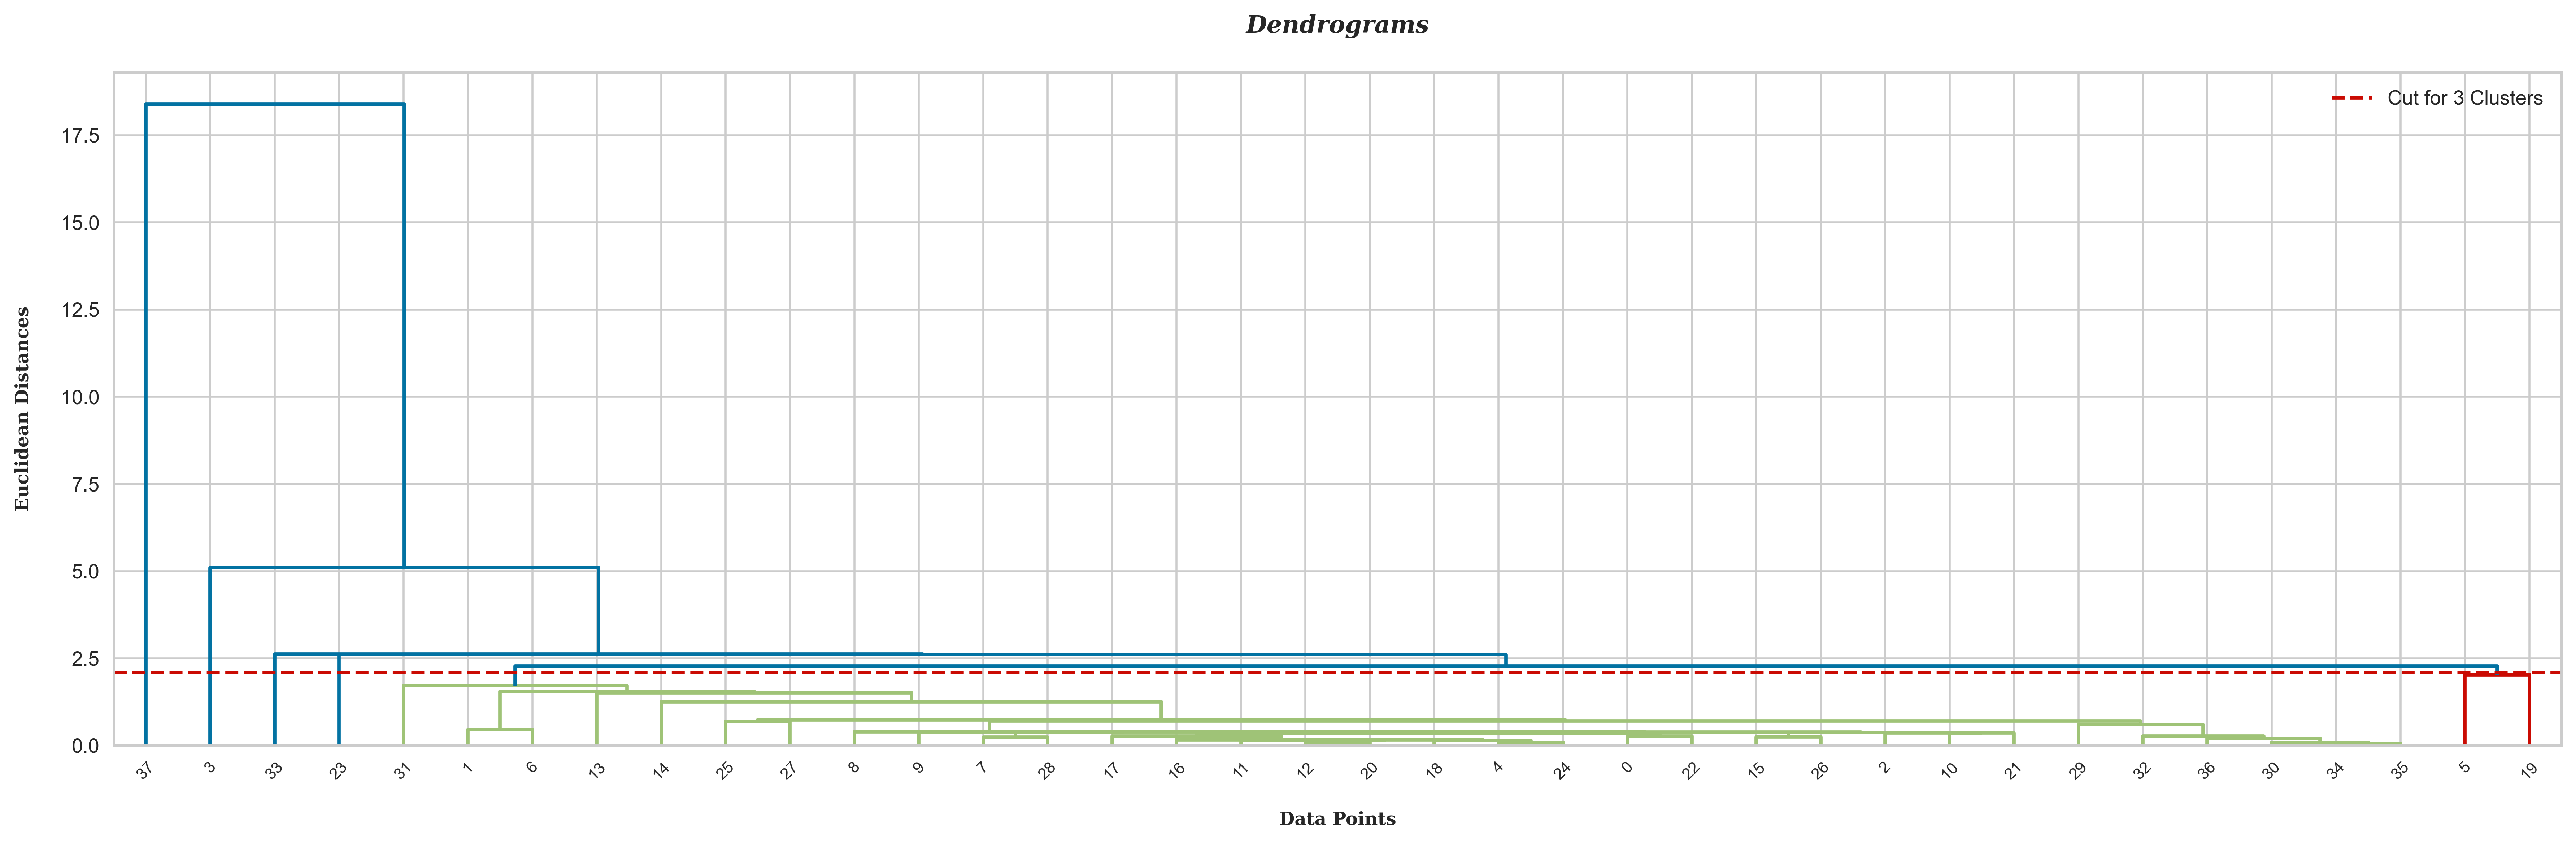

In [64]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# --- Dendrogram Plotting Function ---
def agg_dendrogram_with_labels(method):
    # --- Figure Settings ---
    ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    text_style = dict(fontweight='bold', fontfamily='serif')
    plt.figure(figsize=(18, 6))
    
    # --- Dendrogram Plot ---
    ax1 = plt.subplot(1, 1, 1)
    Z = shc.linkage(X_pca, method=method, metric='euclidean')
    
    # Determine the height to cut for 3 clusters
    max_d = 2.1  # Adjust this value based on your dataset to get the desired number of clusters
    
    # Plot the dendrogram
    dend = shc.dendrogram(Z, color_threshold=max_d)  # Use color_threshold to color clusters
    
    # Draw a horizontal line to indicate the cut-off for clusters
    plt.axhline(y=max_d, color='r', linestyle='--', label='Cut for 3 Clusters')
    
    # Add legend and labels
    plt.xlabel('\nData Points', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.ylabel('Euclidean Distances\n', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.title('Dendrograms\n', **title)
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig('dendrogram_with_3_clusters.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# --- Calling Dendrogram Function ---
agg_dendrogram_with_labels('single')


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

# Define a color class for printing (optional)
class clr:
    start = '\033[94m'  # Blue
    end = '\033[0m'     # Reset
    color = '\033[92m'  # Green

# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    return db_index, s_score, ch_index

# --- Perform Hierarchical Clustering using Single Linkage ---
def perform_hierarchical_clustering(X, n_clusters):
    # Perform Agglomerative Clustering using 'single' linkage
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    cluster_labels = agglomerative.fit_predict(X)
    return cluster_labels

# --- Example Usage ---
# Define the number of clusters
n_clusters = 3

# Perform clustering
y_agg_cluster = perform_hierarchical_clustering(X_pca, n_clusters)

# Evaluate clustering quality
db_agg, ss_agg, ch_agg = evaluate_clustering(X_pca, y_agg_cluster)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.187
.: Silhouette Score:  0.625
.: Calinski Harabasz Index:  71.252


## Pautan Complete

In [66]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

distance_matrix = sch.distance.pdist(X_pca, metric='euclidean')
linkage_matrix_comp = sch.linkage(distance_matrix, method='complete')

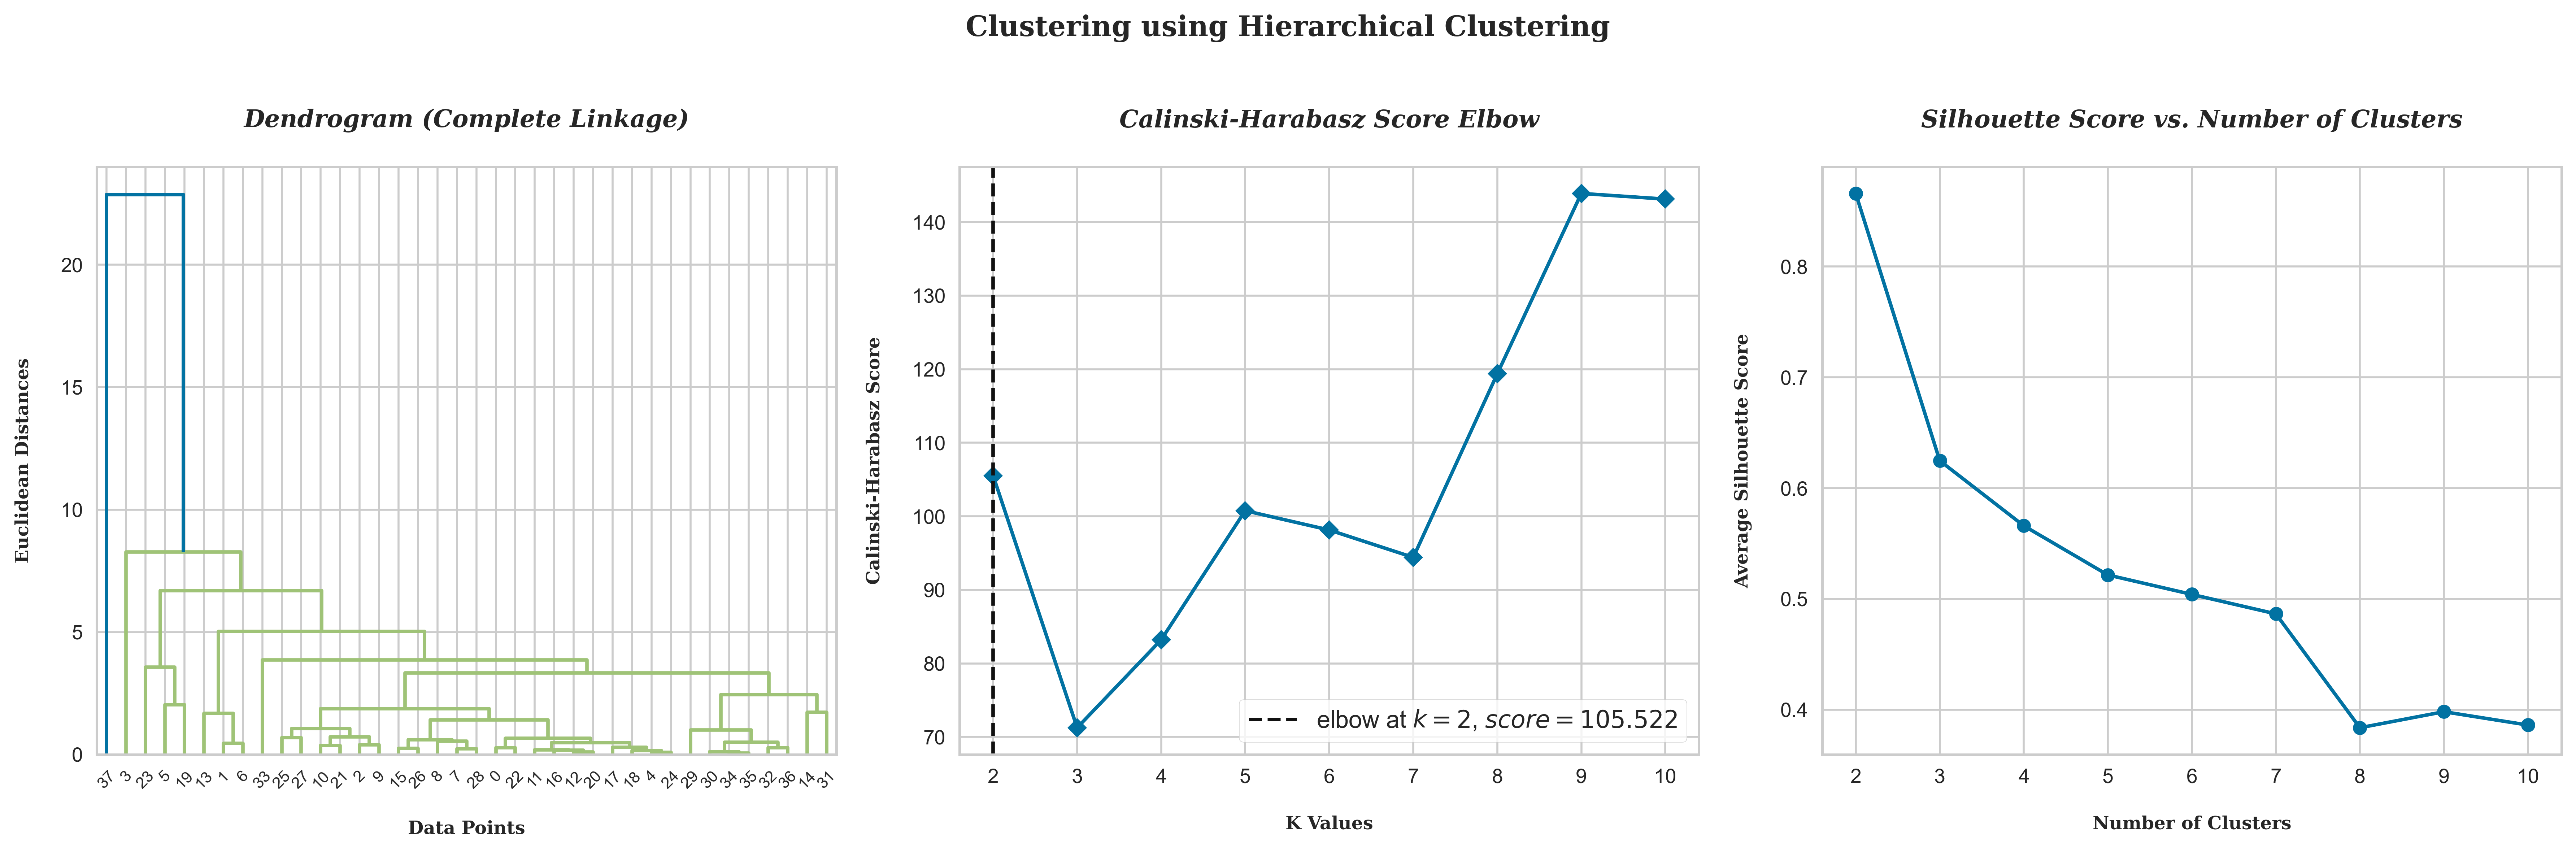

In [67]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# --- Dendrogram Plotting Function ---
def agg_dendrogram_with_labels_comp(method):
    # --- Figure Settings ---
    ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    text_style = dict(fontweight='bold', fontfamily='serif')
    plt.figure(figsize=(18, 6))
    
    # --- Dendrogram Plot ---
    ax1 = plt.subplot(1, 3, 1)
    Z = shc.linkage(X_pca, method=method, metric='euclidean')
    dend = shc.dendrogram(Z, color_threshold=None)  # Remove default coloring for clarity
    # Optionally add a horizontal cut line
    # plt.axhline(y=2.1, color='#3E3B39', linestyle='--')
    plt.xlabel('\nData Points', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.ylabel('Euclidean Distances\n', fontsize=9, fontweight='bold', fontfamily='serif')
    # Optionally annotate horizontal cut line
    # plt.annotate('Horizontal Cut Line', xy=(0, 2.1), xytext=(0, 2.1), fontsize=8, bbox=bbox, **ann)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)\n', **title)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2 = plt.subplot(1, 3, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(linkage=method), metric='calinski_harabasz', timings=False, ax=ax2, locate_elbow=True)
    elbow_score_ch.fit(X_pca)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

    # --- Silhouette Score Plot ---
    ax3 = plt.subplot(1, 3, 3)
    range_n_clusters = list(range(2, 11))
    silhouette_avg = []
    
    for n_clusters in range_n_clusters:
        # Compute the linkage matrix using complete method
        Z = shc.linkage(X_pca, method='complete', metric='euclidean')
        
        # Assign clusters from the linkage matrix
        cluster_labels = shc.fcluster(Z, t=n_clusters, criterion='maxclust')
        silhouette_avg.append(silhouette_score(X_pca, cluster_labels))
    
    ax3.plot(range_n_clusters, silhouette_avg, marker='o')
    ax3.set_title('Silhouette Score vs. Number of Clusters\n', **title)
    ax3.set_xlabel('\nNumber of Clusters', fontsize=9, **text_style)
    ax3.set_ylabel('Average Silhouette Score\n', fontsize=9, **text_style)
    ax3.set_xticks(range_n_clusters)
    
    plt.suptitle('Clustering using Hierarchical Clustering\n', fontsize=14, fontweight='bold', fontfamily='serif')
    plt.tight_layout()
    plt.savefig('dendrogram_with_labels.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# --- Calling Dendrogram Functions ---
agg_dendrogram_with_labels_comp('complete')

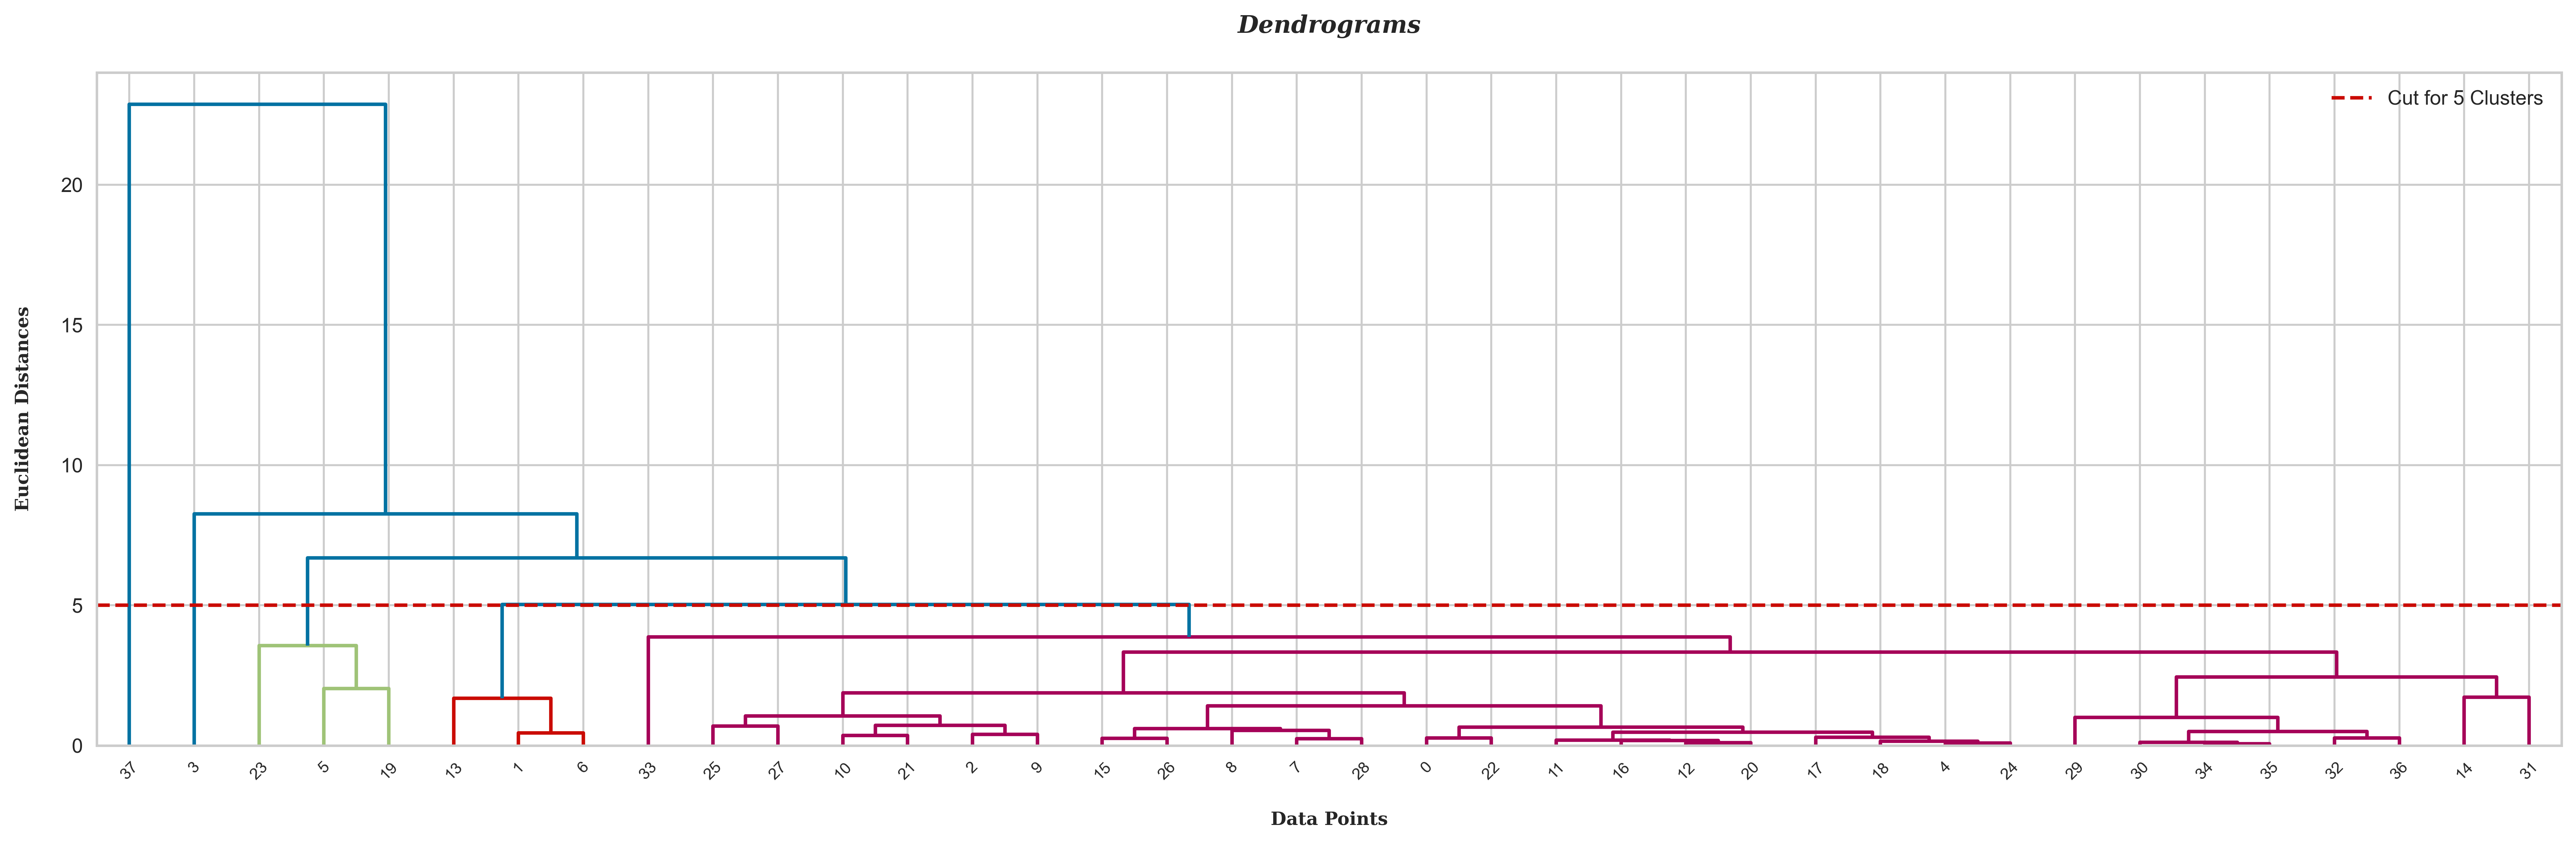

In [68]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# --- Dendrogram Plotting Function ---
def agg_dendrogram_with_labels_comp_plot(method, num_clusters):
    # --- Figure Settings ---
    ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    text_style = dict(fontweight='bold', fontfamily='serif')
    plt.figure(figsize=(18, 6))
    
    # --- Dendrogram Plot ---
    ax1 = plt.subplot(1, 1, 1)
    Z = shc.linkage(X_pca, method=method, metric='euclidean')
    
    # Determine the height to cut for the desired number of clusters
    max_d = shc.fcluster(Z, t=num_clusters, criterion='maxclust').max()  # Find appropriate cut-off height
    
    # Plot the dendrogram
    dend = shc.dendrogram(Z, color_threshold=max_d)  # Use color_threshold to color clusters
    
    # Draw a horizontal line to indicate the cut-off for clusters
    plt.axhline(y=max_d, color='r', linestyle='--', label=f'Cut for {num_clusters} Clusters')
    
    # Add legend and labels
    plt.xlabel('\nData Points', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.ylabel('Euclidean Distances\n', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.title('Dendrograms\n', **title)
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig('dendrogram_with_5_clusters.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# --- Calling Dendrogram Function ---
agg_dendrogram_with_labels_comp_plot('complete', 5)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, cdist

# Define a color class for printing (optional)
class clr:
    start = '\033[94m'  # Blue
    end = '\033[0m'     # Reset
    color = '\033[92m'  # Green

# --- Compute WCSS ---
def compute_wcss(X, labels, centroids):
    wcss = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        wcss += np.sum(np.square(cluster_points - centroids[i]))
    return wcss

# --- Compute Dunn Index ---
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    # Compute pairwise distances for all points
    distances = pdist(X)
    
    # Compute inter-cluster distances (minimum distance between clusters)
    inter_cluster_distances = np.min([
        np.min(cdist(X[labels == i], X[labels == j])) 
        for i in range(len(unique_labels)) 
        for j in range(i + 1, len(unique_labels))
        if len(X[labels == i]) > 0 and len(X[labels == j]) > 0
    ])
    
    # Compute intra-cluster distances (maximum distance within each cluster)
    intra_cluster_distances = np.max([
        np.max(pdist(X[labels == i])) 
        for i in range(len(unique_labels)) 
        if len(X[labels == i]) > 1  # Only calculate if there is more than 1 point in the cluster
    ], initial=0)  # Set initial to 0 to avoid errors with empty clusters
    
    return inter_cluster_distances / intra_cluster_distances if intra_cluster_distances > 0 else np.nan

# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y, centroids):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    wcss = round(compute_wcss(X, y, centroids), 3)
    dunn = round(dunn_index(X, y), 3)
    
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    print(clr.end+'.: Dunn Index: '+clr.start, dunn)
    print(clr.end+'.: WCSS: '+clr.start, wcss)
    return db_index, s_score, ch_index, dunn, wcss

# --- Perform Hierarchical Clustering using Complete Linkage ---
def perform_hierarchical_clustering(X, n_clusters):
    # Perform Agglomerative Clustering using 'complete' linkage
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    cluster_labels = agglomerative.fit_predict(X)
    
    # Compute centroids for each cluster
    centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])
    
    return cluster_labels, centroids

# --- Example Usage ---
# Define the number of clusters
n_clusters = 5

# Perform clustering
y_agg_cluster, centroids = perform_hierarchical_clustering(X_pca, n_clusters)

# Evaluate clustering quality
db_agg, ss_agg, ch_agg, dunn_agg, wcss_agg = evaluate_clustering(X_pca, y_agg_cluster, centroids)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.405
.: Silhouette Score:  0.522
.: Calinski Harabasz Index:  100.761
.: Dunn Index:  0.389
.: WCSS:  47.052


## Pautan Ward (Ragam)

In [70]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

distance_matrix = sch.distance.pdist(X_pca, metric='euclidean')
linkage_matrix_ward = sch.linkage(distance_matrix, method='ward')

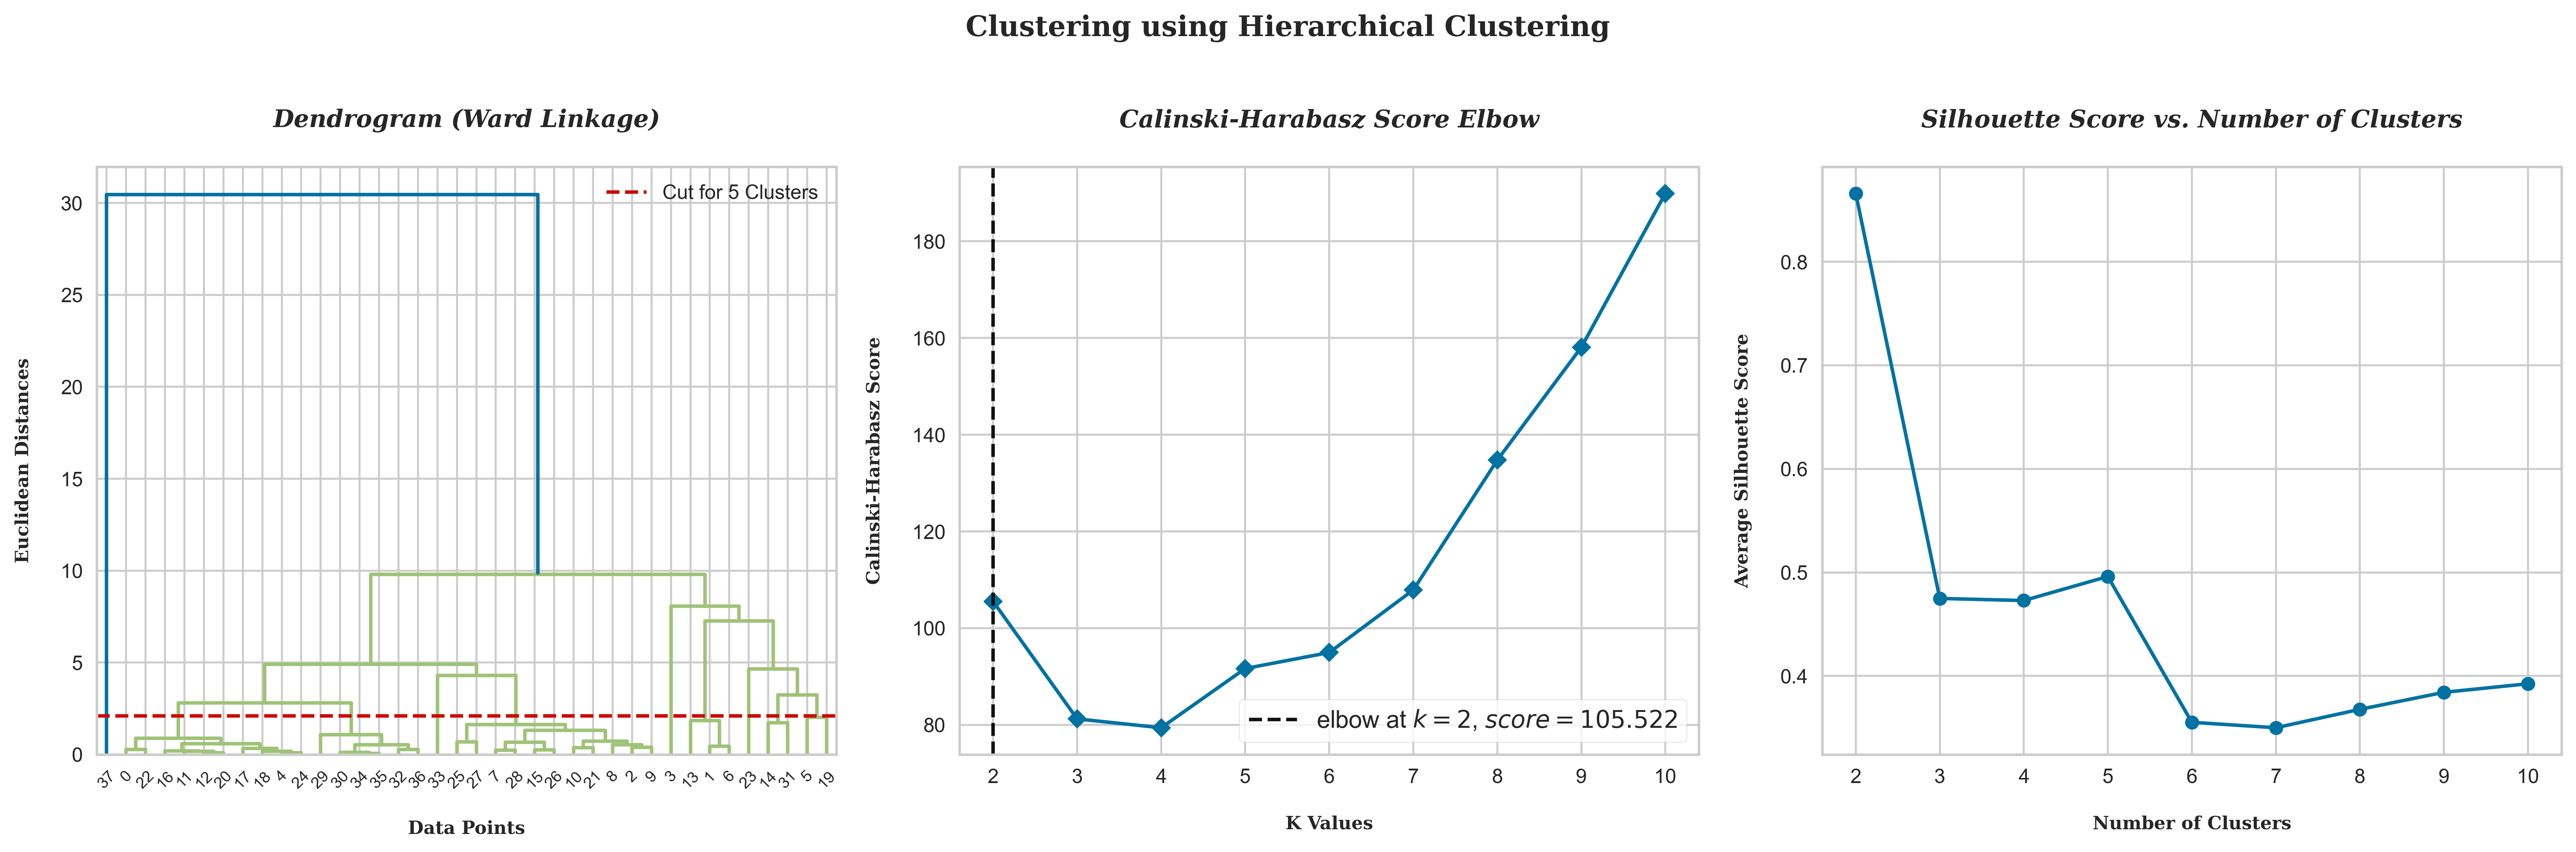

In [71]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Compute distance matrix and linkage matrix using 'ward' method
distance_matrix = shc.distance.pdist(X_pca, metric='euclidean')
linkage_matrix_ward = shc.linkage(distance_matrix, method='ward')

# --- Dendrogram Plotting Function ---
def agg_dendrogram_with_labels_ward(method):
    # --- Figure Settings ---
    ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    text_style = dict(fontweight='bold', fontfamily='serif')
    plt.figure(figsize=(18, 6))
    
    # --- Dendrogram Plot ---
    ax1 = plt.subplot(1, 3, 1)
    Z = shc.linkage(X_pca, method=method, metric='euclidean')
    dend = shc.dendrogram(Z, color_threshold=None)  # Remove default coloring for clarity
    
    # Optionally add a horizontal cut line
    max_d = 2.1  # Adjust this value as needed
    plt.axhline(y=max_d, color='r', linestyle='--', label='Cut for 5 Clusters')
    
    plt.xlabel('\nData Points', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.ylabel('Euclidean Distances\n', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)\n', **title)
    plt.legend(loc='upper right')
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2 = plt.subplot(1, 3, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(linkage=method), metric='calinski_harabasz', timings=False, ax=ax2, locate_elbow=True)
    elbow_score_ch.fit(X_pca)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

    # --- Silhouette Score Plot ---
    ax3 = plt.subplot(1, 3, 3)
    range_n_clusters = list(range(2, 11))
    silhouette_avg = []
    
    for n_clusters in range_n_clusters:
        # Compute the linkage matrix using 'ward' method
        Z = shc.linkage(X_pca, method='ward', metric='euclidean')
        
        # Assign clusters from the linkage matrix
        cluster_labels = shc.fcluster(Z, t=n_clusters, criterion='maxclust')
        silhouette_avg.append(silhouette_score(X_pca, cluster_labels))
    
    ax3.plot(range_n_clusters, silhouette_avg, marker='o')
    ax3.set_title('Silhouette Score vs. Number of Clusters\n', **title)
    ax3.set_xlabel('\nNumber of Clusters', fontsize=9, **text_style)
    ax3.set_ylabel('Average Silhouette Score\n', fontsize=9, **text_style)
    ax3.set_xticks(range_n_clusters)
    
    plt.suptitle('Clustering using Hierarchical Clustering\n', fontsize=14, fontweight='bold', fontfamily='serif')
    plt.tight_layout()
    plt.savefig('dendrogram_with_labels_ward.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# --- Calling Dendrogram Function ---
agg_dendrogram_with_labels_ward('ward')

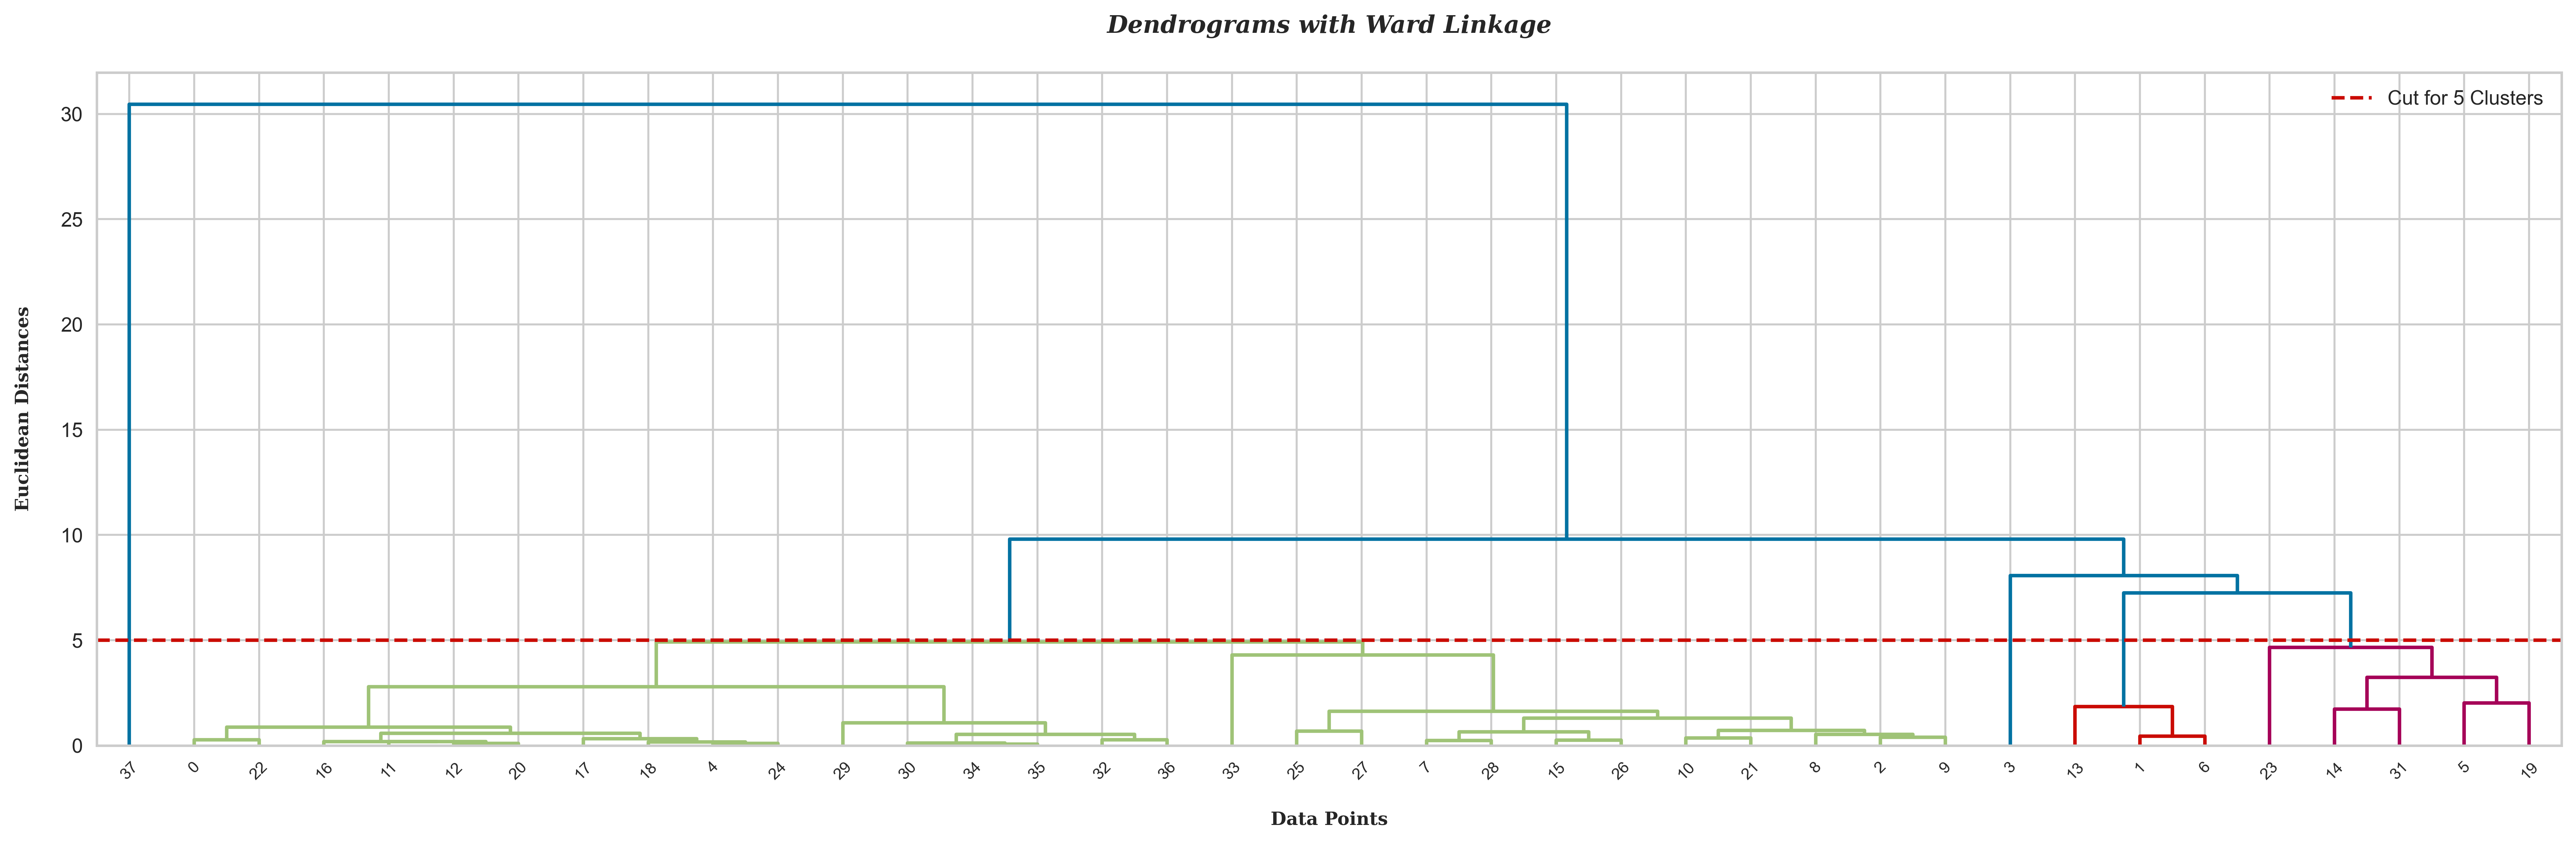

In [72]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# --- Dendrogram Plotting Function ---
def agg_dendrogram_with_labels_ward_plot(num_clusters):
    # --- Figure Settings ---
    ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    text_style = dict(fontweight='bold', fontfamily='serif')
    plt.figure(figsize=(18, 6))
    
    # --- Dendrogram Plot ---
    ax1 = plt.subplot(1, 1, 1)
    Z = shc.linkage(X_pca, method='ward', metric='euclidean')
    
    # Determine the height to cut for the desired number of clusters
    max_d = shc.cut_tree(Z, n_clusters=num_clusters).max() + 1  # Find appropriate cut-off height
    
    # Plot the dendrogram
    dend = shc.dendrogram(Z, color_threshold=max_d)  # Use color_threshold to color clusters
    
    # Draw a horizontal line to indicate the cut-off for clusters
    plt.axhline(y=max_d, color='r', linestyle='--', label=f'Cut for {num_clusters} Clusters')
    
    # Add legend and labels
    plt.xlabel('\nData Points', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.ylabel('Euclidean Distances\n', fontsize=9, fontweight='bold', fontfamily='serif')
    plt.title('Dendrograms with Ward Linkage\n', **title)
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig('dendrogram_with_5_clusters_ward.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# --- Calling Dendrogram Function ---
agg_dendrogram_with_labels_ward_plot(5)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

# Define a color class for printing (optional)
class clr:
    start = '\033[94m'  # Blue
    end = '\033[0m'     # Reset
    color = '\033[92m'  # Green

# --- Compute WCSS ---
def compute_wcss(X, labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

# --- Compute Dunn Index ---
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    # Compute pairwise distances for all points
    distances = pdist(X)
    
    # Compute inter-cluster distances (minimum distance between clusters)
    inter_cluster_distances = np.min([
        np.min(cdist(X[labels == i], X[labels == j])) 
        for i in range(len(unique_labels)) 
        for j in range(i + 1, len(unique_labels))
        if len(X[labels == i]) > 0 and len(X[labels == j]) > 0
    ])
    
    # Compute intra-cluster distances (maximum distance within each cluster)
    intra_cluster_distances = np.max([
        np.max(pdist(X[labels == i])) 
        for i in range(len(unique_labels)) 
        if len(X[labels == i]) > 1  # Only calculate if there is more than 1 point in the cluster
    ], initial=0)  # Set initial to 0 to avoid errors with empty clusters
    
    return inter_cluster_distances / intra_cluster_distances if intra_cluster_distances > 0 else np.nan

# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y, centroids):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    wcss = round(compute_wcss(X, y, centroids), 3)
    dunn = round(dunn_index(X, y), 3)
    
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    print(clr.end+'.: WCSS: '+clr.start, wcss)
    print(clr.end+'.: Dunn Index: '+clr.start, dunn)
    
    return db_index, s_score, ch_index, wcss, dunn

# --- Compute Centroids ---
def compute_centroids(X, labels, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        centroids[i, :] = X[labels == i].mean(axis=0)
    return centroids

# --- Perform Hierarchical Clustering using Ward Linkage ---
def perform_hierarchical_clustering(X, n_clusters):
    # Perform Agglomerative Clustering using 'ward' linkage
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = agglomerative.fit_predict(X)
    centroids = compute_centroids(X, cluster_labels, n_clusters)
    return cluster_labels, centroids

# --- Example Usage ---
# Define the number of clusters
n_clusters = 5

# Assume X_pca is your input data (replace it with your actual PCA data)
# Perform clustering
y_agg_cluster, centroids = perform_hierarchical_clustering(X_pca, n_clusters)

# Evaluate clustering quality
db_agg, ss_agg, ch_agg, wcss_agg, dunn_agg = evaluate_clustering(X_pca, y_agg_cluster, centroids)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.546
.: Silhouette Score:  0.496
.: Calinski Harabasz Index:  91.657
.: WCSS:  51.34
.: Dunn Index:  0.267
